In [7]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from persim import PersImage
import gudhi
import os
import glob

In [371]:
temp=np.loadtxt("Data_2d_Ising_Wolff_N=50/3.0/1550371846PD1.dat")

In [383]:
np.shape(temp)

(63, 3)

In [376]:
x = np.linspace(0, 20, 20)
y = np.linspace(0, 20, 20)
xx,yy=np.meshgrid(x,y)

In [397]:
z=np.zeros([20,20])
for i in np.arange(len(temp)):
    z=z+np.log(1+temp[i][1])*temp[i][2]*np.exp(-0.5*(xx-temp[i][0])**2-0.5*(yy-temp[i][1])**2)

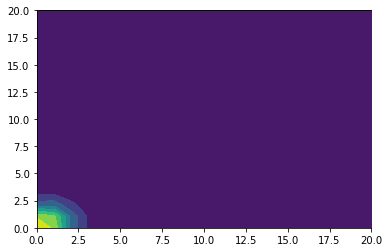

In [398]:
plt.contourf(x,y,z)

In [ ]:
#pdlocnum has format [[birth1, persistence1, counts1],...]
#bounds should be a list [bmin,bmax,pmin,pmax]
#bins should be a list [bbins, pbins]
def PerIm(pdlocnum,bounds,bins,stdev):
    x = np.linspace(bounds[0], bounds[1], bins[0])
    y = np.linspace(bounds[2], bounds[3], bins[1])
    xx, yy = np.meshgrid(x, y, sparse=True)
    z=np.log(1+pdlocnum[i][1])**np.exp()

In [5]:
np.sort(os.listdir('Data_2d_Ising_Wolff_N=50'))

array(['1.5', '1.51', '1.52', '1.53', '1.54', '1.55', '1.56', '1.57',
       '1.58', '1.59', '1.6', '1.61', '1.62', '1.63', '1.64', '1.65',
       '1.66', '1.67', '1.68', '1.69', '1.7', '1.71', '1.72', '1.73',
       '1.74', '1.75', '1.76', '1.77', '1.78', '1.79', '1.8', '1.81',
       '1.82', '1.83', '1.84', '1.85', '1.86', '1.87', '1.88', '1.89',
       '1.9', '1.91', '1.92', '1.93', '1.94', '1.95', '1.96', '1.97',
       '1.98', '1.99', '2.0', '2.01', '2.02', '2.03', '2.04', '2.05',
       '2.06', '2.07', '2.08', '2.09', '2.1', '2.11', '2.12', '2.13',
       '2.14', '2.15', '2.16', '2.17', '2.18', '2.19', '2.2', '2.21',
       '2.22', '2.23', '2.24', '2.25', '2.26', '2.27', '2.28', '2.29',
       '2.3', '2.31', '2.32', '2.33', '2.34', '2.35', '2.36', '2.37',
       '2.38', '2.39', '2.4', '2.41', '2.42', '2.43', '2.44', '2.45',
       '2.46', '2.47', '2.48', '2.49', '2.5', '2.51', '2.52', '2.53',
       '2.54', '2.55', '2.56', '2.57', '2.58', '2.59', '2.6', '2.61',
       '2.62', '2.

# Compute PDs for $\alpha$ filtrations

In [401]:
Tlist=[]
PD0list=[]
PD1list=[]
flist=np.sort(glob.glob("*Ising*/*/*.txt"))
flistAlt=np.append(flist[0:10],flist[-11:-1])
for f in flist:
#for f in flistAlt:
    bounds=[x for x,y in enumerate(f) if y == '/']
    Tlist.append(float(f[bounds[0]+1:bounds[1]]))
    data = np.loadtxt(f, dtype=int)
    alpha_complex=gudhi.AlphaComplex(data)
    simplex_tree=alpha_complex.create_simplex_tree()
    PD=simplex_tree.persistence()
    PD0=[]
    PD1=[]
    for elm in PD:
        if elm[0]==1:
            PD1.append((elm[1][0],elm[1][1]-elm[1][0]))
        else:
            if elm[1][1]!=float('inf'):
                PD0.append((elm[1][0],elm[1][1]-elm[1][0]))
    PD0=np.round(PD0,decimals=5)
    PD1=np.round(PD1,decimals=5)
    loc,counts=np.unique(PD0,axis=0,return_counts=True)
    toSave=np.array([[loc[i][0],loc[i][1],counts[i]] for i in np.arange(len(counts))])
    np.savetxt(f[:len(f)-4]+"PD0.dat",toSave)
    loc,counts=np.unique(PD1,axis=0,return_counts=True)
    toSave=np.array([[loc[i][0],loc[i][1],counts[i]] for i in np.arange(len(counts))])
    np.savetxt(f[:len(f)-4]+"PD1.dat",toSave)
    PD0list.append(PD0)
    PD1list.append(PD1)
    
    print(f)

Data_2d_Ising_Wolff_N=50/1.5/1550204599.txt
Data_2d_Ising_Wolff_N=50/1.5/1550204606.txt
Data_2d_Ising_Wolff_N=50/1.5/1550204614.txt
Data_2d_Ising_Wolff_N=50/1.5/1550204621.txt
Data_2d_Ising_Wolff_N=50/1.5/1550204628.txt
Data_2d_Ising_Wolff_N=50/1.5/1550204635.txt
Data_2d_Ising_Wolff_N=50/1.5/1550204643.txt
Data_2d_Ising_Wolff_N=50/1.5/1550204650.txt
Data_2d_Ising_Wolff_N=50/1.5/1550204657.txt
Data_2d_Ising_Wolff_N=50/1.5/1550204664.txt
Data_2d_Ising_Wolff_N=50/1.5/1550204671.txt
Data_2d_Ising_Wolff_N=50/1.5/1550204678.txt
Data_2d_Ising_Wolff_N=50/1.5/1550204686.txt
Data_2d_Ising_Wolff_N=50/1.5/1550204693.txt
Data_2d_Ising_Wolff_N=50/1.5/1550204700.txt
Data_2d_Ising_Wolff_N=50/1.5/1550204707.txt
Data_2d_Ising_Wolff_N=50/1.5/1550204715.txt
Data_2d_Ising_Wolff_N=50/1.5/1550204722.txt
Data_2d_Ising_Wolff_N=50/1.5/1550204729.txt
Data_2d_Ising_Wolff_N=50/1.5/1550204736.txt
Data_2d_Ising_Wolff_N=50/1.5/1550204743.txt
Data_2d_Ising_Wolff_N=50/1.5/1550204751.txt
Data_2d_Ising_Wolff_N=50/1.5/155

Data_2d_Ising_Wolff_N=50/1.5/1550206013.txt
Data_2d_Ising_Wolff_N=50/1.5/1550206021.txt
Data_2d_Ising_Wolff_N=50/1.5/1550206028.txt
Data_2d_Ising_Wolff_N=50/1.5/1550206035.txt
Data_2d_Ising_Wolff_N=50/1.5/1550206042.txt
Data_2d_Ising_Wolff_N=50/1.5/1550206049.txt
Data_2d_Ising_Wolff_N=50/1.5/1550206057.txt
Data_2d_Ising_Wolff_N=50/1.5/1550206065.txt
Data_2d_Ising_Wolff_N=50/1.5/1550206072.txt
Data_2d_Ising_Wolff_N=50/1.5/1550206079.txt
Data_2d_Ising_Wolff_N=50/1.5/1550206086.txt
Data_2d_Ising_Wolff_N=50/1.5/1550206094.txt
Data_2d_Ising_Wolff_N=50/1.5/1550206101.txt
Data_2d_Ising_Wolff_N=50/1.51/1550206108.txt
Data_2d_Ising_Wolff_N=50/1.51/1550206116.txt
Data_2d_Ising_Wolff_N=50/1.51/1550206123.txt
Data_2d_Ising_Wolff_N=50/1.51/1550206131.txt
Data_2d_Ising_Wolff_N=50/1.51/1550206138.txt
Data_2d_Ising_Wolff_N=50/1.51/1550206145.txt
Data_2d_Ising_Wolff_N=50/1.51/1550206152.txt
Data_2d_Ising_Wolff_N=50/1.51/1550206160.txt
Data_2d_Ising_Wolff_N=50/1.51/1550206167.txt
Data_2d_Ising_Wolff_N=5

Data_2d_Ising_Wolff_N=50/1.51/1550207458.txt
Data_2d_Ising_Wolff_N=50/1.51/1550207465.txt
Data_2d_Ising_Wolff_N=50/1.51/1550207473.txt
Data_2d_Ising_Wolff_N=50/1.51/1550207480.txt
Data_2d_Ising_Wolff_N=50/1.51/1550207488.txt
Data_2d_Ising_Wolff_N=50/1.51/1550207497.txt
Data_2d_Ising_Wolff_N=50/1.51/1550207506.txt
Data_2d_Ising_Wolff_N=50/1.51/1550207515.txt
Data_2d_Ising_Wolff_N=50/1.51/1550207523.txt
Data_2d_Ising_Wolff_N=50/1.51/1550207530.txt
Data_2d_Ising_Wolff_N=50/1.51/1550207539.txt
Data_2d_Ising_Wolff_N=50/1.51/1550207548.txt
Data_2d_Ising_Wolff_N=50/1.51/1550207557.txt
Data_2d_Ising_Wolff_N=50/1.51/1550207564.txt
Data_2d_Ising_Wolff_N=50/1.51/1550207572.txt
Data_2d_Ising_Wolff_N=50/1.51/1550207580.txt
Data_2d_Ising_Wolff_N=50/1.51/1550207588.txt
Data_2d_Ising_Wolff_N=50/1.51/1550207596.txt
Data_2d_Ising_Wolff_N=50/1.51/1550207604.txt
Data_2d_Ising_Wolff_N=50/1.51/1550207612.txt
Data_2d_Ising_Wolff_N=50/1.51/1550207620.txt
Data_2d_Ising_Wolff_N=50/1.51/1550207628.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.52/1550344192.txt
Data_2d_Ising_Wolff_N=50/1.52/1550344199.txt
Data_2d_Ising_Wolff_N=50/1.52/1550344207.txt
Data_2d_Ising_Wolff_N=50/1.52/1550344215.txt
Data_2d_Ising_Wolff_N=50/1.52/1550344222.txt
Data_2d_Ising_Wolff_N=50/1.52/1550344230.txt
Data_2d_Ising_Wolff_N=50/1.52/1550344237.txt
Data_2d_Ising_Wolff_N=50/1.52/1550344245.txt
Data_2d_Ising_Wolff_N=50/1.52/1550344252.txt
Data_2d_Ising_Wolff_N=50/1.52/1550344260.txt
Data_2d_Ising_Wolff_N=50/1.52/1550344267.txt
Data_2d_Ising_Wolff_N=50/1.52/1550344275.txt
Data_2d_Ising_Wolff_N=50/1.52/1550344282.txt
Data_2d_Ising_Wolff_N=50/1.52/1550344290.txt
Data_2d_Ising_Wolff_N=50/1.52/1550344298.txt
Data_2d_Ising_Wolff_N=50/1.52/1550344305.txt
Data_2d_Ising_Wolff_N=50/1.52/1550344313.txt
Data_2d_Ising_Wolff_N=50/1.52/1550344320.txt
Data_2d_Ising_Wolff_N=50/1.52/1550344328.txt
Data_2d_Ising_Wolff_N=50/1.52/1550344336.txt
Data_2d_Ising_Wolff_N=50/1.52/1550344343.txt
Data_2d_Ising_Wolff_N=50/1.52/1550344351.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.53/1550345566.txt
Data_2d_Ising_Wolff_N=50/1.53/1550345573.txt
Data_2d_Ising_Wolff_N=50/1.53/1550345580.txt
Data_2d_Ising_Wolff_N=50/1.53/1550345588.txt
Data_2d_Ising_Wolff_N=50/1.53/1550345595.txt
Data_2d_Ising_Wolff_N=50/1.53/1550345603.txt
Data_2d_Ising_Wolff_N=50/1.53/1550345610.txt
Data_2d_Ising_Wolff_N=50/1.53/1550345618.txt
Data_2d_Ising_Wolff_N=50/1.53/1550345625.txt
Data_2d_Ising_Wolff_N=50/1.53/1550345633.txt
Data_2d_Ising_Wolff_N=50/1.53/1550345640.txt
Data_2d_Ising_Wolff_N=50/1.53/1550345648.txt
Data_2d_Ising_Wolff_N=50/1.53/1550345655.txt
Data_2d_Ising_Wolff_N=50/1.53/1550345663.txt
Data_2d_Ising_Wolff_N=50/1.53/1550345671.txt
Data_2d_Ising_Wolff_N=50/1.53/1550345678.txt
Data_2d_Ising_Wolff_N=50/1.53/1550345686.txt
Data_2d_Ising_Wolff_N=50/1.53/1550345693.txt
Data_2d_Ising_Wolff_N=50/1.53/1550345701.txt
Data_2d_Ising_Wolff_N=50/1.53/1550345708.txt
Data_2d_Ising_Wolff_N=50/1.53/1550345716.txt
Data_2d_Ising_Wolff_N=50/1.53/1550345723.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.54/1550346951.txt
Data_2d_Ising_Wolff_N=50/1.54/1550346959.txt
Data_2d_Ising_Wolff_N=50/1.54/1550346967.txt
Data_2d_Ising_Wolff_N=50/1.54/1550346975.txt
Data_2d_Ising_Wolff_N=50/1.54/1550346983.txt
Data_2d_Ising_Wolff_N=50/1.54/1550346991.txt
Data_2d_Ising_Wolff_N=50/1.54/1550346998.txt
Data_2d_Ising_Wolff_N=50/1.54/1550347006.txt
Data_2d_Ising_Wolff_N=50/1.54/1550347013.txt
Data_2d_Ising_Wolff_N=50/1.54/1550347021.txt
Data_2d_Ising_Wolff_N=50/1.54/1550347028.txt
Data_2d_Ising_Wolff_N=50/1.54/1550347036.txt
Data_2d_Ising_Wolff_N=50/1.54/1550347043.txt
Data_2d_Ising_Wolff_N=50/1.54/1550347051.txt
Data_2d_Ising_Wolff_N=50/1.54/1550347058.txt
Data_2d_Ising_Wolff_N=50/1.54/1550347066.txt
Data_2d_Ising_Wolff_N=50/1.54/1550347074.txt
Data_2d_Ising_Wolff_N=50/1.54/1550347081.txt
Data_2d_Ising_Wolff_N=50/1.54/1550347089.txt
Data_2d_Ising_Wolff_N=50/1.54/1550347096.txt
Data_2d_Ising_Wolff_N=50/1.54/1550347104.txt
Data_2d_Ising_Wolff_N=50/1.54/1550347111.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.55/1550348336.txt
Data_2d_Ising_Wolff_N=50/1.55/1550348343.txt
Data_2d_Ising_Wolff_N=50/1.55/1550348351.txt
Data_2d_Ising_Wolff_N=50/1.55/1550348358.txt
Data_2d_Ising_Wolff_N=50/1.55/1550348366.txt
Data_2d_Ising_Wolff_N=50/1.55/1550348373.txt
Data_2d_Ising_Wolff_N=50/1.55/1550348381.txt
Data_2d_Ising_Wolff_N=50/1.55/1550348388.txt
Data_2d_Ising_Wolff_N=50/1.55/1550348396.txt
Data_2d_Ising_Wolff_N=50/1.55/1550348403.txt
Data_2d_Ising_Wolff_N=50/1.55/1550348411.txt
Data_2d_Ising_Wolff_N=50/1.55/1550348418.txt
Data_2d_Ising_Wolff_N=50/1.55/1550348426.txt
Data_2d_Ising_Wolff_N=50/1.55/1550348434.txt
Data_2d_Ising_Wolff_N=50/1.55/1550348441.txt
Data_2d_Ising_Wolff_N=50/1.55/1550348449.txt
Data_2d_Ising_Wolff_N=50/1.55/1550348456.txt
Data_2d_Ising_Wolff_N=50/1.55/1550348464.txt
Data_2d_Ising_Wolff_N=50/1.55/1550348471.txt
Data_2d_Ising_Wolff_N=50/1.55/1550348479.txt
Data_2d_Ising_Wolff_N=50/1.55/1550348486.txt
Data_2d_Ising_Wolff_N=50/1.55/1550348494.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.56/1550427427.txt
Data_2d_Ising_Wolff_N=50/1.56/1550427434.txt
Data_2d_Ising_Wolff_N=50/1.56/1550427442.txt
Data_2d_Ising_Wolff_N=50/1.56/1550427449.txt
Data_2d_Ising_Wolff_N=50/1.56/1550427457.txt
Data_2d_Ising_Wolff_N=50/1.56/1550427464.txt
Data_2d_Ising_Wolff_N=50/1.56/1550427472.txt
Data_2d_Ising_Wolff_N=50/1.56/1550427479.txt
Data_2d_Ising_Wolff_N=50/1.56/1550427486.txt
Data_2d_Ising_Wolff_N=50/1.56/1550427493.txt
Data_2d_Ising_Wolff_N=50/1.56/1550427501.txt
Data_2d_Ising_Wolff_N=50/1.56/1550427508.txt
Data_2d_Ising_Wolff_N=50/1.56/1550427515.txt
Data_2d_Ising_Wolff_N=50/1.56/1550427523.txt
Data_2d_Ising_Wolff_N=50/1.56/1550427530.txt
Data_2d_Ising_Wolff_N=50/1.56/1550427538.txt
Data_2d_Ising_Wolff_N=50/1.56/1550427545.txt
Data_2d_Ising_Wolff_N=50/1.56/1550427553.txt
Data_2d_Ising_Wolff_N=50/1.56/1550427561.txt
Data_2d_Ising_Wolff_N=50/1.56/1550427568.txt
Data_2d_Ising_Wolff_N=50/1.56/1550427576.txt
Data_2d_Ising_Wolff_N=50/1.56/1550427584.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.57/1550428779.txt
Data_2d_Ising_Wolff_N=50/1.57/1550428787.txt
Data_2d_Ising_Wolff_N=50/1.57/1550428794.txt
Data_2d_Ising_Wolff_N=50/1.57/1550428802.txt
Data_2d_Ising_Wolff_N=50/1.57/1550428809.txt
Data_2d_Ising_Wolff_N=50/1.57/1550428817.txt
Data_2d_Ising_Wolff_N=50/1.57/1550428825.txt
Data_2d_Ising_Wolff_N=50/1.57/1550428832.txt
Data_2d_Ising_Wolff_N=50/1.57/1550428840.txt
Data_2d_Ising_Wolff_N=50/1.57/1550428847.txt
Data_2d_Ising_Wolff_N=50/1.57/1550428855.txt
Data_2d_Ising_Wolff_N=50/1.57/1550428862.txt
Data_2d_Ising_Wolff_N=50/1.57/1550428870.txt
Data_2d_Ising_Wolff_N=50/1.57/1550428878.txt
Data_2d_Ising_Wolff_N=50/1.57/1550428885.txt
Data_2d_Ising_Wolff_N=50/1.57/1550428893.txt
Data_2d_Ising_Wolff_N=50/1.57/1550428901.txt
Data_2d_Ising_Wolff_N=50/1.57/1550428908.txt
Data_2d_Ising_Wolff_N=50/1.57/1550428916.txt
Data_2d_Ising_Wolff_N=50/1.57/1550428924.txt
Data_2d_Ising_Wolff_N=50/1.57/1550428931.txt
Data_2d_Ising_Wolff_N=50/1.57/1550428939.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.58/1550430197.txt
Data_2d_Ising_Wolff_N=50/1.58/1550430204.txt
Data_2d_Ising_Wolff_N=50/1.58/1550430212.txt
Data_2d_Ising_Wolff_N=50/1.58/1550430220.txt
Data_2d_Ising_Wolff_N=50/1.58/1550430228.txt
Data_2d_Ising_Wolff_N=50/1.58/1550430236.txt
Data_2d_Ising_Wolff_N=50/1.58/1550430244.txt
Data_2d_Ising_Wolff_N=50/1.58/1550430252.txt
Data_2d_Ising_Wolff_N=50/1.58/1550430260.txt
Data_2d_Ising_Wolff_N=50/1.58/1550430268.txt
Data_2d_Ising_Wolff_N=50/1.58/1550430275.txt
Data_2d_Ising_Wolff_N=50/1.58/1550430283.txt
Data_2d_Ising_Wolff_N=50/1.58/1550430291.txt
Data_2d_Ising_Wolff_N=50/1.58/1550430299.txt
Data_2d_Ising_Wolff_N=50/1.58/1550430307.txt
Data_2d_Ising_Wolff_N=50/1.58/1550430315.txt
Data_2d_Ising_Wolff_N=50/1.58/1550430323.txt
Data_2d_Ising_Wolff_N=50/1.58/1550430331.txt
Data_2d_Ising_Wolff_N=50/1.58/1550430339.txt
Data_2d_Ising_Wolff_N=50/1.58/1550430346.txt
Data_2d_Ising_Wolff_N=50/1.58/1550430354.txt
Data_2d_Ising_Wolff_N=50/1.58/1550430362.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.59/1550431787.txt
Data_2d_Ising_Wolff_N=50/1.59/1550431795.txt
Data_2d_Ising_Wolff_N=50/1.59/1550431804.txt
Data_2d_Ising_Wolff_N=50/1.59/1550431813.txt
Data_2d_Ising_Wolff_N=50/1.59/1550431822.txt
Data_2d_Ising_Wolff_N=50/1.59/1550431830.txt
Data_2d_Ising_Wolff_N=50/1.59/1550431839.txt
Data_2d_Ising_Wolff_N=50/1.59/1550431848.txt
Data_2d_Ising_Wolff_N=50/1.59/1550431857.txt
Data_2d_Ising_Wolff_N=50/1.59/1550431866.txt
Data_2d_Ising_Wolff_N=50/1.59/1550431874.txt
Data_2d_Ising_Wolff_N=50/1.59/1550431882.txt
Data_2d_Ising_Wolff_N=50/1.59/1550431891.txt
Data_2d_Ising_Wolff_N=50/1.59/1550431900.txt
Data_2d_Ising_Wolff_N=50/1.59/1550431910.txt
Data_2d_Ising_Wolff_N=50/1.59/1550431920.txt
Data_2d_Ising_Wolff_N=50/1.59/1550431929.txt
Data_2d_Ising_Wolff_N=50/1.59/1550431939.txt
Data_2d_Ising_Wolff_N=50/1.59/1550431947.txt
Data_2d_Ising_Wolff_N=50/1.59/1550431956.txt
Data_2d_Ising_Wolff_N=50/1.59/1550431965.txt
Data_2d_Ising_Wolff_N=50/1.59/1550431973.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.6/1550433263.txt
Data_2d_Ising_Wolff_N=50/1.6/1550433272.txt
Data_2d_Ising_Wolff_N=50/1.6/1550433280.txt
Data_2d_Ising_Wolff_N=50/1.6/1550433288.txt
Data_2d_Ising_Wolff_N=50/1.6/1550433296.txt
Data_2d_Ising_Wolff_N=50/1.6/1550433304.txt
Data_2d_Ising_Wolff_N=50/1.6/1550433312.txt
Data_2d_Ising_Wolff_N=50/1.6/1550433320.txt
Data_2d_Ising_Wolff_N=50/1.6/1550433328.txt
Data_2d_Ising_Wolff_N=50/1.6/1550433337.txt
Data_2d_Ising_Wolff_N=50/1.6/1550433345.txt
Data_2d_Ising_Wolff_N=50/1.6/1550433353.txt
Data_2d_Ising_Wolff_N=50/1.6/1550433362.txt
Data_2d_Ising_Wolff_N=50/1.6/1550433370.txt
Data_2d_Ising_Wolff_N=50/1.6/1550433378.txt
Data_2d_Ising_Wolff_N=50/1.6/1550433386.txt
Data_2d_Ising_Wolff_N=50/1.6/1550433394.txt
Data_2d_Ising_Wolff_N=50/1.6/1550433402.txt
Data_2d_Ising_Wolff_N=50/1.6/1550433410.txt
Data_2d_Ising_Wolff_N=50/1.6/1550433418.txt
Data_2d_Ising_Wolff_N=50/1.6/1550433426.txt
Data_2d_Ising_Wolff_N=50/1.6/1550433434.txt
Data_2d_Ising_Wolff_N=50/1.6/155

Data_2d_Ising_Wolff_N=50/1.61/1550544197.txt
Data_2d_Ising_Wolff_N=50/1.61/1550544206.txt
Data_2d_Ising_Wolff_N=50/1.61/1550544214.txt
Data_2d_Ising_Wolff_N=50/1.61/1550544222.txt
Data_2d_Ising_Wolff_N=50/1.61/1550544230.txt
Data_2d_Ising_Wolff_N=50/1.61/1550544238.txt
Data_2d_Ising_Wolff_N=50/1.61/1550544246.txt
Data_2d_Ising_Wolff_N=50/1.61/1550544254.txt
Data_2d_Ising_Wolff_N=50/1.61/1550544262.txt
Data_2d_Ising_Wolff_N=50/1.61/1550544270.txt
Data_2d_Ising_Wolff_N=50/1.61/1550544278.txt
Data_2d_Ising_Wolff_N=50/1.61/1550544286.txt
Data_2d_Ising_Wolff_N=50/1.61/1550544294.txt
Data_2d_Ising_Wolff_N=50/1.61/1550544301.txt
Data_2d_Ising_Wolff_N=50/1.61/1550544310.txt
Data_2d_Ising_Wolff_N=50/1.61/1550544317.txt
Data_2d_Ising_Wolff_N=50/1.61/1550544325.txt
Data_2d_Ising_Wolff_N=50/1.61/1550544334.txt
Data_2d_Ising_Wolff_N=50/1.61/1550544342.txt
Data_2d_Ising_Wolff_N=50/1.61/1550544351.txt
Data_2d_Ising_Wolff_N=50/1.61/1550544359.txt
Data_2d_Ising_Wolff_N=50/1.61/1550544366.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.61/1550545640.txt
Data_2d_Ising_Wolff_N=50/1.61/1550545648.txt
Data_2d_Ising_Wolff_N=50/1.61/1550545656.txt
Data_2d_Ising_Wolff_N=50/1.61/1550545663.txt
Data_2d_Ising_Wolff_N=50/1.61/1550545671.txt
Data_2d_Ising_Wolff_N=50/1.61/1550545679.txt
Data_2d_Ising_Wolff_N=50/1.61/1550545686.txt
Data_2d_Ising_Wolff_N=50/1.61/1550545694.txt
Data_2d_Ising_Wolff_N=50/1.61/1550545702.txt
Data_2d_Ising_Wolff_N=50/1.61/1550545709.txt
Data_2d_Ising_Wolff_N=50/1.61/1550545717.txt
Data_2d_Ising_Wolff_N=50/1.61/1550545725.txt
Data_2d_Ising_Wolff_N=50/1.61/1550545733.txt
Data_2d_Ising_Wolff_N=50/1.62/1550545740.txt
Data_2d_Ising_Wolff_N=50/1.62/1550545748.txt
Data_2d_Ising_Wolff_N=50/1.62/1550545756.txt
Data_2d_Ising_Wolff_N=50/1.62/1550545763.txt
Data_2d_Ising_Wolff_N=50/1.62/1550545771.txt
Data_2d_Ising_Wolff_N=50/1.62/1550545779.txt
Data_2d_Ising_Wolff_N=50/1.62/1550545787.txt
Data_2d_Ising_Wolff_N=50/1.62/1550545795.txt
Data_2d_Ising_Wolff_N=50/1.62/1550545802.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.62/1550547039.txt
Data_2d_Ising_Wolff_N=50/1.62/1550547046.txt
Data_2d_Ising_Wolff_N=50/1.62/1550547054.txt
Data_2d_Ising_Wolff_N=50/1.62/1550547061.txt
Data_2d_Ising_Wolff_N=50/1.62/1550547069.txt
Data_2d_Ising_Wolff_N=50/1.62/1550547077.txt
Data_2d_Ising_Wolff_N=50/1.62/1550547084.txt
Data_2d_Ising_Wolff_N=50/1.62/1550547092.txt
Data_2d_Ising_Wolff_N=50/1.62/1550547099.txt
Data_2d_Ising_Wolff_N=50/1.62/1550547106.txt
Data_2d_Ising_Wolff_N=50/1.62/1550547114.txt
Data_2d_Ising_Wolff_N=50/1.62/1550547121.txt
Data_2d_Ising_Wolff_N=50/1.62/1550547128.txt
Data_2d_Ising_Wolff_N=50/1.62/1550547136.txt
Data_2d_Ising_Wolff_N=50/1.62/1550547143.txt
Data_2d_Ising_Wolff_N=50/1.62/1550547151.txt
Data_2d_Ising_Wolff_N=50/1.62/1550547158.txt
Data_2d_Ising_Wolff_N=50/1.62/1550547165.txt
Data_2d_Ising_Wolff_N=50/1.62/1550547173.txt
Data_2d_Ising_Wolff_N=50/1.62/1550547180.txt
Data_2d_Ising_Wolff_N=50/1.62/1550547188.txt
Data_2d_Ising_Wolff_N=50/1.62/1550547195.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.63/1550548424.txt
Data_2d_Ising_Wolff_N=50/1.63/1550548432.txt
Data_2d_Ising_Wolff_N=50/1.63/1550548439.txt
Data_2d_Ising_Wolff_N=50/1.63/1550548447.txt
Data_2d_Ising_Wolff_N=50/1.63/1550548454.txt
Data_2d_Ising_Wolff_N=50/1.63/1550548462.txt
Data_2d_Ising_Wolff_N=50/1.63/1550548469.txt
Data_2d_Ising_Wolff_N=50/1.63/1550548477.txt
Data_2d_Ising_Wolff_N=50/1.63/1550548484.txt
Data_2d_Ising_Wolff_N=50/1.63/1550548492.txt
Data_2d_Ising_Wolff_N=50/1.63/1550548499.txt
Data_2d_Ising_Wolff_N=50/1.63/1550548507.txt
Data_2d_Ising_Wolff_N=50/1.63/1550548515.txt
Data_2d_Ising_Wolff_N=50/1.63/1550548522.txt
Data_2d_Ising_Wolff_N=50/1.63/1550548530.txt
Data_2d_Ising_Wolff_N=50/1.63/1550548538.txt
Data_2d_Ising_Wolff_N=50/1.63/1550548546.txt
Data_2d_Ising_Wolff_N=50/1.63/1550548554.txt
Data_2d_Ising_Wolff_N=50/1.63/1550548562.txt
Data_2d_Ising_Wolff_N=50/1.63/1550548570.txt
Data_2d_Ising_Wolff_N=50/1.63/1550548577.txt
Data_2d_Ising_Wolff_N=50/1.63/1550548586.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.64/1550549834.txt
Data_2d_Ising_Wolff_N=50/1.64/1550549842.txt
Data_2d_Ising_Wolff_N=50/1.64/1550549849.txt
Data_2d_Ising_Wolff_N=50/1.64/1550549857.txt
Data_2d_Ising_Wolff_N=50/1.64/1550549865.txt
Data_2d_Ising_Wolff_N=50/1.64/1550549872.txt
Data_2d_Ising_Wolff_N=50/1.64/1550549880.txt
Data_2d_Ising_Wolff_N=50/1.64/1550549887.txt
Data_2d_Ising_Wolff_N=50/1.64/1550549895.txt
Data_2d_Ising_Wolff_N=50/1.64/1550549903.txt
Data_2d_Ising_Wolff_N=50/1.64/1550549910.txt
Data_2d_Ising_Wolff_N=50/1.64/1550549918.txt
Data_2d_Ising_Wolff_N=50/1.64/1550549926.txt
Data_2d_Ising_Wolff_N=50/1.64/1550549933.txt
Data_2d_Ising_Wolff_N=50/1.64/1550549941.txt
Data_2d_Ising_Wolff_N=50/1.64/1550549949.txt
Data_2d_Ising_Wolff_N=50/1.64/1550549956.txt
Data_2d_Ising_Wolff_N=50/1.64/1550549963.txt
Data_2d_Ising_Wolff_N=50/1.64/1550549971.txt
Data_2d_Ising_Wolff_N=50/1.64/1550549978.txt
Data_2d_Ising_Wolff_N=50/1.64/1550549986.txt
Data_2d_Ising_Wolff_N=50/1.64/1550549994.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.65/1550551241.txt
Data_2d_Ising_Wolff_N=50/1.65/1550551248.txt
Data_2d_Ising_Wolff_N=50/1.65/1550551256.txt
Data_2d_Ising_Wolff_N=50/1.65/1550551263.txt
Data_2d_Ising_Wolff_N=50/1.65/1550551271.txt
Data_2d_Ising_Wolff_N=50/1.65/1550551279.txt
Data_2d_Ising_Wolff_N=50/1.65/1550551286.txt
Data_2d_Ising_Wolff_N=50/1.65/1550551294.txt
Data_2d_Ising_Wolff_N=50/1.65/1550551302.txt
Data_2d_Ising_Wolff_N=50/1.65/1550551309.txt
Data_2d_Ising_Wolff_N=50/1.65/1550551317.txt
Data_2d_Ising_Wolff_N=50/1.65/1550551325.txt
Data_2d_Ising_Wolff_N=50/1.65/1550551333.txt
Data_2d_Ising_Wolff_N=50/1.65/1550551341.txt
Data_2d_Ising_Wolff_N=50/1.65/1550551349.txt
Data_2d_Ising_Wolff_N=50/1.65/1550551357.txt
Data_2d_Ising_Wolff_N=50/1.65/1550551364.txt
Data_2d_Ising_Wolff_N=50/1.65/1550551372.txt
Data_2d_Ising_Wolff_N=50/1.65/1550551379.txt
Data_2d_Ising_Wolff_N=50/1.65/1550551387.txt
Data_2d_Ising_Wolff_N=50/1.65/1550551395.txt
Data_2d_Ising_Wolff_N=50/1.65/1550551403.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.66/1550552662.txt
Data_2d_Ising_Wolff_N=50/1.66/1550552670.txt
Data_2d_Ising_Wolff_N=50/1.66/1550552678.txt
Data_2d_Ising_Wolff_N=50/1.66/1550552686.txt
Data_2d_Ising_Wolff_N=50/1.66/1550552694.txt
Data_2d_Ising_Wolff_N=50/1.66/1550552701.txt
Data_2d_Ising_Wolff_N=50/1.66/1550552709.txt
Data_2d_Ising_Wolff_N=50/1.66/1550552716.txt
Data_2d_Ising_Wolff_N=50/1.66/1550552724.txt
Data_2d_Ising_Wolff_N=50/1.66/1550552731.txt
Data_2d_Ising_Wolff_N=50/1.66/1550552739.txt
Data_2d_Ising_Wolff_N=50/1.66/1550552747.txt
Data_2d_Ising_Wolff_N=50/1.66/1550552755.txt
Data_2d_Ising_Wolff_N=50/1.66/1550552763.txt
Data_2d_Ising_Wolff_N=50/1.66/1550552771.txt
Data_2d_Ising_Wolff_N=50/1.66/1550552779.txt
Data_2d_Ising_Wolff_N=50/1.66/1550552787.txt
Data_2d_Ising_Wolff_N=50/1.66/1550552795.txt
Data_2d_Ising_Wolff_N=50/1.66/1550552802.txt
Data_2d_Ising_Wolff_N=50/1.66/1550552810.txt
Data_2d_Ising_Wolff_N=50/1.66/1550552818.txt
Data_2d_Ising_Wolff_N=50/1.66/1550552825.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.67/1550554128.txt
Data_2d_Ising_Wolff_N=50/1.67/1550554136.txt
Data_2d_Ising_Wolff_N=50/1.67/1550554145.txt
Data_2d_Ising_Wolff_N=50/1.67/1550554154.txt
Data_2d_Ising_Wolff_N=50/1.67/1550554163.txt
Data_2d_Ising_Wolff_N=50/1.67/1550554172.txt
Data_2d_Ising_Wolff_N=50/1.67/1550554181.txt
Data_2d_Ising_Wolff_N=50/1.67/1550554189.txt
Data_2d_Ising_Wolff_N=50/1.67/1550554198.txt
Data_2d_Ising_Wolff_N=50/1.67/1550554208.txt
Data_2d_Ising_Wolff_N=50/1.67/1550554222.txt
Data_2d_Ising_Wolff_N=50/1.67/1550554236.txt
Data_2d_Ising_Wolff_N=50/1.67/1550554248.txt
Data_2d_Ising_Wolff_N=50/1.67/1550554260.txt
Data_2d_Ising_Wolff_N=50/1.67/1550554272.txt
Data_2d_Ising_Wolff_N=50/1.67/1550554285.txt
Data_2d_Ising_Wolff_N=50/1.67/1550554297.txt
Data_2d_Ising_Wolff_N=50/1.67/1550554310.txt
Data_2d_Ising_Wolff_N=50/1.67/1550554323.txt
Data_2d_Ising_Wolff_N=50/1.67/1550554337.txt
Data_2d_Ising_Wolff_N=50/1.67/1550554350.txt
Data_2d_Ising_Wolff_N=50/1.67/1550554364.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.68/1550555790.txt
Data_2d_Ising_Wolff_N=50/1.68/1550555797.txt
Data_2d_Ising_Wolff_N=50/1.68/1550555804.txt
Data_2d_Ising_Wolff_N=50/1.68/1550555812.txt
Data_2d_Ising_Wolff_N=50/1.68/1550555819.txt
Data_2d_Ising_Wolff_N=50/1.68/1550555826.txt
Data_2d_Ising_Wolff_N=50/1.68/1550555833.txt
Data_2d_Ising_Wolff_N=50/1.68/1550555840.txt
Data_2d_Ising_Wolff_N=50/1.68/1550555847.txt
Data_2d_Ising_Wolff_N=50/1.68/1550555854.txt
Data_2d_Ising_Wolff_N=50/1.68/1550555861.txt
Data_2d_Ising_Wolff_N=50/1.68/1550555869.txt
Data_2d_Ising_Wolff_N=50/1.68/1550555876.txt
Data_2d_Ising_Wolff_N=50/1.68/1550555883.txt
Data_2d_Ising_Wolff_N=50/1.68/1550555890.txt
Data_2d_Ising_Wolff_N=50/1.68/1550555897.txt
Data_2d_Ising_Wolff_N=50/1.68/1550555905.txt
Data_2d_Ising_Wolff_N=50/1.68/1550555912.txt
Data_2d_Ising_Wolff_N=50/1.68/1550555919.txt
Data_2d_Ising_Wolff_N=50/1.68/1550555926.txt
Data_2d_Ising_Wolff_N=50/1.68/1550555933.txt
Data_2d_Ising_Wolff_N=50/1.68/1550555940.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.69/1550557100.txt
Data_2d_Ising_Wolff_N=50/1.69/1550557108.txt
Data_2d_Ising_Wolff_N=50/1.69/1550557115.txt
Data_2d_Ising_Wolff_N=50/1.69/1550557122.txt
Data_2d_Ising_Wolff_N=50/1.69/1550557129.txt
Data_2d_Ising_Wolff_N=50/1.69/1550557136.txt
Data_2d_Ising_Wolff_N=50/1.69/1550557143.txt
Data_2d_Ising_Wolff_N=50/1.69/1550557150.txt
Data_2d_Ising_Wolff_N=50/1.69/1550557157.txt
Data_2d_Ising_Wolff_N=50/1.69/1550557165.txt
Data_2d_Ising_Wolff_N=50/1.69/1550557172.txt
Data_2d_Ising_Wolff_N=50/1.69/1550557179.txt
Data_2d_Ising_Wolff_N=50/1.69/1550557186.txt
Data_2d_Ising_Wolff_N=50/1.69/1550557193.txt
Data_2d_Ising_Wolff_N=50/1.69/1550557200.txt
Data_2d_Ising_Wolff_N=50/1.69/1550557207.txt
Data_2d_Ising_Wolff_N=50/1.69/1550557214.txt
Data_2d_Ising_Wolff_N=50/1.69/1550557221.txt
Data_2d_Ising_Wolff_N=50/1.69/1550557228.txt
Data_2d_Ising_Wolff_N=50/1.69/1550557236.txt
Data_2d_Ising_Wolff_N=50/1.69/1550557243.txt
Data_2d_Ising_Wolff_N=50/1.69/1550557250.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.7/1550558403.txt
Data_2d_Ising_Wolff_N=50/1.7/1550558410.txt
Data_2d_Ising_Wolff_N=50/1.7/1550558417.txt
Data_2d_Ising_Wolff_N=50/1.7/1550558425.txt
Data_2d_Ising_Wolff_N=50/1.7/1550558432.txt
Data_2d_Ising_Wolff_N=50/1.7/1550558439.txt
Data_2d_Ising_Wolff_N=50/1.7/1550558446.txt
Data_2d_Ising_Wolff_N=50/1.7/1550558453.txt
Data_2d_Ising_Wolff_N=50/1.7/1550558460.txt
Data_2d_Ising_Wolff_N=50/1.7/1550558467.txt
Data_2d_Ising_Wolff_N=50/1.7/1550558475.txt
Data_2d_Ising_Wolff_N=50/1.7/1550558482.txt
Data_2d_Ising_Wolff_N=50/1.7/1550558489.txt
Data_2d_Ising_Wolff_N=50/1.7/1550558496.txt
Data_2d_Ising_Wolff_N=50/1.7/1550558503.txt
Data_2d_Ising_Wolff_N=50/1.7/1550558510.txt
Data_2d_Ising_Wolff_N=50/1.7/1550558517.txt
Data_2d_Ising_Wolff_N=50/1.7/1550558524.txt
Data_2d_Ising_Wolff_N=50/1.7/1550558531.txt
Data_2d_Ising_Wolff_N=50/1.7/1550558538.txt
Data_2d_Ising_Wolff_N=50/1.7/1550558546.txt
Data_2d_Ising_Wolff_N=50/1.7/1550558553.txt
Data_2d_Ising_Wolff_N=50/1.7/155

Data_2d_Ising_Wolff_N=50/1.71/1550559728.txt
Data_2d_Ising_Wolff_N=50/1.71/1550559735.txt
Data_2d_Ising_Wolff_N=50/1.71/1550559742.txt
Data_2d_Ising_Wolff_N=50/1.71/1550559749.txt
Data_2d_Ising_Wolff_N=50/1.71/1550559756.txt
Data_2d_Ising_Wolff_N=50/1.71/1550559763.txt
Data_2d_Ising_Wolff_N=50/1.71/1550559770.txt
Data_2d_Ising_Wolff_N=50/1.71/1550559777.txt
Data_2d_Ising_Wolff_N=50/1.71/1550559784.txt
Data_2d_Ising_Wolff_N=50/1.71/1550559791.txt
Data_2d_Ising_Wolff_N=50/1.71/1550559799.txt
Data_2d_Ising_Wolff_N=50/1.71/1550559806.txt
Data_2d_Ising_Wolff_N=50/1.71/1550559813.txt
Data_2d_Ising_Wolff_N=50/1.71/1550559820.txt
Data_2d_Ising_Wolff_N=50/1.71/1550559827.txt
Data_2d_Ising_Wolff_N=50/1.71/1550559834.txt
Data_2d_Ising_Wolff_N=50/1.71/1550559841.txt
Data_2d_Ising_Wolff_N=50/1.71/1550559848.txt
Data_2d_Ising_Wolff_N=50/1.71/1550559855.txt
Data_2d_Ising_Wolff_N=50/1.71/1550559862.txt
Data_2d_Ising_Wolff_N=50/1.71/1550559869.txt
Data_2d_Ising_Wolff_N=50/1.71/1550559877.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.72/1550561034.txt
Data_2d_Ising_Wolff_N=50/1.72/1550561041.txt
Data_2d_Ising_Wolff_N=50/1.72/1550561048.txt
Data_2d_Ising_Wolff_N=50/1.72/1550561055.txt
Data_2d_Ising_Wolff_N=50/1.72/1550561062.txt
Data_2d_Ising_Wolff_N=50/1.72/1550561069.txt
Data_2d_Ising_Wolff_N=50/1.72/1550561076.txt
Data_2d_Ising_Wolff_N=50/1.72/1550561084.txt
Data_2d_Ising_Wolff_N=50/1.72/1550561091.txt
Data_2d_Ising_Wolff_N=50/1.72/1550561098.txt
Data_2d_Ising_Wolff_N=50/1.72/1550561105.txt
Data_2d_Ising_Wolff_N=50/1.72/1550561112.txt
Data_2d_Ising_Wolff_N=50/1.72/1550561119.txt
Data_2d_Ising_Wolff_N=50/1.72/1550561126.txt
Data_2d_Ising_Wolff_N=50/1.72/1550561133.txt
Data_2d_Ising_Wolff_N=50/1.72/1550561140.txt
Data_2d_Ising_Wolff_N=50/1.72/1550561147.txt
Data_2d_Ising_Wolff_N=50/1.72/1550561154.txt
Data_2d_Ising_Wolff_N=50/1.72/1550561161.txt
Data_2d_Ising_Wolff_N=50/1.72/1550561169.txt
Data_2d_Ising_Wolff_N=50/1.72/1550561176.txt
Data_2d_Ising_Wolff_N=50/1.72/1550561183.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.72/1550562334.txt
Data_2d_Ising_Wolff_N=50/1.72/1550562341.txt
Data_2d_Ising_Wolff_N=50/1.72/1550562348.txt
Data_2d_Ising_Wolff_N=50/1.72/1550562355.txt
Data_2d_Ising_Wolff_N=50/1.72/1550562362.txt
Data_2d_Ising_Wolff_N=50/1.72/1550562369.txt
Data_2d_Ising_Wolff_N=50/1.72/1550562376.txt
Data_2d_Ising_Wolff_N=50/1.72/1550562383.txt
Data_2d_Ising_Wolff_N=50/1.72/1550562390.txt
Data_2d_Ising_Wolff_N=50/1.72/1550562397.txt
Data_2d_Ising_Wolff_N=50/1.72/1550562405.txt
Data_2d_Ising_Wolff_N=50/1.72/1550562412.txt
Data_2d_Ising_Wolff_N=50/1.72/1550562419.txt
Data_2d_Ising_Wolff_N=50/1.72/1550562426.txt
Data_2d_Ising_Wolff_N=50/1.73/1550562433.txt
Data_2d_Ising_Wolff_N=50/1.73/1550562441.txt
Data_2d_Ising_Wolff_N=50/1.73/1550562448.txt
Data_2d_Ising_Wolff_N=50/1.73/1550562455.txt
Data_2d_Ising_Wolff_N=50/1.73/1550562462.txt
Data_2d_Ising_Wolff_N=50/1.73/1550562469.txt
Data_2d_Ising_Wolff_N=50/1.73/1550562476.txt
Data_2d_Ising_Wolff_N=50/1.73/1550562483.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.73/1550563634.txt
Data_2d_Ising_Wolff_N=50/1.73/1550563641.txt
Data_2d_Ising_Wolff_N=50/1.73/1550563649.txt
Data_2d_Ising_Wolff_N=50/1.73/1550563656.txt
Data_2d_Ising_Wolff_N=50/1.73/1550563663.txt
Data_2d_Ising_Wolff_N=50/1.73/1550563670.txt
Data_2d_Ising_Wolff_N=50/1.73/1550563677.txt
Data_2d_Ising_Wolff_N=50/1.73/1550563684.txt
Data_2d_Ising_Wolff_N=50/1.73/1550563691.txt
Data_2d_Ising_Wolff_N=50/1.73/1550563698.txt
Data_2d_Ising_Wolff_N=50/1.73/1550563705.txt
Data_2d_Ising_Wolff_N=50/1.73/1550563712.txt
Data_2d_Ising_Wolff_N=50/1.73/1550563719.txt
Data_2d_Ising_Wolff_N=50/1.73/1550563726.txt
Data_2d_Ising_Wolff_N=50/1.73/1550563733.txt
Data_2d_Ising_Wolff_N=50/1.73/1550563741.txt
Data_2d_Ising_Wolff_N=50/1.73/1550563748.txt
Data_2d_Ising_Wolff_N=50/1.73/1550563755.txt
Data_2d_Ising_Wolff_N=50/1.73/1550563762.txt
Data_2d_Ising_Wolff_N=50/1.73/1550563769.txt
Data_2d_Ising_Wolff_N=50/1.73/1550563776.txt
Data_2d_Ising_Wolff_N=50/1.73/1550563783.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.74/1550564927.txt
Data_2d_Ising_Wolff_N=50/1.74/1550564934.txt
Data_2d_Ising_Wolff_N=50/1.74/1550564942.txt
Data_2d_Ising_Wolff_N=50/1.74/1550564949.txt
Data_2d_Ising_Wolff_N=50/1.74/1550564956.txt
Data_2d_Ising_Wolff_N=50/1.74/1550564963.txt
Data_2d_Ising_Wolff_N=50/1.74/1550564970.txt
Data_2d_Ising_Wolff_N=50/1.74/1550564977.txt
Data_2d_Ising_Wolff_N=50/1.74/1550564984.txt
Data_2d_Ising_Wolff_N=50/1.74/1550564991.txt
Data_2d_Ising_Wolff_N=50/1.74/1550564999.txt
Data_2d_Ising_Wolff_N=50/1.74/1550565006.txt
Data_2d_Ising_Wolff_N=50/1.74/1550565013.txt
Data_2d_Ising_Wolff_N=50/1.74/1550565020.txt
Data_2d_Ising_Wolff_N=50/1.74/1550565027.txt
Data_2d_Ising_Wolff_N=50/1.74/1550565035.txt
Data_2d_Ising_Wolff_N=50/1.74/1550565042.txt
Data_2d_Ising_Wolff_N=50/1.74/1550565049.txt
Data_2d_Ising_Wolff_N=50/1.74/1550565056.txt
Data_2d_Ising_Wolff_N=50/1.74/1550565063.txt
Data_2d_Ising_Wolff_N=50/1.74/1550565070.txt
Data_2d_Ising_Wolff_N=50/1.74/1550565077.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.75/1550566222.txt
Data_2d_Ising_Wolff_N=50/1.75/1550566229.txt
Data_2d_Ising_Wolff_N=50/1.75/1550566236.txt
Data_2d_Ising_Wolff_N=50/1.75/1550566243.txt
Data_2d_Ising_Wolff_N=50/1.75/1550566250.txt
Data_2d_Ising_Wolff_N=50/1.75/1550566257.txt
Data_2d_Ising_Wolff_N=50/1.75/1550566264.txt
Data_2d_Ising_Wolff_N=50/1.75/1550566271.txt
Data_2d_Ising_Wolff_N=50/1.75/1550566278.txt
Data_2d_Ising_Wolff_N=50/1.75/1550566285.txt
Data_2d_Ising_Wolff_N=50/1.75/1550566293.txt
Data_2d_Ising_Wolff_N=50/1.75/1550566300.txt
Data_2d_Ising_Wolff_N=50/1.75/1550566307.txt
Data_2d_Ising_Wolff_N=50/1.75/1550566314.txt
Data_2d_Ising_Wolff_N=50/1.75/1550566321.txt
Data_2d_Ising_Wolff_N=50/1.75/1550566328.txt
Data_2d_Ising_Wolff_N=50/1.75/1550566335.txt
Data_2d_Ising_Wolff_N=50/1.75/1550566342.txt
Data_2d_Ising_Wolff_N=50/1.75/1550566349.txt
Data_2d_Ising_Wolff_N=50/1.75/1550566356.txt
Data_2d_Ising_Wolff_N=50/1.75/1550566364.txt
Data_2d_Ising_Wolff_N=50/1.75/1550566371.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.76/1550567518.txt
Data_2d_Ising_Wolff_N=50/1.76/1550567525.txt
Data_2d_Ising_Wolff_N=50/1.76/1550567532.txt
Data_2d_Ising_Wolff_N=50/1.76/1550567539.txt
Data_2d_Ising_Wolff_N=50/1.76/1550567546.txt
Data_2d_Ising_Wolff_N=50/1.76/1550567553.txt
Data_2d_Ising_Wolff_N=50/1.76/1550567560.txt
Data_2d_Ising_Wolff_N=50/1.76/1550567567.txt
Data_2d_Ising_Wolff_N=50/1.76/1550567574.txt
Data_2d_Ising_Wolff_N=50/1.76/1550567581.txt
Data_2d_Ising_Wolff_N=50/1.76/1550567588.txt
Data_2d_Ising_Wolff_N=50/1.76/1550567595.txt
Data_2d_Ising_Wolff_N=50/1.76/1550567603.txt
Data_2d_Ising_Wolff_N=50/1.76/1550567610.txt
Data_2d_Ising_Wolff_N=50/1.76/1550567617.txt
Data_2d_Ising_Wolff_N=50/1.76/1550567624.txt
Data_2d_Ising_Wolff_N=50/1.76/1550567631.txt
Data_2d_Ising_Wolff_N=50/1.76/1550567638.txt
Data_2d_Ising_Wolff_N=50/1.76/1550567645.txt
Data_2d_Ising_Wolff_N=50/1.76/1550567652.txt
Data_2d_Ising_Wolff_N=50/1.76/1550567660.txt
Data_2d_Ising_Wolff_N=50/1.76/1550567667.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.77/1550568810.txt
Data_2d_Ising_Wolff_N=50/1.77/1550568817.txt
Data_2d_Ising_Wolff_N=50/1.77/1550568824.txt
Data_2d_Ising_Wolff_N=50/1.77/1550568831.txt
Data_2d_Ising_Wolff_N=50/1.77/1550568838.txt
Data_2d_Ising_Wolff_N=50/1.77/1550568845.txt
Data_2d_Ising_Wolff_N=50/1.77/1550568852.txt
Data_2d_Ising_Wolff_N=50/1.77/1550568859.txt
Data_2d_Ising_Wolff_N=50/1.77/1550568867.txt
Data_2d_Ising_Wolff_N=50/1.77/1550568874.txt
Data_2d_Ising_Wolff_N=50/1.77/1550568881.txt
Data_2d_Ising_Wolff_N=50/1.77/1550568888.txt
Data_2d_Ising_Wolff_N=50/1.77/1550568895.txt
Data_2d_Ising_Wolff_N=50/1.77/1550568902.txt
Data_2d_Ising_Wolff_N=50/1.77/1550568909.txt
Data_2d_Ising_Wolff_N=50/1.77/1550568916.txt
Data_2d_Ising_Wolff_N=50/1.77/1550568923.txt
Data_2d_Ising_Wolff_N=50/1.77/1550568930.txt
Data_2d_Ising_Wolff_N=50/1.77/1550568937.txt
Data_2d_Ising_Wolff_N=50/1.77/1550568944.txt
Data_2d_Ising_Wolff_N=50/1.77/1550568951.txt
Data_2d_Ising_Wolff_N=50/1.77/1550568958.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.78/1550570100.txt
Data_2d_Ising_Wolff_N=50/1.78/1550570107.txt
Data_2d_Ising_Wolff_N=50/1.78/1550570114.txt
Data_2d_Ising_Wolff_N=50/1.78/1550570121.txt
Data_2d_Ising_Wolff_N=50/1.78/1550570128.txt
Data_2d_Ising_Wolff_N=50/1.78/1550570135.txt
Data_2d_Ising_Wolff_N=50/1.78/1550570142.txt
Data_2d_Ising_Wolff_N=50/1.78/1550570149.txt
Data_2d_Ising_Wolff_N=50/1.78/1550570156.txt
Data_2d_Ising_Wolff_N=50/1.78/1550570163.txt
Data_2d_Ising_Wolff_N=50/1.78/1550570170.txt
Data_2d_Ising_Wolff_N=50/1.78/1550570178.txt
Data_2d_Ising_Wolff_N=50/1.78/1550570185.txt
Data_2d_Ising_Wolff_N=50/1.78/1550570191.txt
Data_2d_Ising_Wolff_N=50/1.78/1550570199.txt
Data_2d_Ising_Wolff_N=50/1.78/1550570206.txt
Data_2d_Ising_Wolff_N=50/1.78/1550570213.txt
Data_2d_Ising_Wolff_N=50/1.78/1550570220.txt
Data_2d_Ising_Wolff_N=50/1.78/1550570227.txt
Data_2d_Ising_Wolff_N=50/1.78/1550570234.txt
Data_2d_Ising_Wolff_N=50/1.78/1550570241.txt
Data_2d_Ising_Wolff_N=50/1.78/1550570248.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.79/1550571389.txt
Data_2d_Ising_Wolff_N=50/1.79/1550571396.txt
Data_2d_Ising_Wolff_N=50/1.79/1550571403.txt
Data_2d_Ising_Wolff_N=50/1.79/1550571410.txt
Data_2d_Ising_Wolff_N=50/1.79/1550571417.txt
Data_2d_Ising_Wolff_N=50/1.79/1550571424.txt
Data_2d_Ising_Wolff_N=50/1.79/1550571431.txt
Data_2d_Ising_Wolff_N=50/1.79/1550571438.txt
Data_2d_Ising_Wolff_N=50/1.79/1550571446.txt
Data_2d_Ising_Wolff_N=50/1.79/1550571453.txt
Data_2d_Ising_Wolff_N=50/1.79/1550571460.txt
Data_2d_Ising_Wolff_N=50/1.79/1550571467.txt
Data_2d_Ising_Wolff_N=50/1.79/1550571473.txt
Data_2d_Ising_Wolff_N=50/1.79/1550571480.txt
Data_2d_Ising_Wolff_N=50/1.79/1550571488.txt
Data_2d_Ising_Wolff_N=50/1.79/1550571495.txt
Data_2d_Ising_Wolff_N=50/1.79/1550571502.txt
Data_2d_Ising_Wolff_N=50/1.79/1550571509.txt
Data_2d_Ising_Wolff_N=50/1.79/1550571516.txt
Data_2d_Ising_Wolff_N=50/1.79/1550571522.txt
Data_2d_Ising_Wolff_N=50/1.79/1550571530.txt
Data_2d_Ising_Wolff_N=50/1.79/1550571537.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.8/1550572685.txt
Data_2d_Ising_Wolff_N=50/1.8/1550572693.txt
Data_2d_Ising_Wolff_N=50/1.8/1550572700.txt
Data_2d_Ising_Wolff_N=50/1.8/1550572707.txt
Data_2d_Ising_Wolff_N=50/1.8/1550572714.txt
Data_2d_Ising_Wolff_N=50/1.8/1550572721.txt
Data_2d_Ising_Wolff_N=50/1.8/1550572728.txt
Data_2d_Ising_Wolff_N=50/1.8/1550572735.txt
Data_2d_Ising_Wolff_N=50/1.8/1550572742.txt
Data_2d_Ising_Wolff_N=50/1.8/1550572749.txt
Data_2d_Ising_Wolff_N=50/1.8/1550572756.txt
Data_2d_Ising_Wolff_N=50/1.8/1550572763.txt
Data_2d_Ising_Wolff_N=50/1.8/1550572770.txt
Data_2d_Ising_Wolff_N=50/1.8/1550572777.txt
Data_2d_Ising_Wolff_N=50/1.8/1550572784.txt
Data_2d_Ising_Wolff_N=50/1.8/1550572791.txt
Data_2d_Ising_Wolff_N=50/1.8/1550572798.txt
Data_2d_Ising_Wolff_N=50/1.8/1550572805.txt
Data_2d_Ising_Wolff_N=50/1.8/1550572812.txt
Data_2d_Ising_Wolff_N=50/1.8/1550572819.txt
Data_2d_Ising_Wolff_N=50/1.8/1550572826.txt
Data_2d_Ising_Wolff_N=50/1.8/1550572833.txt
Data_2d_Ising_Wolff_N=50/1.8/155

Data_2d_Ising_Wolff_N=50/1.81/1550573991.txt
Data_2d_Ising_Wolff_N=50/1.81/1550573998.txt
Data_2d_Ising_Wolff_N=50/1.81/1550574005.txt
Data_2d_Ising_Wolff_N=50/1.81/1550574011.txt
Data_2d_Ising_Wolff_N=50/1.81/1550574018.txt
Data_2d_Ising_Wolff_N=50/1.81/1550574025.txt
Data_2d_Ising_Wolff_N=50/1.81/1550574033.txt
Data_2d_Ising_Wolff_N=50/1.81/1550574039.txt
Data_2d_Ising_Wolff_N=50/1.81/1550574047.txt
Data_2d_Ising_Wolff_N=50/1.81/1550574053.txt
Data_2d_Ising_Wolff_N=50/1.81/1550574060.txt
Data_2d_Ising_Wolff_N=50/1.81/1550574067.txt
Data_2d_Ising_Wolff_N=50/1.81/1550574074.txt
Data_2d_Ising_Wolff_N=50/1.81/1550574081.txt
Data_2d_Ising_Wolff_N=50/1.81/1550574088.txt
Data_2d_Ising_Wolff_N=50/1.81/1550574095.txt
Data_2d_Ising_Wolff_N=50/1.81/1550574102.txt
Data_2d_Ising_Wolff_N=50/1.81/1550574109.txt
Data_2d_Ising_Wolff_N=50/1.81/1550574117.txt
Data_2d_Ising_Wolff_N=50/1.81/1550574124.txt
Data_2d_Ising_Wolff_N=50/1.81/1550574131.txt
Data_2d_Ising_Wolff_N=50/1.81/1550574138.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.82/1550575273.txt
Data_2d_Ising_Wolff_N=50/1.82/1550575280.txt
Data_2d_Ising_Wolff_N=50/1.82/1550575287.txt
Data_2d_Ising_Wolff_N=50/1.82/1550575294.txt
Data_2d_Ising_Wolff_N=50/1.82/1550575301.txt
Data_2d_Ising_Wolff_N=50/1.82/1550575308.txt
Data_2d_Ising_Wolff_N=50/1.82/1550575315.txt
Data_2d_Ising_Wolff_N=50/1.82/1550575322.txt
Data_2d_Ising_Wolff_N=50/1.82/1550575329.txt
Data_2d_Ising_Wolff_N=50/1.82/1550575336.txt
Data_2d_Ising_Wolff_N=50/1.82/1550575343.txt
Data_2d_Ising_Wolff_N=50/1.82/1550575350.txt
Data_2d_Ising_Wolff_N=50/1.82/1550575357.txt
Data_2d_Ising_Wolff_N=50/1.82/1550575365.txt
Data_2d_Ising_Wolff_N=50/1.82/1550575371.txt
Data_2d_Ising_Wolff_N=50/1.82/1550575379.txt
Data_2d_Ising_Wolff_N=50/1.82/1550575386.txt
Data_2d_Ising_Wolff_N=50/1.82/1550575393.txt
Data_2d_Ising_Wolff_N=50/1.82/1550575400.txt
Data_2d_Ising_Wolff_N=50/1.82/1550575407.txt
Data_2d_Ising_Wolff_N=50/1.82/1550575414.txt
Data_2d_Ising_Wolff_N=50/1.82/1550575421.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.83/1550576552.txt
Data_2d_Ising_Wolff_N=50/1.83/1550576559.txt
Data_2d_Ising_Wolff_N=50/1.83/1550576566.txt
Data_2d_Ising_Wolff_N=50/1.83/1550576573.txt
Data_2d_Ising_Wolff_N=50/1.83/1550576580.txt
Data_2d_Ising_Wolff_N=50/1.83/1550576587.txt
Data_2d_Ising_Wolff_N=50/1.83/1550576594.txt
Data_2d_Ising_Wolff_N=50/1.83/1550576601.txt
Data_2d_Ising_Wolff_N=50/1.83/1550576608.txt
Data_2d_Ising_Wolff_N=50/1.83/1550576615.txt
Data_2d_Ising_Wolff_N=50/1.83/1550576622.txt
Data_2d_Ising_Wolff_N=50/1.83/1550576629.txt
Data_2d_Ising_Wolff_N=50/1.83/1550576636.txt
Data_2d_Ising_Wolff_N=50/1.83/1550576643.txt
Data_2d_Ising_Wolff_N=50/1.83/1550576650.txt
Data_2d_Ising_Wolff_N=50/1.83/1550576658.txt
Data_2d_Ising_Wolff_N=50/1.83/1550576665.txt
Data_2d_Ising_Wolff_N=50/1.83/1550576672.txt
Data_2d_Ising_Wolff_N=50/1.83/1550576679.txt
Data_2d_Ising_Wolff_N=50/1.83/1550576686.txt
Data_2d_Ising_Wolff_N=50/1.83/1550576693.txt
Data_2d_Ising_Wolff_N=50/1.83/1550576700.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.83/1550577828.txt
Data_2d_Ising_Wolff_N=50/1.83/1550577835.txt
Data_2d_Ising_Wolff_N=50/1.83/1550577842.txt
Data_2d_Ising_Wolff_N=50/1.83/1550577849.txt
Data_2d_Ising_Wolff_N=50/1.83/1550577856.txt
Data_2d_Ising_Wolff_N=50/1.83/1550577863.txt
Data_2d_Ising_Wolff_N=50/1.83/1550577870.txt
Data_2d_Ising_Wolff_N=50/1.83/1550577877.txt
Data_2d_Ising_Wolff_N=50/1.83/1550577884.txt
Data_2d_Ising_Wolff_N=50/1.83/1550577891.txt
Data_2d_Ising_Wolff_N=50/1.83/1550577898.txt
Data_2d_Ising_Wolff_N=50/1.83/1550577904.txt
Data_2d_Ising_Wolff_N=50/1.83/1550577911.txt
Data_2d_Ising_Wolff_N=50/1.83/1550577918.txt
Data_2d_Ising_Wolff_N=50/1.84/1550577925.txt
Data_2d_Ising_Wolff_N=50/1.84/1550577932.txt
Data_2d_Ising_Wolff_N=50/1.84/1550577939.txt
Data_2d_Ising_Wolff_N=50/1.84/1550577946.txt
Data_2d_Ising_Wolff_N=50/1.84/1550577953.txt
Data_2d_Ising_Wolff_N=50/1.84/1550577960.txt
Data_2d_Ising_Wolff_N=50/1.84/1550577967.txt
Data_2d_Ising_Wolff_N=50/1.84/1550577974.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.84/1550579105.txt
Data_2d_Ising_Wolff_N=50/1.84/1550579112.txt
Data_2d_Ising_Wolff_N=50/1.84/1550579119.txt
Data_2d_Ising_Wolff_N=50/1.84/1550579126.txt
Data_2d_Ising_Wolff_N=50/1.84/1550579133.txt
Data_2d_Ising_Wolff_N=50/1.84/1550579140.txt
Data_2d_Ising_Wolff_N=50/1.84/1550579147.txt
Data_2d_Ising_Wolff_N=50/1.84/1550579154.txt
Data_2d_Ising_Wolff_N=50/1.84/1550579161.txt
Data_2d_Ising_Wolff_N=50/1.84/1550579168.txt
Data_2d_Ising_Wolff_N=50/1.84/1550579175.txt
Data_2d_Ising_Wolff_N=50/1.84/1550579182.txt
Data_2d_Ising_Wolff_N=50/1.84/1550579188.txt
Data_2d_Ising_Wolff_N=50/1.84/1550579195.txt
Data_2d_Ising_Wolff_N=50/1.84/1550579203.txt
Data_2d_Ising_Wolff_N=50/1.84/1550579210.txt
Data_2d_Ising_Wolff_N=50/1.84/1550579217.txt
Data_2d_Ising_Wolff_N=50/1.84/1550579224.txt
Data_2d_Ising_Wolff_N=50/1.84/1550579231.txt
Data_2d_Ising_Wolff_N=50/1.84/1550579238.txt
Data_2d_Ising_Wolff_N=50/1.84/1550579244.txt
Data_2d_Ising_Wolff_N=50/1.84/1550579252.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.85/1550580381.txt
Data_2d_Ising_Wolff_N=50/1.85/1550580388.txt
Data_2d_Ising_Wolff_N=50/1.85/1550580395.txt
Data_2d_Ising_Wolff_N=50/1.85/1550580402.txt
Data_2d_Ising_Wolff_N=50/1.85/1550580409.txt
Data_2d_Ising_Wolff_N=50/1.85/1550580416.txt
Data_2d_Ising_Wolff_N=50/1.85/1550580423.txt
Data_2d_Ising_Wolff_N=50/1.85/1550580430.txt
Data_2d_Ising_Wolff_N=50/1.85/1550580437.txt
Data_2d_Ising_Wolff_N=50/1.85/1550580444.txt
Data_2d_Ising_Wolff_N=50/1.85/1550580451.txt
Data_2d_Ising_Wolff_N=50/1.85/1550580458.txt
Data_2d_Ising_Wolff_N=50/1.85/1550580465.txt
Data_2d_Ising_Wolff_N=50/1.85/1550580472.txt
Data_2d_Ising_Wolff_N=50/1.85/1550580479.txt
Data_2d_Ising_Wolff_N=50/1.85/1550580486.txt
Data_2d_Ising_Wolff_N=50/1.85/1550580493.txt
Data_2d_Ising_Wolff_N=50/1.85/1550580500.txt
Data_2d_Ising_Wolff_N=50/1.85/1550580506.txt
Data_2d_Ising_Wolff_N=50/1.85/1550580513.txt
Data_2d_Ising_Wolff_N=50/1.85/1550580521.txt
Data_2d_Ising_Wolff_N=50/1.85/1550580528.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.86/1550581651.txt
Data_2d_Ising_Wolff_N=50/1.86/1550581658.txt
Data_2d_Ising_Wolff_N=50/1.86/1550581665.txt
Data_2d_Ising_Wolff_N=50/1.86/1550581672.txt
Data_2d_Ising_Wolff_N=50/1.86/1550581679.txt
Data_2d_Ising_Wolff_N=50/1.86/1550581686.txt
Data_2d_Ising_Wolff_N=50/1.86/1550581693.txt
Data_2d_Ising_Wolff_N=50/1.86/1550581700.txt
Data_2d_Ising_Wolff_N=50/1.86/1550581707.txt
Data_2d_Ising_Wolff_N=50/1.86/1550581714.txt
Data_2d_Ising_Wolff_N=50/1.86/1550581721.txt
Data_2d_Ising_Wolff_N=50/1.86/1550581728.txt
Data_2d_Ising_Wolff_N=50/1.86/1550581735.txt
Data_2d_Ising_Wolff_N=50/1.86/1550581742.txt
Data_2d_Ising_Wolff_N=50/1.86/1550581749.txt
Data_2d_Ising_Wolff_N=50/1.86/1550581756.txt
Data_2d_Ising_Wolff_N=50/1.86/1550581762.txt
Data_2d_Ising_Wolff_N=50/1.86/1550581769.txt
Data_2d_Ising_Wolff_N=50/1.86/1550581776.txt
Data_2d_Ising_Wolff_N=50/1.86/1550581783.txt
Data_2d_Ising_Wolff_N=50/1.86/1550581790.txt
Data_2d_Ising_Wolff_N=50/1.86/1550581797.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.87/1550582923.txt
Data_2d_Ising_Wolff_N=50/1.87/1550582930.txt
Data_2d_Ising_Wolff_N=50/1.87/1550582938.txt
Data_2d_Ising_Wolff_N=50/1.87/1550582944.txt
Data_2d_Ising_Wolff_N=50/1.87/1550582951.txt
Data_2d_Ising_Wolff_N=50/1.87/1550582958.txt
Data_2d_Ising_Wolff_N=50/1.87/1550582965.txt
Data_2d_Ising_Wolff_N=50/1.87/1550582972.txt
Data_2d_Ising_Wolff_N=50/1.87/1550582979.txt
Data_2d_Ising_Wolff_N=50/1.87/1550582986.txt
Data_2d_Ising_Wolff_N=50/1.87/1550582993.txt
Data_2d_Ising_Wolff_N=50/1.87/1550583000.txt
Data_2d_Ising_Wolff_N=50/1.87/1550583007.txt
Data_2d_Ising_Wolff_N=50/1.87/1550583013.txt
Data_2d_Ising_Wolff_N=50/1.87/1550583021.txt
Data_2d_Ising_Wolff_N=50/1.87/1550583027.txt
Data_2d_Ising_Wolff_N=50/1.87/1550583034.txt
Data_2d_Ising_Wolff_N=50/1.87/1550583041.txt
Data_2d_Ising_Wolff_N=50/1.87/1550583048.txt
Data_2d_Ising_Wolff_N=50/1.87/1550583055.txt
Data_2d_Ising_Wolff_N=50/1.87/1550583062.txt
Data_2d_Ising_Wolff_N=50/1.87/1550583069.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.88/1550584190.txt
Data_2d_Ising_Wolff_N=50/1.88/1550584197.txt
Data_2d_Ising_Wolff_N=50/1.88/1550584204.txt
Data_2d_Ising_Wolff_N=50/1.88/1550584210.txt
Data_2d_Ising_Wolff_N=50/1.88/1550584217.txt
Data_2d_Ising_Wolff_N=50/1.88/1550584224.txt
Data_2d_Ising_Wolff_N=50/1.88/1550584231.txt
Data_2d_Ising_Wolff_N=50/1.88/1550584238.txt
Data_2d_Ising_Wolff_N=50/1.88/1550584245.txt
Data_2d_Ising_Wolff_N=50/1.88/1550584252.txt
Data_2d_Ising_Wolff_N=50/1.88/1550584259.txt
Data_2d_Ising_Wolff_N=50/1.88/1550584266.txt
Data_2d_Ising_Wolff_N=50/1.88/1550584274.txt
Data_2d_Ising_Wolff_N=50/1.88/1550584280.txt
Data_2d_Ising_Wolff_N=50/1.88/1550584287.txt
Data_2d_Ising_Wolff_N=50/1.88/1550584294.txt
Data_2d_Ising_Wolff_N=50/1.88/1550584301.txt
Data_2d_Ising_Wolff_N=50/1.88/1550584308.txt
Data_2d_Ising_Wolff_N=50/1.88/1550584315.txt
Data_2d_Ising_Wolff_N=50/1.88/1550584322.txt
Data_2d_Ising_Wolff_N=50/1.88/1550584329.txt
Data_2d_Ising_Wolff_N=50/1.88/1550584336.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.89/1550585455.txt
Data_2d_Ising_Wolff_N=50/1.89/1550585462.txt
Data_2d_Ising_Wolff_N=50/1.89/1550585469.txt
Data_2d_Ising_Wolff_N=50/1.89/1550585476.txt
Data_2d_Ising_Wolff_N=50/1.89/1550585482.txt
Data_2d_Ising_Wolff_N=50/1.89/1550585489.txt
Data_2d_Ising_Wolff_N=50/1.89/1550585496.txt
Data_2d_Ising_Wolff_N=50/1.89/1550585503.txt
Data_2d_Ising_Wolff_N=50/1.89/1550585510.txt
Data_2d_Ising_Wolff_N=50/1.89/1550585517.txt
Data_2d_Ising_Wolff_N=50/1.89/1550585524.txt
Data_2d_Ising_Wolff_N=50/1.89/1550585531.txt
Data_2d_Ising_Wolff_N=50/1.89/1550585538.txt
Data_2d_Ising_Wolff_N=50/1.89/1550585545.txt
Data_2d_Ising_Wolff_N=50/1.89/1550585552.txt
Data_2d_Ising_Wolff_N=50/1.89/1550585558.txt
Data_2d_Ising_Wolff_N=50/1.89/1550585565.txt
Data_2d_Ising_Wolff_N=50/1.89/1550585572.txt
Data_2d_Ising_Wolff_N=50/1.89/1550585579.txt
Data_2d_Ising_Wolff_N=50/1.89/1550585586.txt
Data_2d_Ising_Wolff_N=50/1.89/1550585593.txt
Data_2d_Ising_Wolff_N=50/1.89/1550585600.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.9/1550586722.txt
Data_2d_Ising_Wolff_N=50/1.9/1550586729.txt
Data_2d_Ising_Wolff_N=50/1.9/1550586736.txt
Data_2d_Ising_Wolff_N=50/1.9/1550586743.txt
Data_2d_Ising_Wolff_N=50/1.9/1550586750.txt
Data_2d_Ising_Wolff_N=50/1.9/1550586757.txt
Data_2d_Ising_Wolff_N=50/1.9/1550586764.txt
Data_2d_Ising_Wolff_N=50/1.9/1550586771.txt
Data_2d_Ising_Wolff_N=50/1.9/1550586778.txt
Data_2d_Ising_Wolff_N=50/1.9/1550586785.txt
Data_2d_Ising_Wolff_N=50/1.9/1550586791.txt
Data_2d_Ising_Wolff_N=50/1.9/1550586798.txt
Data_2d_Ising_Wolff_N=50/1.9/1550586805.txt
Data_2d_Ising_Wolff_N=50/1.9/1550586812.txt
Data_2d_Ising_Wolff_N=50/1.9/1550586819.txt
Data_2d_Ising_Wolff_N=50/1.9/1550586825.txt
Data_2d_Ising_Wolff_N=50/1.9/1550586832.txt
Data_2d_Ising_Wolff_N=50/1.9/1550586839.txt
Data_2d_Ising_Wolff_N=50/1.9/1550586846.txt
Data_2d_Ising_Wolff_N=50/1.9/1550586853.txt
Data_2d_Ising_Wolff_N=50/1.9/1550586859.txt
Data_2d_Ising_Wolff_N=50/1.9/1550586866.txt
Data_2d_Ising_Wolff_N=50/1.9/155

Data_2d_Ising_Wolff_N=50/1.91/1550587992.txt
Data_2d_Ising_Wolff_N=50/1.91/1550587999.txt
Data_2d_Ising_Wolff_N=50/1.91/1550588006.txt
Data_2d_Ising_Wolff_N=50/1.91/1550588013.txt
Data_2d_Ising_Wolff_N=50/1.91/1550588020.txt
Data_2d_Ising_Wolff_N=50/1.91/1550588027.txt
Data_2d_Ising_Wolff_N=50/1.91/1550588034.txt
Data_2d_Ising_Wolff_N=50/1.91/1550588040.txt
Data_2d_Ising_Wolff_N=50/1.91/1550588047.txt
Data_2d_Ising_Wolff_N=50/1.91/1550588054.txt
Data_2d_Ising_Wolff_N=50/1.91/1550588061.txt
Data_2d_Ising_Wolff_N=50/1.91/1550588068.txt
Data_2d_Ising_Wolff_N=50/1.91/1550588075.txt
Data_2d_Ising_Wolff_N=50/1.91/1550588082.txt
Data_2d_Ising_Wolff_N=50/1.91/1550588089.txt
Data_2d_Ising_Wolff_N=50/1.91/1550588095.txt
Data_2d_Ising_Wolff_N=50/1.91/1550588102.txt
Data_2d_Ising_Wolff_N=50/1.91/1550588109.txt
Data_2d_Ising_Wolff_N=50/1.91/1550588116.txt
Data_2d_Ising_Wolff_N=50/1.91/1550588123.txt
Data_2d_Ising_Wolff_N=50/1.91/1550588130.txt
Data_2d_Ising_Wolff_N=50/1.91/1550588136.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.92/1550589250.txt
Data_2d_Ising_Wolff_N=50/1.92/1550589257.txt
Data_2d_Ising_Wolff_N=50/1.92/1550589264.txt
Data_2d_Ising_Wolff_N=50/1.92/1550589271.txt
Data_2d_Ising_Wolff_N=50/1.92/1550589277.txt
Data_2d_Ising_Wolff_N=50/1.92/1550589284.txt
Data_2d_Ising_Wolff_N=50/1.92/1550589291.txt
Data_2d_Ising_Wolff_N=50/1.92/1550589298.txt
Data_2d_Ising_Wolff_N=50/1.92/1550589305.txt
Data_2d_Ising_Wolff_N=50/1.92/1550589311.txt
Data_2d_Ising_Wolff_N=50/1.92/1550589318.txt
Data_2d_Ising_Wolff_N=50/1.92/1550589325.txt
Data_2d_Ising_Wolff_N=50/1.92/1550589332.txt
Data_2d_Ising_Wolff_N=50/1.92/1550589339.txt
Data_2d_Ising_Wolff_N=50/1.92/1550589346.txt
Data_2d_Ising_Wolff_N=50/1.92/1550589353.txt
Data_2d_Ising_Wolff_N=50/1.92/1550589359.txt
Data_2d_Ising_Wolff_N=50/1.92/1550589366.txt
Data_2d_Ising_Wolff_N=50/1.92/1550589373.txt
Data_2d_Ising_Wolff_N=50/1.92/1550589380.txt
Data_2d_Ising_Wolff_N=50/1.92/1550589387.txt
Data_2d_Ising_Wolff_N=50/1.92/1550589394.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.93/1550590502.txt
Data_2d_Ising_Wolff_N=50/1.93/1550590509.txt
Data_2d_Ising_Wolff_N=50/1.93/1550590516.txt
Data_2d_Ising_Wolff_N=50/1.93/1550590523.txt
Data_2d_Ising_Wolff_N=50/1.93/1550590530.txt
Data_2d_Ising_Wolff_N=50/1.93/1550590537.txt
Data_2d_Ising_Wolff_N=50/1.93/1550590543.txt
Data_2d_Ising_Wolff_N=50/1.93/1550590550.txt
Data_2d_Ising_Wolff_N=50/1.93/1550590557.txt
Data_2d_Ising_Wolff_N=50/1.93/1550590564.txt
Data_2d_Ising_Wolff_N=50/1.93/1550590571.txt
Data_2d_Ising_Wolff_N=50/1.93/1550590578.txt
Data_2d_Ising_Wolff_N=50/1.93/1550590584.txt
Data_2d_Ising_Wolff_N=50/1.93/1550590591.txt
Data_2d_Ising_Wolff_N=50/1.93/1550590598.txt
Data_2d_Ising_Wolff_N=50/1.93/1550590605.txt
Data_2d_Ising_Wolff_N=50/1.93/1550590611.txt
Data_2d_Ising_Wolff_N=50/1.93/1550590618.txt
Data_2d_Ising_Wolff_N=50/1.93/1550590625.txt
Data_2d_Ising_Wolff_N=50/1.93/1550590632.txt
Data_2d_Ising_Wolff_N=50/1.93/1550590639.txt
Data_2d_Ising_Wolff_N=50/1.93/1550590646.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.94/1550591752.txt
Data_2d_Ising_Wolff_N=50/1.94/1550591758.txt
Data_2d_Ising_Wolff_N=50/1.94/1550591765.txt
Data_2d_Ising_Wolff_N=50/1.94/1550591772.txt
Data_2d_Ising_Wolff_N=50/1.94/1550591779.txt
Data_2d_Ising_Wolff_N=50/1.94/1550591786.txt
Data_2d_Ising_Wolff_N=50/1.94/1550591792.txt
Data_2d_Ising_Wolff_N=50/1.94/1550591799.txt
Data_2d_Ising_Wolff_N=50/1.94/1550591806.txt
Data_2d_Ising_Wolff_N=50/1.94/1550591813.txt
Data_2d_Ising_Wolff_N=50/1.94/1550591819.txt
Data_2d_Ising_Wolff_N=50/1.94/1550591826.txt
Data_2d_Ising_Wolff_N=50/1.94/1550591833.txt
Data_2d_Ising_Wolff_N=50/1.94/1550591840.txt
Data_2d_Ising_Wolff_N=50/1.94/1550591847.txt
Data_2d_Ising_Wolff_N=50/1.94/1550591854.txt
Data_2d_Ising_Wolff_N=50/1.94/1550591860.txt
Data_2d_Ising_Wolff_N=50/1.94/1550591867.txt
Data_2d_Ising_Wolff_N=50/1.94/1550591874.txt
Data_2d_Ising_Wolff_N=50/1.94/1550591881.txt
Data_2d_Ising_Wolff_N=50/1.94/1550591887.txt
Data_2d_Ising_Wolff_N=50/1.94/1550591894.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.94/1550592995.txt
Data_2d_Ising_Wolff_N=50/1.94/1550593002.txt
Data_2d_Ising_Wolff_N=50/1.94/1550593008.txt
Data_2d_Ising_Wolff_N=50/1.94/1550593015.txt
Data_2d_Ising_Wolff_N=50/1.94/1550593022.txt
Data_2d_Ising_Wolff_N=50/1.94/1550593028.txt
Data_2d_Ising_Wolff_N=50/1.94/1550593035.txt
Data_2d_Ising_Wolff_N=50/1.94/1550593042.txt
Data_2d_Ising_Wolff_N=50/1.94/1550593049.txt
Data_2d_Ising_Wolff_N=50/1.94/1550593056.txt
Data_2d_Ising_Wolff_N=50/1.94/1550593062.txt
Data_2d_Ising_Wolff_N=50/1.94/1550593069.txt
Data_2d_Ising_Wolff_N=50/1.94/1550593076.txt
Data_2d_Ising_Wolff_N=50/1.94/1550593083.txt
Data_2d_Ising_Wolff_N=50/1.94/1550593090.txt
Data_2d_Ising_Wolff_N=50/1.95/1550593096.txt
Data_2d_Ising_Wolff_N=50/1.95/1550593103.txt
Data_2d_Ising_Wolff_N=50/1.95/1550593110.txt
Data_2d_Ising_Wolff_N=50/1.95/1550593117.txt
Data_2d_Ising_Wolff_N=50/1.95/1550593123.txt
Data_2d_Ising_Wolff_N=50/1.95/1550593130.txt
Data_2d_Ising_Wolff_N=50/1.95/1550593137.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.95/1550594238.txt
Data_2d_Ising_Wolff_N=50/1.95/1550594244.txt
Data_2d_Ising_Wolff_N=50/1.95/1550594251.txt
Data_2d_Ising_Wolff_N=50/1.95/1550594258.txt
Data_2d_Ising_Wolff_N=50/1.95/1550594265.txt
Data_2d_Ising_Wolff_N=50/1.95/1550594272.txt
Data_2d_Ising_Wolff_N=50/1.95/1550594278.txt
Data_2d_Ising_Wolff_N=50/1.95/1550594285.txt
Data_2d_Ising_Wolff_N=50/1.95/1550594292.txt
Data_2d_Ising_Wolff_N=50/1.95/1550594299.txt
Data_2d_Ising_Wolff_N=50/1.95/1550594305.txt
Data_2d_Ising_Wolff_N=50/1.95/1550594312.txt
Data_2d_Ising_Wolff_N=50/1.95/1550594319.txt
Data_2d_Ising_Wolff_N=50/1.95/1550594326.txt
Data_2d_Ising_Wolff_N=50/1.95/1550594332.txt
Data_2d_Ising_Wolff_N=50/1.95/1550594339.txt
Data_2d_Ising_Wolff_N=50/1.95/1550594346.txt
Data_2d_Ising_Wolff_N=50/1.95/1550594353.txt
Data_2d_Ising_Wolff_N=50/1.95/1550594360.txt
Data_2d_Ising_Wolff_N=50/1.95/1550594366.txt
Data_2d_Ising_Wolff_N=50/1.95/1550594373.txt
Data_2d_Ising_Wolff_N=50/1.95/1550594380.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.96/1550595476.txt
Data_2d_Ising_Wolff_N=50/1.96/1550595483.txt
Data_2d_Ising_Wolff_N=50/1.96/1550595490.txt
Data_2d_Ising_Wolff_N=50/1.96/1550595497.txt
Data_2d_Ising_Wolff_N=50/1.96/1550595503.txt
Data_2d_Ising_Wolff_N=50/1.96/1550595510.txt
Data_2d_Ising_Wolff_N=50/1.96/1550595517.txt
Data_2d_Ising_Wolff_N=50/1.96/1550595524.txt
Data_2d_Ising_Wolff_N=50/1.96/1550595530.txt
Data_2d_Ising_Wolff_N=50/1.96/1550595537.txt
Data_2d_Ising_Wolff_N=50/1.96/1550595543.txt
Data_2d_Ising_Wolff_N=50/1.96/1550595550.txt
Data_2d_Ising_Wolff_N=50/1.96/1550595557.txt
Data_2d_Ising_Wolff_N=50/1.96/1550595564.txt
Data_2d_Ising_Wolff_N=50/1.96/1550595571.txt
Data_2d_Ising_Wolff_N=50/1.96/1550595577.txt
Data_2d_Ising_Wolff_N=50/1.96/1550595584.txt
Data_2d_Ising_Wolff_N=50/1.96/1550595591.txt
Data_2d_Ising_Wolff_N=50/1.96/1550595598.txt
Data_2d_Ising_Wolff_N=50/1.96/1550595605.txt
Data_2d_Ising_Wolff_N=50/1.96/1550595611.txt
Data_2d_Ising_Wolff_N=50/1.96/1550595618.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.97/1550596711.txt
Data_2d_Ising_Wolff_N=50/1.97/1550596718.txt
Data_2d_Ising_Wolff_N=50/1.97/1550596725.txt
Data_2d_Ising_Wolff_N=50/1.97/1550596732.txt
Data_2d_Ising_Wolff_N=50/1.97/1550596739.txt
Data_2d_Ising_Wolff_N=50/1.97/1550596746.txt
Data_2d_Ising_Wolff_N=50/1.97/1550596752.txt
Data_2d_Ising_Wolff_N=50/1.97/1550596759.txt
Data_2d_Ising_Wolff_N=50/1.97/1550596766.txt
Data_2d_Ising_Wolff_N=50/1.97/1550596772.txt
Data_2d_Ising_Wolff_N=50/1.97/1550596779.txt
Data_2d_Ising_Wolff_N=50/1.97/1550596786.txt
Data_2d_Ising_Wolff_N=50/1.97/1550596792.txt
Data_2d_Ising_Wolff_N=50/1.97/1550596799.txt
Data_2d_Ising_Wolff_N=50/1.97/1550596806.txt
Data_2d_Ising_Wolff_N=50/1.97/1550596813.txt
Data_2d_Ising_Wolff_N=50/1.97/1550596820.txt
Data_2d_Ising_Wolff_N=50/1.97/1550596826.txt
Data_2d_Ising_Wolff_N=50/1.97/1550596833.txt
Data_2d_Ising_Wolff_N=50/1.97/1550596840.txt
Data_2d_Ising_Wolff_N=50/1.97/1550596846.txt
Data_2d_Ising_Wolff_N=50/1.97/1550596853.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.98/1550597943.txt
Data_2d_Ising_Wolff_N=50/1.98/1550597950.txt
Data_2d_Ising_Wolff_N=50/1.98/1550597956.txt
Data_2d_Ising_Wolff_N=50/1.98/1550597963.txt
Data_2d_Ising_Wolff_N=50/1.98/1550597970.txt
Data_2d_Ising_Wolff_N=50/1.98/1550597976.txt
Data_2d_Ising_Wolff_N=50/1.98/1550597983.txt
Data_2d_Ising_Wolff_N=50/1.98/1550597990.txt
Data_2d_Ising_Wolff_N=50/1.98/1550597997.txt
Data_2d_Ising_Wolff_N=50/1.98/1550598003.txt
Data_2d_Ising_Wolff_N=50/1.98/1550598010.txt
Data_2d_Ising_Wolff_N=50/1.98/1550598017.txt
Data_2d_Ising_Wolff_N=50/1.98/1550598023.txt
Data_2d_Ising_Wolff_N=50/1.98/1550598030.txt
Data_2d_Ising_Wolff_N=50/1.98/1550598037.txt
Data_2d_Ising_Wolff_N=50/1.98/1550598044.txt
Data_2d_Ising_Wolff_N=50/1.98/1550598051.txt
Data_2d_Ising_Wolff_N=50/1.98/1550598057.txt
Data_2d_Ising_Wolff_N=50/1.98/1550598064.txt
Data_2d_Ising_Wolff_N=50/1.98/1550598071.txt
Data_2d_Ising_Wolff_N=50/1.98/1550598077.txt
Data_2d_Ising_Wolff_N=50/1.98/1550598084.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/1.99/1550599169.txt
Data_2d_Ising_Wolff_N=50/1.99/1550599176.txt
Data_2d_Ising_Wolff_N=50/1.99/1550599183.txt
Data_2d_Ising_Wolff_N=50/1.99/1550599189.txt
Data_2d_Ising_Wolff_N=50/1.99/1550599196.txt
Data_2d_Ising_Wolff_N=50/1.99/1550599202.txt
Data_2d_Ising_Wolff_N=50/1.99/1550599209.txt
Data_2d_Ising_Wolff_N=50/1.99/1550599216.txt
Data_2d_Ising_Wolff_N=50/1.99/1550599223.txt
Data_2d_Ising_Wolff_N=50/1.99/1550599229.txt
Data_2d_Ising_Wolff_N=50/1.99/1550599236.txt
Data_2d_Ising_Wolff_N=50/1.99/1550599243.txt
Data_2d_Ising_Wolff_N=50/1.99/1550599249.txt
Data_2d_Ising_Wolff_N=50/1.99/1550599256.txt
Data_2d_Ising_Wolff_N=50/1.99/1550599263.txt
Data_2d_Ising_Wolff_N=50/1.99/1550599269.txt
Data_2d_Ising_Wolff_N=50/1.99/1550599276.txt
Data_2d_Ising_Wolff_N=50/1.99/1550599283.txt
Data_2d_Ising_Wolff_N=50/1.99/1550599290.txt
Data_2d_Ising_Wolff_N=50/1.99/1550599296.txt
Data_2d_Ising_Wolff_N=50/1.99/1550599303.txt
Data_2d_Ising_Wolff_N=50/1.99/1550599309.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.0/1550350686.txt
Data_2d_Ising_Wolff_N=50/2.0/1550350693.txt
Data_2d_Ising_Wolff_N=50/2.0/1550350700.txt
Data_2d_Ising_Wolff_N=50/2.0/1550350707.txt
Data_2d_Ising_Wolff_N=50/2.0/1550350714.txt
Data_2d_Ising_Wolff_N=50/2.0/1550350721.txt
Data_2d_Ising_Wolff_N=50/2.0/1550350728.txt
Data_2d_Ising_Wolff_N=50/2.0/1550350735.txt
Data_2d_Ising_Wolff_N=50/2.0/1550350742.txt
Data_2d_Ising_Wolff_N=50/2.0/1550350749.txt
Data_2d_Ising_Wolff_N=50/2.0/1550350756.txt
Data_2d_Ising_Wolff_N=50/2.0/1550350763.txt
Data_2d_Ising_Wolff_N=50/2.0/1550350770.txt
Data_2d_Ising_Wolff_N=50/2.0/1550350777.txt
Data_2d_Ising_Wolff_N=50/2.0/1550350784.txt
Data_2d_Ising_Wolff_N=50/2.0/1550350791.txt
Data_2d_Ising_Wolff_N=50/2.0/1550350798.txt
Data_2d_Ising_Wolff_N=50/2.0/1550350805.txt
Data_2d_Ising_Wolff_N=50/2.0/1550350812.txt
Data_2d_Ising_Wolff_N=50/2.0/1550350819.txt
Data_2d_Ising_Wolff_N=50/2.0/1550350826.txt
Data_2d_Ising_Wolff_N=50/2.0/1550350833.txt
Data_2d_Ising_Wolff_N=50/2.0/155

Data_2d_Ising_Wolff_N=50/2.01/1550351980.txt
Data_2d_Ising_Wolff_N=50/2.01/1550351987.txt
Data_2d_Ising_Wolff_N=50/2.01/1550351994.txt
Data_2d_Ising_Wolff_N=50/2.01/1550352001.txt
Data_2d_Ising_Wolff_N=50/2.01/1550352007.txt
Data_2d_Ising_Wolff_N=50/2.01/1550352014.txt
Data_2d_Ising_Wolff_N=50/2.01/1550352021.txt
Data_2d_Ising_Wolff_N=50/2.01/1550352028.txt
Data_2d_Ising_Wolff_N=50/2.01/1550352035.txt
Data_2d_Ising_Wolff_N=50/2.01/1550352042.txt
Data_2d_Ising_Wolff_N=50/2.01/1550352049.txt
Data_2d_Ising_Wolff_N=50/2.01/1550352056.txt
Data_2d_Ising_Wolff_N=50/2.01/1550352063.txt
Data_2d_Ising_Wolff_N=50/2.01/1550352070.txt
Data_2d_Ising_Wolff_N=50/2.01/1550352077.txt
Data_2d_Ising_Wolff_N=50/2.01/1550352084.txt
Data_2d_Ising_Wolff_N=50/2.01/1550352091.txt
Data_2d_Ising_Wolff_N=50/2.01/1550352098.txt
Data_2d_Ising_Wolff_N=50/2.01/1550352105.txt
Data_2d_Ising_Wolff_N=50/2.01/1550352112.txt
Data_2d_Ising_Wolff_N=50/2.01/1550352119.txt
Data_2d_Ising_Wolff_N=50/2.01/1550352126.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.02/1550435552.txt
Data_2d_Ising_Wolff_N=50/2.02/1550435559.txt
Data_2d_Ising_Wolff_N=50/2.02/1550435566.txt
Data_2d_Ising_Wolff_N=50/2.02/1550435574.txt
Data_2d_Ising_Wolff_N=50/2.02/1550435581.txt
Data_2d_Ising_Wolff_N=50/2.02/1550435588.txt
Data_2d_Ising_Wolff_N=50/2.02/1550435595.txt
Data_2d_Ising_Wolff_N=50/2.02/1550435602.txt
Data_2d_Ising_Wolff_N=50/2.02/1550435609.txt
Data_2d_Ising_Wolff_N=50/2.02/1550435616.txt
Data_2d_Ising_Wolff_N=50/2.02/1550435623.txt
Data_2d_Ising_Wolff_N=50/2.02/1550435630.txt
Data_2d_Ising_Wolff_N=50/2.02/1550435637.txt
Data_2d_Ising_Wolff_N=50/2.02/1550435644.txt
Data_2d_Ising_Wolff_N=50/2.02/1550435652.txt
Data_2d_Ising_Wolff_N=50/2.02/1550435659.txt
Data_2d_Ising_Wolff_N=50/2.02/1550435666.txt
Data_2d_Ising_Wolff_N=50/2.02/1550435673.txt
Data_2d_Ising_Wolff_N=50/2.02/1550435680.txt
Data_2d_Ising_Wolff_N=50/2.02/1550435688.txt
Data_2d_Ising_Wolff_N=50/2.02/1550435695.txt
Data_2d_Ising_Wolff_N=50/2.02/1550435702.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.03/1550436868.txt
Data_2d_Ising_Wolff_N=50/2.03/1550436876.txt
Data_2d_Ising_Wolff_N=50/2.03/1550436883.txt
Data_2d_Ising_Wolff_N=50/2.03/1550436890.txt
Data_2d_Ising_Wolff_N=50/2.03/1550436897.txt
Data_2d_Ising_Wolff_N=50/2.03/1550436905.txt
Data_2d_Ising_Wolff_N=50/2.03/1550436912.txt
Data_2d_Ising_Wolff_N=50/2.03/1550436919.txt
Data_2d_Ising_Wolff_N=50/2.03/1550436926.txt
Data_2d_Ising_Wolff_N=50/2.03/1550436933.txt
Data_2d_Ising_Wolff_N=50/2.03/1550436941.txt
Data_2d_Ising_Wolff_N=50/2.03/1550436948.txt
Data_2d_Ising_Wolff_N=50/2.03/1550436955.txt
Data_2d_Ising_Wolff_N=50/2.03/1550436962.txt
Data_2d_Ising_Wolff_N=50/2.03/1550436969.txt
Data_2d_Ising_Wolff_N=50/2.03/1550436977.txt
Data_2d_Ising_Wolff_N=50/2.03/1550436984.txt
Data_2d_Ising_Wolff_N=50/2.03/1550436991.txt
Data_2d_Ising_Wolff_N=50/2.03/1550436998.txt
Data_2d_Ising_Wolff_N=50/2.03/1550437005.txt
Data_2d_Ising_Wolff_N=50/2.03/1550437012.txt
Data_2d_Ising_Wolff_N=50/2.03/1550437020.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.04/1550438200.txt
Data_2d_Ising_Wolff_N=50/2.04/1550438209.txt
Data_2d_Ising_Wolff_N=50/2.04/1550438217.txt
Data_2d_Ising_Wolff_N=50/2.04/1550438225.txt
Data_2d_Ising_Wolff_N=50/2.04/1550438232.txt
Data_2d_Ising_Wolff_N=50/2.04/1550438239.txt
Data_2d_Ising_Wolff_N=50/2.04/1550438246.txt
Data_2d_Ising_Wolff_N=50/2.04/1550438253.txt
Data_2d_Ising_Wolff_N=50/2.04/1550438261.txt
Data_2d_Ising_Wolff_N=50/2.04/1550438268.txt
Data_2d_Ising_Wolff_N=50/2.04/1550438275.txt
Data_2d_Ising_Wolff_N=50/2.04/1550438282.txt
Data_2d_Ising_Wolff_N=50/2.04/1550438290.txt
Data_2d_Ising_Wolff_N=50/2.04/1550438297.txt
Data_2d_Ising_Wolff_N=50/2.04/1550438304.txt
Data_2d_Ising_Wolff_N=50/2.04/1550438312.txt
Data_2d_Ising_Wolff_N=50/2.04/1550438319.txt
Data_2d_Ising_Wolff_N=50/2.04/1550438327.txt
Data_2d_Ising_Wolff_N=50/2.04/1550438334.txt
Data_2d_Ising_Wolff_N=50/2.04/1550438341.txt
Data_2d_Ising_Wolff_N=50/2.04/1550438348.txt
Data_2d_Ising_Wolff_N=50/2.04/1550438355.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.05/1550439529.txt
Data_2d_Ising_Wolff_N=50/2.05/1550439537.txt
Data_2d_Ising_Wolff_N=50/2.05/1550439544.txt
Data_2d_Ising_Wolff_N=50/2.05/1550439551.txt
Data_2d_Ising_Wolff_N=50/2.05/1550439559.txt
Data_2d_Ising_Wolff_N=50/2.05/1550439566.txt
Data_2d_Ising_Wolff_N=50/2.05/1550439573.txt
Data_2d_Ising_Wolff_N=50/2.05/1550439581.txt
Data_2d_Ising_Wolff_N=50/2.05/1550439588.txt
Data_2d_Ising_Wolff_N=50/2.05/1550439595.txt
Data_2d_Ising_Wolff_N=50/2.05/1550439603.txt
Data_2d_Ising_Wolff_N=50/2.05/1550439610.txt
Data_2d_Ising_Wolff_N=50/2.05/1550439617.txt
Data_2d_Ising_Wolff_N=50/2.05/1550439625.txt
Data_2d_Ising_Wolff_N=50/2.05/1550439632.txt
Data_2d_Ising_Wolff_N=50/2.05/1550439639.txt
Data_2d_Ising_Wolff_N=50/2.05/1550439647.txt
Data_2d_Ising_Wolff_N=50/2.05/1550439655.txt
Data_2d_Ising_Wolff_N=50/2.05/1550439662.txt
Data_2d_Ising_Wolff_N=50/2.05/1550439669.txt
Data_2d_Ising_Wolff_N=50/2.05/1550439676.txt
Data_2d_Ising_Wolff_N=50/2.05/1550439683.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.05/1550440877.txt
Data_2d_Ising_Wolff_N=50/2.05/1550440884.txt
Data_2d_Ising_Wolff_N=50/2.05/1550440892.txt
Data_2d_Ising_Wolff_N=50/2.05/1550440899.txt
Data_2d_Ising_Wolff_N=50/2.05/1550440906.txt
Data_2d_Ising_Wolff_N=50/2.05/1550440913.txt
Data_2d_Ising_Wolff_N=50/2.05/1550440921.txt
Data_2d_Ising_Wolff_N=50/2.05/1550440928.txt
Data_2d_Ising_Wolff_N=50/2.05/1550440935.txt
Data_2d_Ising_Wolff_N=50/2.05/1550440943.txt
Data_2d_Ising_Wolff_N=50/2.05/1550440950.txt
Data_2d_Ising_Wolff_N=50/2.05/1550440957.txt
Data_2d_Ising_Wolff_N=50/2.05/1550440964.txt
Data_2d_Ising_Wolff_N=50/2.05/1550440971.txt
Data_2d_Ising_Wolff_N=50/2.05/1550440979.txt
Data_2d_Ising_Wolff_N=50/2.05/1550440986.txt
Data_2d_Ising_Wolff_N=50/2.06/1550440993.txt
Data_2d_Ising_Wolff_N=50/2.06/1550441000.txt
Data_2d_Ising_Wolff_N=50/2.06/1550441007.txt
Data_2d_Ising_Wolff_N=50/2.06/1550441014.txt
Data_2d_Ising_Wolff_N=50/2.06/1550441022.txt
Data_2d_Ising_Wolff_N=50/2.06/1550441029.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.06/1550442281.txt
Data_2d_Ising_Wolff_N=50/2.06/1550442288.txt
Data_2d_Ising_Wolff_N=50/2.06/1550442295.txt
Data_2d_Ising_Wolff_N=50/2.06/1550442303.txt
Data_2d_Ising_Wolff_N=50/2.06/1550442311.txt
Data_2d_Ising_Wolff_N=50/2.06/1550442318.txt
Data_2d_Ising_Wolff_N=50/2.06/1550442325.txt
Data_2d_Ising_Wolff_N=50/2.06/1550442332.txt
Data_2d_Ising_Wolff_N=50/2.06/1550442340.txt
Data_2d_Ising_Wolff_N=50/2.06/1550442347.txt
Data_2d_Ising_Wolff_N=50/2.06/1550442354.txt
Data_2d_Ising_Wolff_N=50/2.06/1550442362.txt
Data_2d_Ising_Wolff_N=50/2.06/1550442369.txt
Data_2d_Ising_Wolff_N=50/2.06/1550442376.txt
Data_2d_Ising_Wolff_N=50/2.06/1550442384.txt
Data_2d_Ising_Wolff_N=50/2.06/1550442391.txt
Data_2d_Ising_Wolff_N=50/2.06/1550442398.txt
Data_2d_Ising_Wolff_N=50/2.06/1550442405.txt
Data_2d_Ising_Wolff_N=50/2.06/1550442413.txt
Data_2d_Ising_Wolff_N=50/2.06/1550442420.txt
Data_2d_Ising_Wolff_N=50/2.06/1550442427.txt
Data_2d_Ising_Wolff_N=50/2.06/1550442435.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.07/1550443625.txt
Data_2d_Ising_Wolff_N=50/2.07/1550443633.txt
Data_2d_Ising_Wolff_N=50/2.07/1550443640.txt
Data_2d_Ising_Wolff_N=50/2.07/1550443648.txt
Data_2d_Ising_Wolff_N=50/2.07/1550443656.txt
Data_2d_Ising_Wolff_N=50/2.07/1550443664.txt
Data_2d_Ising_Wolff_N=50/2.07/1550443671.txt
Data_2d_Ising_Wolff_N=50/2.07/1550443679.txt
Data_2d_Ising_Wolff_N=50/2.07/1550443687.txt
Data_2d_Ising_Wolff_N=50/2.07/1550443695.txt
Data_2d_Ising_Wolff_N=50/2.07/1550443703.txt
Data_2d_Ising_Wolff_N=50/2.07/1550443711.txt
Data_2d_Ising_Wolff_N=50/2.07/1550443719.txt
Data_2d_Ising_Wolff_N=50/2.07/1550443727.txt
Data_2d_Ising_Wolff_N=50/2.07/1550443734.txt
Data_2d_Ising_Wolff_N=50/2.07/1550443741.txt
Data_2d_Ising_Wolff_N=50/2.07/1550443749.txt
Data_2d_Ising_Wolff_N=50/2.07/1550443756.txt
Data_2d_Ising_Wolff_N=50/2.07/1550443763.txt
Data_2d_Ising_Wolff_N=50/2.07/1550443771.txt
Data_2d_Ising_Wolff_N=50/2.07/1550443778.txt
Data_2d_Ising_Wolff_N=50/2.07/1550443785.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.08/1550444964.txt
Data_2d_Ising_Wolff_N=50/2.08/1550444971.txt
Data_2d_Ising_Wolff_N=50/2.08/1550444978.txt
Data_2d_Ising_Wolff_N=50/2.08/1550444985.txt
Data_2d_Ising_Wolff_N=50/2.08/1550444992.txt
Data_2d_Ising_Wolff_N=50/2.08/1550444999.txt
Data_2d_Ising_Wolff_N=50/2.08/1550445006.txt
Data_2d_Ising_Wolff_N=50/2.08/1550445013.txt
Data_2d_Ising_Wolff_N=50/2.08/1550445020.txt
Data_2d_Ising_Wolff_N=50/2.08/1550445027.txt
Data_2d_Ising_Wolff_N=50/2.08/1550445035.txt
Data_2d_Ising_Wolff_N=50/2.08/1550445041.txt
Data_2d_Ising_Wolff_N=50/2.08/1550445049.txt
Data_2d_Ising_Wolff_N=50/2.08/1550445056.txt
Data_2d_Ising_Wolff_N=50/2.08/1550445063.txt
Data_2d_Ising_Wolff_N=50/2.08/1550445071.txt
Data_2d_Ising_Wolff_N=50/2.08/1550445078.txt
Data_2d_Ising_Wolff_N=50/2.08/1550445085.txt
Data_2d_Ising_Wolff_N=50/2.08/1550445092.txt
Data_2d_Ising_Wolff_N=50/2.08/1550445098.txt
Data_2d_Ising_Wolff_N=50/2.08/1550445106.txt
Data_2d_Ising_Wolff_N=50/2.08/1550445112.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.09/1550446268.txt
Data_2d_Ising_Wolff_N=50/2.09/1550446276.txt
Data_2d_Ising_Wolff_N=50/2.09/1550446283.txt
Data_2d_Ising_Wolff_N=50/2.09/1550446290.txt
Data_2d_Ising_Wolff_N=50/2.09/1550446298.txt
Data_2d_Ising_Wolff_N=50/2.09/1550446305.txt
Data_2d_Ising_Wolff_N=50/2.09/1550446312.txt
Data_2d_Ising_Wolff_N=50/2.09/1550446319.txt
Data_2d_Ising_Wolff_N=50/2.09/1550446327.txt
Data_2d_Ising_Wolff_N=50/2.09/1550446334.txt
Data_2d_Ising_Wolff_N=50/2.09/1550446341.txt
Data_2d_Ising_Wolff_N=50/2.09/1550446348.txt
Data_2d_Ising_Wolff_N=50/2.09/1550446356.txt
Data_2d_Ising_Wolff_N=50/2.09/1550446364.txt
Data_2d_Ising_Wolff_N=50/2.09/1550446370.txt
Data_2d_Ising_Wolff_N=50/2.09/1550446377.txt
Data_2d_Ising_Wolff_N=50/2.09/1550446385.txt
Data_2d_Ising_Wolff_N=50/2.09/1550446393.txt
Data_2d_Ising_Wolff_N=50/2.09/1550446400.txt
Data_2d_Ising_Wolff_N=50/2.09/1550446407.txt
Data_2d_Ising_Wolff_N=50/2.09/1550446414.txt
Data_2d_Ising_Wolff_N=50/2.09/1550446421.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.1/1550447582.txt
Data_2d_Ising_Wolff_N=50/2.1/1550447589.txt
Data_2d_Ising_Wolff_N=50/2.1/1550447596.txt
Data_2d_Ising_Wolff_N=50/2.1/1550447603.txt
Data_2d_Ising_Wolff_N=50/2.1/1550447610.txt
Data_2d_Ising_Wolff_N=50/2.1/1550447618.txt
Data_2d_Ising_Wolff_N=50/2.1/1550447625.txt
Data_2d_Ising_Wolff_N=50/2.1/1550447632.txt
Data_2d_Ising_Wolff_N=50/2.1/1550447639.txt
Data_2d_Ising_Wolff_N=50/2.1/1550447646.txt
Data_2d_Ising_Wolff_N=50/2.1/1550447654.txt
Data_2d_Ising_Wolff_N=50/2.1/1550447661.txt
Data_2d_Ising_Wolff_N=50/2.1/1550447668.txt
Data_2d_Ising_Wolff_N=50/2.1/1550447676.txt
Data_2d_Ising_Wolff_N=50/2.1/1550447683.txt
Data_2d_Ising_Wolff_N=50/2.1/1550447691.txt
Data_2d_Ising_Wolff_N=50/2.1/1550447698.txt
Data_2d_Ising_Wolff_N=50/2.1/1550447705.txt
Data_2d_Ising_Wolff_N=50/2.1/1550447712.txt
Data_2d_Ising_Wolff_N=50/2.1/1550447719.txt
Data_2d_Ising_Wolff_N=50/2.1/1550447726.txt
Data_2d_Ising_Wolff_N=50/2.1/1550447733.txt
Data_2d_Ising_Wolff_N=50/2.1/155

Data_2d_Ising_Wolff_N=50/2.11/1550448993.txt
Data_2d_Ising_Wolff_N=50/2.11/1550449001.txt
Data_2d_Ising_Wolff_N=50/2.11/1550449010.txt
Data_2d_Ising_Wolff_N=50/2.11/1550449018.txt
Data_2d_Ising_Wolff_N=50/2.11/1550449026.txt
Data_2d_Ising_Wolff_N=50/2.11/1550449035.txt
Data_2d_Ising_Wolff_N=50/2.11/1550449042.txt
Data_2d_Ising_Wolff_N=50/2.11/1550449050.txt
Data_2d_Ising_Wolff_N=50/2.11/1550449057.txt
Data_2d_Ising_Wolff_N=50/2.11/1550449065.txt
Data_2d_Ising_Wolff_N=50/2.11/1550449074.txt
Data_2d_Ising_Wolff_N=50/2.11/1550449082.txt
Data_2d_Ising_Wolff_N=50/2.11/1550449089.txt
Data_2d_Ising_Wolff_N=50/2.11/1550449097.txt
Data_2d_Ising_Wolff_N=50/2.11/1550449104.txt
Data_2d_Ising_Wolff_N=50/2.11/1550449111.txt
Data_2d_Ising_Wolff_N=50/2.11/1550449118.txt
Data_2d_Ising_Wolff_N=50/2.11/1550449125.txt
Data_2d_Ising_Wolff_N=50/2.11/1550449132.txt
Data_2d_Ising_Wolff_N=50/2.11/1550449139.txt
Data_2d_Ising_Wolff_N=50/2.11/1550449146.txt
Data_2d_Ising_Wolff_N=50/2.11/1550449153.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.12/1550450294.txt
Data_2d_Ising_Wolff_N=50/2.12/1550450301.txt
Data_2d_Ising_Wolff_N=50/2.12/1550450307.txt
Data_2d_Ising_Wolff_N=50/2.12/1550450314.txt
Data_2d_Ising_Wolff_N=50/2.12/1550450321.txt
Data_2d_Ising_Wolff_N=50/2.12/1550450328.txt
Data_2d_Ising_Wolff_N=50/2.12/1550450335.txt
Data_2d_Ising_Wolff_N=50/2.12/1550450342.txt
Data_2d_Ising_Wolff_N=50/2.12/1550450348.txt
Data_2d_Ising_Wolff_N=50/2.12/1550450355.txt
Data_2d_Ising_Wolff_N=50/2.12/1550450362.txt
Data_2d_Ising_Wolff_N=50/2.12/1550450368.txt
Data_2d_Ising_Wolff_N=50/2.12/1550450375.txt
Data_2d_Ising_Wolff_N=50/2.12/1550450382.txt
Data_2d_Ising_Wolff_N=50/2.12/1550450389.txt
Data_2d_Ising_Wolff_N=50/2.12/1550450395.txt
Data_2d_Ising_Wolff_N=50/2.12/1550450402.txt
Data_2d_Ising_Wolff_N=50/2.12/1550450409.txt
Data_2d_Ising_Wolff_N=50/2.12/1550450416.txt
Data_2d_Ising_Wolff_N=50/2.12/1550450422.txt
Data_2d_Ising_Wolff_N=50/2.12/1550450429.txt
Data_2d_Ising_Wolff_N=50/2.12/1550450436.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.13/1550451534.txt
Data_2d_Ising_Wolff_N=50/2.13/1550451540.txt
Data_2d_Ising_Wolff_N=50/2.13/1550451547.txt
Data_2d_Ising_Wolff_N=50/2.13/1550451554.txt
Data_2d_Ising_Wolff_N=50/2.13/1550451561.txt
Data_2d_Ising_Wolff_N=50/2.13/1550451568.txt
Data_2d_Ising_Wolff_N=50/2.13/1550451574.txt
Data_2d_Ising_Wolff_N=50/2.13/1550451581.txt
Data_2d_Ising_Wolff_N=50/2.13/1550451588.txt
Data_2d_Ising_Wolff_N=50/2.13/1550451594.txt
Data_2d_Ising_Wolff_N=50/2.13/1550451601.txt
Data_2d_Ising_Wolff_N=50/2.13/1550451608.txt
Data_2d_Ising_Wolff_N=50/2.13/1550451615.txt
Data_2d_Ising_Wolff_N=50/2.13/1550451621.txt
Data_2d_Ising_Wolff_N=50/2.13/1550451628.txt
Data_2d_Ising_Wolff_N=50/2.13/1550451635.txt
Data_2d_Ising_Wolff_N=50/2.13/1550451642.txt
Data_2d_Ising_Wolff_N=50/2.13/1550451648.txt
Data_2d_Ising_Wolff_N=50/2.13/1550451655.txt
Data_2d_Ising_Wolff_N=50/2.13/1550451662.txt
Data_2d_Ising_Wolff_N=50/2.13/1550451669.txt
Data_2d_Ising_Wolff_N=50/2.13/1550451676.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.14/1550452806.txt
Data_2d_Ising_Wolff_N=50/2.14/1550452814.txt
Data_2d_Ising_Wolff_N=50/2.14/1550452822.txt
Data_2d_Ising_Wolff_N=50/2.14/1550452830.txt
Data_2d_Ising_Wolff_N=50/2.14/1550452838.txt
Data_2d_Ising_Wolff_N=50/2.14/1550452845.txt
Data_2d_Ising_Wolff_N=50/2.14/1550452854.txt
Data_2d_Ising_Wolff_N=50/2.14/1550452862.txt
Data_2d_Ising_Wolff_N=50/2.14/1550452870.txt
Data_2d_Ising_Wolff_N=50/2.14/1550452878.txt
Data_2d_Ising_Wolff_N=50/2.14/1550452885.txt
Data_2d_Ising_Wolff_N=50/2.14/1550452893.txt
Data_2d_Ising_Wolff_N=50/2.14/1550452901.txt
Data_2d_Ising_Wolff_N=50/2.14/1550452908.txt
Data_2d_Ising_Wolff_N=50/2.14/1550452916.txt
Data_2d_Ising_Wolff_N=50/2.14/1550452923.txt
Data_2d_Ising_Wolff_N=50/2.14/1550452931.txt
Data_2d_Ising_Wolff_N=50/2.14/1550452938.txt
Data_2d_Ising_Wolff_N=50/2.14/1550452946.txt
Data_2d_Ising_Wolff_N=50/2.14/1550452954.txt
Data_2d_Ising_Wolff_N=50/2.14/1550452961.txt
Data_2d_Ising_Wolff_N=50/2.14/1550452969.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.15/1550454185.txt
Data_2d_Ising_Wolff_N=50/2.15/1550454192.txt
Data_2d_Ising_Wolff_N=50/2.15/1550454199.txt
Data_2d_Ising_Wolff_N=50/2.15/1550454207.txt
Data_2d_Ising_Wolff_N=50/2.15/1550454214.txt
Data_2d_Ising_Wolff_N=50/2.15/1550454221.txt
Data_2d_Ising_Wolff_N=50/2.15/1550454228.txt
Data_2d_Ising_Wolff_N=50/2.15/1550454236.txt
Data_2d_Ising_Wolff_N=50/2.15/1550454244.txt
Data_2d_Ising_Wolff_N=50/2.15/1550454252.txt
Data_2d_Ising_Wolff_N=50/2.15/1550454259.txt
Data_2d_Ising_Wolff_N=50/2.15/1550454267.txt
Data_2d_Ising_Wolff_N=50/2.15/1550454275.txt
Data_2d_Ising_Wolff_N=50/2.15/1550454283.txt
Data_2d_Ising_Wolff_N=50/2.15/1550454290.txt
Data_2d_Ising_Wolff_N=50/2.15/1550454298.txt
Data_2d_Ising_Wolff_N=50/2.15/1550454305.txt
Data_2d_Ising_Wolff_N=50/2.15/1550454313.txt
Data_2d_Ising_Wolff_N=50/2.15/1550454320.txt
Data_2d_Ising_Wolff_N=50/2.15/1550454328.txt
Data_2d_Ising_Wolff_N=50/2.15/1550454335.txt
Data_2d_Ising_Wolff_N=50/2.15/1550454343.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.16/1550455531.txt
Data_2d_Ising_Wolff_N=50/2.16/1550455538.txt
Data_2d_Ising_Wolff_N=50/2.16/1550455545.txt
Data_2d_Ising_Wolff_N=50/2.16/1550455552.txt
Data_2d_Ising_Wolff_N=50/2.16/1550455560.txt
Data_2d_Ising_Wolff_N=50/2.16/1550455567.txt
Data_2d_Ising_Wolff_N=50/2.16/1550455576.txt
Data_2d_Ising_Wolff_N=50/2.16/1550455584.txt
Data_2d_Ising_Wolff_N=50/2.16/1550455591.txt
Data_2d_Ising_Wolff_N=50/2.16/1550455598.txt
Data_2d_Ising_Wolff_N=50/2.16/1550455606.txt
Data_2d_Ising_Wolff_N=50/2.16/1550455614.txt
Data_2d_Ising_Wolff_N=50/2.16/1550455621.txt
Data_2d_Ising_Wolff_N=50/2.16/1550455628.txt
Data_2d_Ising_Wolff_N=50/2.16/1550455634.txt
Data_2d_Ising_Wolff_N=50/2.16/1550455641.txt
Data_2d_Ising_Wolff_N=50/2.16/1550455648.txt
Data_2d_Ising_Wolff_N=50/2.16/1550455655.txt
Data_2d_Ising_Wolff_N=50/2.16/1550455661.txt
Data_2d_Ising_Wolff_N=50/2.16/1550455668.txt
Data_2d_Ising_Wolff_N=50/2.16/1550455675.txt
Data_2d_Ising_Wolff_N=50/2.16/1550455682.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.16/1550456785.txt
Data_2d_Ising_Wolff_N=50/2.16/1550456792.txt
Data_2d_Ising_Wolff_N=50/2.16/1550456798.txt
Data_2d_Ising_Wolff_N=50/2.16/1550456805.txt
Data_2d_Ising_Wolff_N=50/2.16/1550456811.txt
Data_2d_Ising_Wolff_N=50/2.16/1550456818.txt
Data_2d_Ising_Wolff_N=50/2.16/1550456825.txt
Data_2d_Ising_Wolff_N=50/2.16/1550456831.txt
Data_2d_Ising_Wolff_N=50/2.16/1550456838.txt
Data_2d_Ising_Wolff_N=50/2.16/1550456845.txt
Data_2d_Ising_Wolff_N=50/2.16/1550456852.txt
Data_2d_Ising_Wolff_N=50/2.16/1550456858.txt
Data_2d_Ising_Wolff_N=50/2.16/1550456864.txt
Data_2d_Ising_Wolff_N=50/2.16/1550456871.txt
Data_2d_Ising_Wolff_N=50/2.16/1550456878.txt
Data_2d_Ising_Wolff_N=50/2.16/1550456884.txt
Data_2d_Ising_Wolff_N=50/2.17/1550456891.txt
Data_2d_Ising_Wolff_N=50/2.17/1550456898.txt
Data_2d_Ising_Wolff_N=50/2.17/1550456904.txt
Data_2d_Ising_Wolff_N=50/2.17/1550456911.txt
Data_2d_Ising_Wolff_N=50/2.17/1550456917.txt
Data_2d_Ising_Wolff_N=50/2.17/1550456924.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.17/1550458003.txt
Data_2d_Ising_Wolff_N=50/2.17/1550458009.txt
Data_2d_Ising_Wolff_N=50/2.17/1550458016.txt
Data_2d_Ising_Wolff_N=50/2.17/1550458023.txt
Data_2d_Ising_Wolff_N=50/2.17/1550458030.txt
Data_2d_Ising_Wolff_N=50/2.17/1550458036.txt
Data_2d_Ising_Wolff_N=50/2.17/1550458043.txt
Data_2d_Ising_Wolff_N=50/2.17/1550458050.txt
Data_2d_Ising_Wolff_N=50/2.17/1550458056.txt
Data_2d_Ising_Wolff_N=50/2.17/1550458063.txt
Data_2d_Ising_Wolff_N=50/2.17/1550458069.txt
Data_2d_Ising_Wolff_N=50/2.17/1550458076.txt
Data_2d_Ising_Wolff_N=50/2.17/1550458083.txt
Data_2d_Ising_Wolff_N=50/2.17/1550458089.txt
Data_2d_Ising_Wolff_N=50/2.17/1550458096.txt
Data_2d_Ising_Wolff_N=50/2.17/1550458103.txt
Data_2d_Ising_Wolff_N=50/2.17/1550458109.txt
Data_2d_Ising_Wolff_N=50/2.17/1550458116.txt
Data_2d_Ising_Wolff_N=50/2.17/1550458123.txt
Data_2d_Ising_Wolff_N=50/2.17/1550458129.txt
Data_2d_Ising_Wolff_N=50/2.17/1550458136.txt
Data_2d_Ising_Wolff_N=50/2.17/1550458143.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.18/1550459233.txt
Data_2d_Ising_Wolff_N=50/2.18/1550459240.txt
Data_2d_Ising_Wolff_N=50/2.18/1550459246.txt
Data_2d_Ising_Wolff_N=50/2.18/1550459253.txt
Data_2d_Ising_Wolff_N=50/2.18/1550459260.txt
Data_2d_Ising_Wolff_N=50/2.18/1550459266.txt
Data_2d_Ising_Wolff_N=50/2.18/1550459273.txt
Data_2d_Ising_Wolff_N=50/2.18/1550459280.txt
Data_2d_Ising_Wolff_N=50/2.18/1550459287.txt
Data_2d_Ising_Wolff_N=50/2.18/1550459293.txt
Data_2d_Ising_Wolff_N=50/2.18/1550459300.txt
Data_2d_Ising_Wolff_N=50/2.18/1550459307.txt
Data_2d_Ising_Wolff_N=50/2.18/1550459314.txt
Data_2d_Ising_Wolff_N=50/2.18/1550459321.txt
Data_2d_Ising_Wolff_N=50/2.18/1550459328.txt
Data_2d_Ising_Wolff_N=50/2.18/1550459334.txt
Data_2d_Ising_Wolff_N=50/2.18/1550459341.txt
Data_2d_Ising_Wolff_N=50/2.18/1550459348.txt
Data_2d_Ising_Wolff_N=50/2.18/1550459355.txt
Data_2d_Ising_Wolff_N=50/2.18/1550459361.txt
Data_2d_Ising_Wolff_N=50/2.18/1550459368.txt
Data_2d_Ising_Wolff_N=50/2.18/1550459375.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.19/1550460455.txt
Data_2d_Ising_Wolff_N=50/2.19/1550460462.txt
Data_2d_Ising_Wolff_N=50/2.19/1550460469.txt
Data_2d_Ising_Wolff_N=50/2.19/1550460476.txt
Data_2d_Ising_Wolff_N=50/2.19/1550460483.txt
Data_2d_Ising_Wolff_N=50/2.19/1550460490.txt
Data_2d_Ising_Wolff_N=50/2.19/1550460497.txt
Data_2d_Ising_Wolff_N=50/2.19/1550460504.txt
Data_2d_Ising_Wolff_N=50/2.19/1550460510.txt
Data_2d_Ising_Wolff_N=50/2.19/1550460517.txt
Data_2d_Ising_Wolff_N=50/2.19/1550460524.txt
Data_2d_Ising_Wolff_N=50/2.19/1550460531.txt
Data_2d_Ising_Wolff_N=50/2.19/1550460537.txt
Data_2d_Ising_Wolff_N=50/2.19/1550460544.txt
Data_2d_Ising_Wolff_N=50/2.19/1550460550.txt
Data_2d_Ising_Wolff_N=50/2.19/1550460557.txt
Data_2d_Ising_Wolff_N=50/2.19/1550460564.txt
Data_2d_Ising_Wolff_N=50/2.19/1550460571.txt
Data_2d_Ising_Wolff_N=50/2.19/1550460578.txt
Data_2d_Ising_Wolff_N=50/2.19/1550460584.txt
Data_2d_Ising_Wolff_N=50/2.19/1550460591.txt
Data_2d_Ising_Wolff_N=50/2.19/1550460597.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.2/1550461683.txt
Data_2d_Ising_Wolff_N=50/2.2/1550461690.txt
Data_2d_Ising_Wolff_N=50/2.2/1550461696.txt
Data_2d_Ising_Wolff_N=50/2.2/1550461703.txt
Data_2d_Ising_Wolff_N=50/2.2/1550461709.txt
Data_2d_Ising_Wolff_N=50/2.2/1550461716.txt
Data_2d_Ising_Wolff_N=50/2.2/1550461723.txt
Data_2d_Ising_Wolff_N=50/2.2/1550461729.txt
Data_2d_Ising_Wolff_N=50/2.2/1550461736.txt
Data_2d_Ising_Wolff_N=50/2.2/1550461742.txt
Data_2d_Ising_Wolff_N=50/2.2/1550461749.txt
Data_2d_Ising_Wolff_N=50/2.2/1550461755.txt
Data_2d_Ising_Wolff_N=50/2.2/1550461762.txt
Data_2d_Ising_Wolff_N=50/2.2/1550461768.txt
Data_2d_Ising_Wolff_N=50/2.2/1550461775.txt
Data_2d_Ising_Wolff_N=50/2.2/1550461782.txt
Data_2d_Ising_Wolff_N=50/2.2/1550461788.txt
Data_2d_Ising_Wolff_N=50/2.2/1550461795.txt
Data_2d_Ising_Wolff_N=50/2.2/1550461801.txt
Data_2d_Ising_Wolff_N=50/2.2/1550461807.txt
Data_2d_Ising_Wolff_N=50/2.2/1550461814.txt
Data_2d_Ising_Wolff_N=50/2.2/1550461821.txt
Data_2d_Ising_Wolff_N=50/2.2/155

Data_2d_Ising_Wolff_N=50/2.21/1550463972.txt
Data_2d_Ising_Wolff_N=50/2.21/1550463978.txt
Data_2d_Ising_Wolff_N=50/2.21/1550463984.txt
Data_2d_Ising_Wolff_N=50/2.21/1550463990.txt
Data_2d_Ising_Wolff_N=50/2.21/1550463996.txt
Data_2d_Ising_Wolff_N=50/2.21/1550464003.txt
Data_2d_Ising_Wolff_N=50/2.21/1550464009.txt
Data_2d_Ising_Wolff_N=50/2.21/1550464015.txt
Data_2d_Ising_Wolff_N=50/2.21/1550464022.txt
Data_2d_Ising_Wolff_N=50/2.21/1550464028.txt
Data_2d_Ising_Wolff_N=50/2.21/1550464034.txt
Data_2d_Ising_Wolff_N=50/2.21/1550464040.txt
Data_2d_Ising_Wolff_N=50/2.21/1550464046.txt
Data_2d_Ising_Wolff_N=50/2.21/1550464052.txt
Data_2d_Ising_Wolff_N=50/2.21/1550464059.txt
Data_2d_Ising_Wolff_N=50/2.21/1550464065.txt
Data_2d_Ising_Wolff_N=50/2.21/1550464071.txt
Data_2d_Ising_Wolff_N=50/2.21/1550464077.txt
Data_2d_Ising_Wolff_N=50/2.21/1550464084.txt
Data_2d_Ising_Wolff_N=50/2.21/1550464090.txt
Data_2d_Ising_Wolff_N=50/2.21/1550464096.txt
Data_2d_Ising_Wolff_N=50/2.21/1550464103.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.21/1550507512.txt
Data_2d_Ising_Wolff_N=50/2.21/1550507520.txt
Data_2d_Ising_Wolff_N=50/2.21/1550507528.txt
Data_2d_Ising_Wolff_N=50/2.21/1550507536.txt
Data_2d_Ising_Wolff_N=50/2.21/1550507544.txt
Data_2d_Ising_Wolff_N=50/2.21/1550507552.txt
Data_2d_Ising_Wolff_N=50/2.21/1550507559.txt
Data_2d_Ising_Wolff_N=50/2.21/1550507567.txt
Data_2d_Ising_Wolff_N=50/2.21/1550507575.txt
Data_2d_Ising_Wolff_N=50/2.21/1550507582.txt
Data_2d_Ising_Wolff_N=50/2.21/1550507590.txt
Data_2d_Ising_Wolff_N=50/2.21/1550507597.txt
Data_2d_Ising_Wolff_N=50/2.21/1550507605.txt
Data_2d_Ising_Wolff_N=50/2.21/1550507613.txt
Data_2d_Ising_Wolff_N=50/2.21/1550507620.txt
Data_2d_Ising_Wolff_N=50/2.21/1550507628.txt
Data_2d_Ising_Wolff_N=50/2.21/1550507636.txt
Data_2d_Ising_Wolff_N=50/2.21/1550507643.txt
Data_2d_Ising_Wolff_N=50/2.21/1550507651.txt
Data_2d_Ising_Wolff_N=50/2.21/1550507658.txt
Data_2d_Ising_Wolff_N=50/2.21/1550507666.txt
Data_2d_Ising_Wolff_N=50/2.21/1550507674.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.22/1550465797.txt
Data_2d_Ising_Wolff_N=50/2.22/1550465804.txt
Data_2d_Ising_Wolff_N=50/2.22/1550465810.txt
Data_2d_Ising_Wolff_N=50/2.22/1550465816.txt
Data_2d_Ising_Wolff_N=50/2.22/1550465822.txt
Data_2d_Ising_Wolff_N=50/2.22/1550465828.txt
Data_2d_Ising_Wolff_N=50/2.22/1550465834.txt
Data_2d_Ising_Wolff_N=50/2.22/1550465841.txt
Data_2d_Ising_Wolff_N=50/2.22/1550465846.txt
Data_2d_Ising_Wolff_N=50/2.22/1550465853.txt
Data_2d_Ising_Wolff_N=50/2.22/1550465860.txt
Data_2d_Ising_Wolff_N=50/2.22/1550465866.txt
Data_2d_Ising_Wolff_N=50/2.22/1550465873.txt
Data_2d_Ising_Wolff_N=50/2.22/1550465879.txt
Data_2d_Ising_Wolff_N=50/2.22/1550465885.txt
Data_2d_Ising_Wolff_N=50/2.22/1550465891.txt
Data_2d_Ising_Wolff_N=50/2.22/1550465897.txt
Data_2d_Ising_Wolff_N=50/2.22/1550465903.txt
Data_2d_Ising_Wolff_N=50/2.22/1550465909.txt
Data_2d_Ising_Wolff_N=50/2.22/1550465916.txt
Data_2d_Ising_Wolff_N=50/2.22/1550465922.txt
Data_2d_Ising_Wolff_N=50/2.22/1550465928.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.22/1550508893.txt
Data_2d_Ising_Wolff_N=50/2.22/1550508900.txt
Data_2d_Ising_Wolff_N=50/2.22/1550508908.txt
Data_2d_Ising_Wolff_N=50/2.22/1550508915.txt
Data_2d_Ising_Wolff_N=50/2.22/1550508922.txt
Data_2d_Ising_Wolff_N=50/2.22/1550508929.txt
Data_2d_Ising_Wolff_N=50/2.22/1550508936.txt
Data_2d_Ising_Wolff_N=50/2.22/1550508944.txt
Data_2d_Ising_Wolff_N=50/2.22/1550508951.txt
Data_2d_Ising_Wolff_N=50/2.22/1550508958.txt
Data_2d_Ising_Wolff_N=50/2.22/1550508966.txt
Data_2d_Ising_Wolff_N=50/2.22/1550508973.txt
Data_2d_Ising_Wolff_N=50/2.22/1550508981.txt
Data_2d_Ising_Wolff_N=50/2.22/1550508988.txt
Data_2d_Ising_Wolff_N=50/2.22/1550508996.txt
Data_2d_Ising_Wolff_N=50/2.22/1550509004.txt
Data_2d_Ising_Wolff_N=50/2.22/1550509011.txt
Data_2d_Ising_Wolff_N=50/2.22/1550509019.txt
Data_2d_Ising_Wolff_N=50/2.22/1550509027.txt
Data_2d_Ising_Wolff_N=50/2.22/1550509034.txt
Data_2d_Ising_Wolff_N=50/2.22/1550509042.txt
Data_2d_Ising_Wolff_N=50/2.22/1550509050.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.23/1550466921.txt
Data_2d_Ising_Wolff_N=50/2.23/1550466928.txt
Data_2d_Ising_Wolff_N=50/2.23/1550466935.txt
Data_2d_Ising_Wolff_N=50/2.23/1550466942.txt
Data_2d_Ising_Wolff_N=50/2.23/1550466950.txt
Data_2d_Ising_Wolff_N=50/2.23/1550466957.txt
Data_2d_Ising_Wolff_N=50/2.23/1550466964.txt
Data_2d_Ising_Wolff_N=50/2.23/1550466972.txt
Data_2d_Ising_Wolff_N=50/2.23/1550466979.txt
Data_2d_Ising_Wolff_N=50/2.23/1550466987.txt
Data_2d_Ising_Wolff_N=50/2.23/1550466994.txt
Data_2d_Ising_Wolff_N=50/2.23/1550467002.txt
Data_2d_Ising_Wolff_N=50/2.23/1550467009.txt
Data_2d_Ising_Wolff_N=50/2.23/1550467017.txt
Data_2d_Ising_Wolff_N=50/2.23/1550467025.txt
Data_2d_Ising_Wolff_N=50/2.23/1550467032.txt
Data_2d_Ising_Wolff_N=50/2.23/1550467040.txt
Data_2d_Ising_Wolff_N=50/2.23/1550467047.txt
Data_2d_Ising_Wolff_N=50/2.23/1550467054.txt
Data_2d_Ising_Wolff_N=50/2.23/1550467062.txt
Data_2d_Ising_Wolff_N=50/2.23/1550467069.txt
Data_2d_Ising_Wolff_N=50/2.23/1550467076.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.24/1550468033.txt
Data_2d_Ising_Wolff_N=50/2.24/1550468039.txt
Data_2d_Ising_Wolff_N=50/2.24/1550468044.txt
Data_2d_Ising_Wolff_N=50/2.24/1550468050.txt
Data_2d_Ising_Wolff_N=50/2.24/1550468055.txt
Data_2d_Ising_Wolff_N=50/2.24/1550468061.txt
Data_2d_Ising_Wolff_N=50/2.24/1550468067.txt
Data_2d_Ising_Wolff_N=50/2.24/1550468073.txt
Data_2d_Ising_Wolff_N=50/2.24/1550468078.txt
Data_2d_Ising_Wolff_N=50/2.24/1550468084.txt
Data_2d_Ising_Wolff_N=50/2.24/1550468090.txt
Data_2d_Ising_Wolff_N=50/2.24/1550468096.txt
Data_2d_Ising_Wolff_N=50/2.24/1550468101.txt
Data_2d_Ising_Wolff_N=50/2.24/1550468107.txt
Data_2d_Ising_Wolff_N=50/2.24/1550468113.txt
Data_2d_Ising_Wolff_N=50/2.24/1550468118.txt
Data_2d_Ising_Wolff_N=50/2.24/1550468124.txt
Data_2d_Ising_Wolff_N=50/2.24/1550468130.txt
Data_2d_Ising_Wolff_N=50/2.24/1550468136.txt
Data_2d_Ising_Wolff_N=50/2.24/1550468141.txt
Data_2d_Ising_Wolff_N=50/2.24/1550468147.txt
Data_2d_Ising_Wolff_N=50/2.24/1550468153.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.24/1550469076.txt
Data_2d_Ising_Wolff_N=50/2.24/1550469082.txt
Data_2d_Ising_Wolff_N=50/2.24/1550469088.txt
Data_2d_Ising_Wolff_N=50/2.24/1550469094.txt
Data_2d_Ising_Wolff_N=50/2.24/1550469099.txt
Data_2d_Ising_Wolff_N=50/2.24/1550469105.txt
Data_2d_Ising_Wolff_N=50/2.25/1550469110.txt
Data_2d_Ising_Wolff_N=50/2.25/1550469116.txt
Data_2d_Ising_Wolff_N=50/2.25/1550469121.txt
Data_2d_Ising_Wolff_N=50/2.25/1550469127.txt
Data_2d_Ising_Wolff_N=50/2.25/1550469133.txt
Data_2d_Ising_Wolff_N=50/2.25/1550469139.txt
Data_2d_Ising_Wolff_N=50/2.25/1550469144.txt
Data_2d_Ising_Wolff_N=50/2.25/1550469150.txt
Data_2d_Ising_Wolff_N=50/2.25/1550469155.txt
Data_2d_Ising_Wolff_N=50/2.25/1550469161.txt
Data_2d_Ising_Wolff_N=50/2.25/1550469166.txt
Data_2d_Ising_Wolff_N=50/2.25/1550469172.txt
Data_2d_Ising_Wolff_N=50/2.25/1550469178.txt
Data_2d_Ising_Wolff_N=50/2.25/1550469183.txt
Data_2d_Ising_Wolff_N=50/2.25/1550469189.txt
Data_2d_Ising_Wolff_N=50/2.25/1550469195.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.25/1550470107.txt
Data_2d_Ising_Wolff_N=50/2.25/1550470112.txt
Data_2d_Ising_Wolff_N=50/2.25/1550470118.txt
Data_2d_Ising_Wolff_N=50/2.25/1550470123.txt
Data_2d_Ising_Wolff_N=50/2.25/1550470129.txt
Data_2d_Ising_Wolff_N=50/2.25/1550470134.txt
Data_2d_Ising_Wolff_N=50/2.25/1550470140.txt
Data_2d_Ising_Wolff_N=50/2.25/1550470146.txt
Data_2d_Ising_Wolff_N=50/2.25/1550470151.txt
Data_2d_Ising_Wolff_N=50/2.25/1550470157.txt
Data_2d_Ising_Wolff_N=50/2.25/1550470162.txt
Data_2d_Ising_Wolff_N=50/2.25/1550470168.txt
Data_2d_Ising_Wolff_N=50/2.25/1550470174.txt
Data_2d_Ising_Wolff_N=50/2.25/1550470180.txt
Data_2d_Ising_Wolff_N=50/2.25/1550470185.txt
Data_2d_Ising_Wolff_N=50/2.25/1550470191.txt
Data_2d_Ising_Wolff_N=50/2.25/1550470196.txt
Data_2d_Ising_Wolff_N=50/2.25/1550470202.txt
Data_2d_Ising_Wolff_N=50/2.25/1550470207.txt
Data_2d_Ising_Wolff_N=50/2.25/1550470213.txt
Data_2d_Ising_Wolff_N=50/2.25/1550470219.txt
Data_2d_Ising_Wolff_N=50/2.25/1550470224.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.26/1550471118.txt
Data_2d_Ising_Wolff_N=50/2.26/1550471123.txt
Data_2d_Ising_Wolff_N=50/2.26/1550471129.txt
Data_2d_Ising_Wolff_N=50/2.26/1550471134.txt
Data_2d_Ising_Wolff_N=50/2.26/1550471140.txt
Data_2d_Ising_Wolff_N=50/2.26/1550471145.txt
Data_2d_Ising_Wolff_N=50/2.26/1550471151.txt
Data_2d_Ising_Wolff_N=50/2.26/1550471156.txt
Data_2d_Ising_Wolff_N=50/2.26/1550471162.txt
Data_2d_Ising_Wolff_N=50/2.26/1550471168.txt
Data_2d_Ising_Wolff_N=50/2.26/1550471173.txt
Data_2d_Ising_Wolff_N=50/2.26/1550471179.txt
Data_2d_Ising_Wolff_N=50/2.26/1550471184.txt
Data_2d_Ising_Wolff_N=50/2.26/1550471190.txt
Data_2d_Ising_Wolff_N=50/2.26/1550471195.txt
Data_2d_Ising_Wolff_N=50/2.26/1550471200.txt
Data_2d_Ising_Wolff_N=50/2.26/1550471206.txt
Data_2d_Ising_Wolff_N=50/2.26/1550471211.txt
Data_2d_Ising_Wolff_N=50/2.26/1550471217.txt
Data_2d_Ising_Wolff_N=50/2.26/1550471222.txt
Data_2d_Ising_Wolff_N=50/2.26/1550471228.txt
Data_2d_Ising_Wolff_N=50/2.26/1550471233.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.27/1550472109.txt
Data_2d_Ising_Wolff_N=50/2.27/1550472115.txt
Data_2d_Ising_Wolff_N=50/2.27/1550472120.txt
Data_2d_Ising_Wolff_N=50/2.27/1550472126.txt
Data_2d_Ising_Wolff_N=50/2.27/1550472131.txt
Data_2d_Ising_Wolff_N=50/2.27/1550472136.txt
Data_2d_Ising_Wolff_N=50/2.27/1550472141.txt
Data_2d_Ising_Wolff_N=50/2.27/1550472147.txt
Data_2d_Ising_Wolff_N=50/2.27/1550472152.txt
Data_2d_Ising_Wolff_N=50/2.27/1550472158.txt
Data_2d_Ising_Wolff_N=50/2.27/1550472163.txt
Data_2d_Ising_Wolff_N=50/2.27/1550472168.txt
Data_2d_Ising_Wolff_N=50/2.27/1550472174.txt
Data_2d_Ising_Wolff_N=50/2.27/1550472179.txt
Data_2d_Ising_Wolff_N=50/2.27/1550472184.txt
Data_2d_Ising_Wolff_N=50/2.27/1550472190.txt
Data_2d_Ising_Wolff_N=50/2.27/1550472195.txt
Data_2d_Ising_Wolff_N=50/2.27/1550472201.txt
Data_2d_Ising_Wolff_N=50/2.27/1550472207.txt
Data_2d_Ising_Wolff_N=50/2.27/1550472212.txt
Data_2d_Ising_Wolff_N=50/2.27/1550472217.txt
Data_2d_Ising_Wolff_N=50/2.27/1550472223.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.28/1550473085.txt
Data_2d_Ising_Wolff_N=50/2.28/1550473091.txt
Data_2d_Ising_Wolff_N=50/2.28/1550473096.txt
Data_2d_Ising_Wolff_N=50/2.28/1550473101.txt
Data_2d_Ising_Wolff_N=50/2.28/1550473106.txt
Data_2d_Ising_Wolff_N=50/2.28/1550473112.txt
Data_2d_Ising_Wolff_N=50/2.28/1550473117.txt
Data_2d_Ising_Wolff_N=50/2.28/1550473122.txt
Data_2d_Ising_Wolff_N=50/2.28/1550473127.txt
Data_2d_Ising_Wolff_N=50/2.28/1550473133.txt
Data_2d_Ising_Wolff_N=50/2.28/1550473138.txt
Data_2d_Ising_Wolff_N=50/2.28/1550473143.txt
Data_2d_Ising_Wolff_N=50/2.28/1550473148.txt
Data_2d_Ising_Wolff_N=50/2.28/1550473154.txt
Data_2d_Ising_Wolff_N=50/2.28/1550473159.txt
Data_2d_Ising_Wolff_N=50/2.28/1550473164.txt
Data_2d_Ising_Wolff_N=50/2.28/1550473170.txt
Data_2d_Ising_Wolff_N=50/2.28/1550473175.txt
Data_2d_Ising_Wolff_N=50/2.28/1550473180.txt
Data_2d_Ising_Wolff_N=50/2.28/1550473185.txt
Data_2d_Ising_Wolff_N=50/2.28/1550473190.txt
Data_2d_Ising_Wolff_N=50/2.28/1550473195.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.29/1550474027.txt
Data_2d_Ising_Wolff_N=50/2.29/1550474032.txt
Data_2d_Ising_Wolff_N=50/2.29/1550474037.txt
Data_2d_Ising_Wolff_N=50/2.29/1550474042.txt
Data_2d_Ising_Wolff_N=50/2.29/1550474047.txt
Data_2d_Ising_Wolff_N=50/2.29/1550474052.txt
Data_2d_Ising_Wolff_N=50/2.29/1550474057.txt
Data_2d_Ising_Wolff_N=50/2.29/1550474063.txt
Data_2d_Ising_Wolff_N=50/2.29/1550474068.txt
Data_2d_Ising_Wolff_N=50/2.29/1550474073.txt
Data_2d_Ising_Wolff_N=50/2.29/1550474078.txt
Data_2d_Ising_Wolff_N=50/2.29/1550474084.txt
Data_2d_Ising_Wolff_N=50/2.29/1550474089.txt
Data_2d_Ising_Wolff_N=50/2.29/1550474094.txt
Data_2d_Ising_Wolff_N=50/2.29/1550474098.txt
Data_2d_Ising_Wolff_N=50/2.29/1550474104.txt
Data_2d_Ising_Wolff_N=50/2.29/1550474108.txt
Data_2d_Ising_Wolff_N=50/2.29/1550474113.txt
Data_2d_Ising_Wolff_N=50/2.29/1550474119.txt
Data_2d_Ising_Wolff_N=50/2.29/1550474124.txt
Data_2d_Ising_Wolff_N=50/2.29/1550474129.txt
Data_2d_Ising_Wolff_N=50/2.29/1550474134.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.3/1550474962.txt
Data_2d_Ising_Wolff_N=50/2.3/1550474968.txt
Data_2d_Ising_Wolff_N=50/2.3/1550474972.txt
Data_2d_Ising_Wolff_N=50/2.3/1550474977.txt
Data_2d_Ising_Wolff_N=50/2.3/1550474983.txt
Data_2d_Ising_Wolff_N=50/2.3/1550474988.txt
Data_2d_Ising_Wolff_N=50/2.3/1550474993.txt
Data_2d_Ising_Wolff_N=50/2.3/1550474998.txt
Data_2d_Ising_Wolff_N=50/2.3/1550475003.txt
Data_2d_Ising_Wolff_N=50/2.3/1550475008.txt
Data_2d_Ising_Wolff_N=50/2.3/1550475013.txt
Data_2d_Ising_Wolff_N=50/2.3/1550475018.txt
Data_2d_Ising_Wolff_N=50/2.3/1550475023.txt
Data_2d_Ising_Wolff_N=50/2.3/1550475028.txt
Data_2d_Ising_Wolff_N=50/2.3/1550475032.txt
Data_2d_Ising_Wolff_N=50/2.3/1550475038.txt
Data_2d_Ising_Wolff_N=50/2.3/1550475042.txt
Data_2d_Ising_Wolff_N=50/2.3/1550475047.txt
Data_2d_Ising_Wolff_N=50/2.3/1550475052.txt
Data_2d_Ising_Wolff_N=50/2.3/1550475057.txt
Data_2d_Ising_Wolff_N=50/2.3/1550475062.txt
Data_2d_Ising_Wolff_N=50/2.3/1550475066.txt
Data_2d_Ising_Wolff_N=50/2.3/155

Data_2d_Ising_Wolff_N=50/2.31/1550475869.txt
Data_2d_Ising_Wolff_N=50/2.31/1550475873.txt
Data_2d_Ising_Wolff_N=50/2.31/1550475878.txt
Data_2d_Ising_Wolff_N=50/2.31/1550475883.txt
Data_2d_Ising_Wolff_N=50/2.31/1550475888.txt
Data_2d_Ising_Wolff_N=50/2.31/1550475892.txt
Data_2d_Ising_Wolff_N=50/2.31/1550475897.txt
Data_2d_Ising_Wolff_N=50/2.31/1550475902.txt
Data_2d_Ising_Wolff_N=50/2.31/1550475907.txt
Data_2d_Ising_Wolff_N=50/2.31/1550475912.txt
Data_2d_Ising_Wolff_N=50/2.31/1550475917.txt
Data_2d_Ising_Wolff_N=50/2.31/1550475922.txt
Data_2d_Ising_Wolff_N=50/2.31/1550475927.txt
Data_2d_Ising_Wolff_N=50/2.31/1550475932.txt
Data_2d_Ising_Wolff_N=50/2.31/1550475937.txt
Data_2d_Ising_Wolff_N=50/2.31/1550475942.txt
Data_2d_Ising_Wolff_N=50/2.31/1550475947.txt
Data_2d_Ising_Wolff_N=50/2.31/1550475952.txt
Data_2d_Ising_Wolff_N=50/2.31/1550475956.txt
Data_2d_Ising_Wolff_N=50/2.31/1550475962.txt
Data_2d_Ising_Wolff_N=50/2.31/1550475966.txt
Data_2d_Ising_Wolff_N=50/2.31/1550475971.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.32/1550476750.txt
Data_2d_Ising_Wolff_N=50/2.32/1550476754.txt
Data_2d_Ising_Wolff_N=50/2.32/1550476759.txt
Data_2d_Ising_Wolff_N=50/2.32/1550476764.txt
Data_2d_Ising_Wolff_N=50/2.32/1550476769.txt
Data_2d_Ising_Wolff_N=50/2.32/1550476773.txt
Data_2d_Ising_Wolff_N=50/2.32/1550476778.txt
Data_2d_Ising_Wolff_N=50/2.32/1550476783.txt
Data_2d_Ising_Wolff_N=50/2.32/1550476787.txt
Data_2d_Ising_Wolff_N=50/2.32/1550476792.txt
Data_2d_Ising_Wolff_N=50/2.32/1550476797.txt
Data_2d_Ising_Wolff_N=50/2.32/1550476801.txt
Data_2d_Ising_Wolff_N=50/2.32/1550476806.txt
Data_2d_Ising_Wolff_N=50/2.32/1550476811.txt
Data_2d_Ising_Wolff_N=50/2.32/1550476815.txt
Data_2d_Ising_Wolff_N=50/2.32/1550476820.txt
Data_2d_Ising_Wolff_N=50/2.32/1550476825.txt
Data_2d_Ising_Wolff_N=50/2.32/1550476830.txt
Data_2d_Ising_Wolff_N=50/2.32/1550476835.txt
Data_2d_Ising_Wolff_N=50/2.32/1550476839.txt
Data_2d_Ising_Wolff_N=50/2.32/1550476844.txt
Data_2d_Ising_Wolff_N=50/2.32/1550476848.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.33/1550477601.txt
Data_2d_Ising_Wolff_N=50/2.33/1550477605.txt
Data_2d_Ising_Wolff_N=50/2.33/1550477610.txt
Data_2d_Ising_Wolff_N=50/2.33/1550477614.txt
Data_2d_Ising_Wolff_N=50/2.33/1550477619.txt
Data_2d_Ising_Wolff_N=50/2.33/1550477624.txt
Data_2d_Ising_Wolff_N=50/2.33/1550477628.txt
Data_2d_Ising_Wolff_N=50/2.33/1550477633.txt
Data_2d_Ising_Wolff_N=50/2.33/1550477637.txt
Data_2d_Ising_Wolff_N=50/2.33/1550477641.txt
Data_2d_Ising_Wolff_N=50/2.33/1550477646.txt
Data_2d_Ising_Wolff_N=50/2.33/1550477650.txt
Data_2d_Ising_Wolff_N=50/2.33/1550477655.txt
Data_2d_Ising_Wolff_N=50/2.33/1550477659.txt
Data_2d_Ising_Wolff_N=50/2.33/1550477664.txt
Data_2d_Ising_Wolff_N=50/2.33/1550477668.txt
Data_2d_Ising_Wolff_N=50/2.33/1550477673.txt
Data_2d_Ising_Wolff_N=50/2.33/1550477677.txt
Data_2d_Ising_Wolff_N=50/2.33/1550477682.txt
Data_2d_Ising_Wolff_N=50/2.33/1550477686.txt
Data_2d_Ising_Wolff_N=50/2.33/1550477691.txt
Data_2d_Ising_Wolff_N=50/2.33/1550477695.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.34/1550478425.txt
Data_2d_Ising_Wolff_N=50/2.34/1550478429.txt
Data_2d_Ising_Wolff_N=50/2.34/1550478433.txt
Data_2d_Ising_Wolff_N=50/2.34/1550478437.txt
Data_2d_Ising_Wolff_N=50/2.34/1550478442.txt
Data_2d_Ising_Wolff_N=50/2.34/1550478446.txt
Data_2d_Ising_Wolff_N=50/2.34/1550478451.txt
Data_2d_Ising_Wolff_N=50/2.34/1550478455.txt
Data_2d_Ising_Wolff_N=50/2.34/1550478460.txt
Data_2d_Ising_Wolff_N=50/2.34/1550478464.txt
Data_2d_Ising_Wolff_N=50/2.34/1550478469.txt
Data_2d_Ising_Wolff_N=50/2.34/1550478473.txt
Data_2d_Ising_Wolff_N=50/2.34/1550478477.txt
Data_2d_Ising_Wolff_N=50/2.34/1550478482.txt
Data_2d_Ising_Wolff_N=50/2.34/1550478486.txt
Data_2d_Ising_Wolff_N=50/2.34/1550478490.txt
Data_2d_Ising_Wolff_N=50/2.34/1550478495.txt
Data_2d_Ising_Wolff_N=50/2.34/1550478499.txt
Data_2d_Ising_Wolff_N=50/2.34/1550478504.txt
Data_2d_Ising_Wolff_N=50/2.34/1550478508.txt
Data_2d_Ising_Wolff_N=50/2.34/1550478512.txt
Data_2d_Ising_Wolff_N=50/2.34/1550478517.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.35/1550479229.txt
Data_2d_Ising_Wolff_N=50/2.35/1550479233.txt
Data_2d_Ising_Wolff_N=50/2.35/1550479237.txt
Data_2d_Ising_Wolff_N=50/2.35/1550479241.txt
Data_2d_Ising_Wolff_N=50/2.35/1550479246.txt
Data_2d_Ising_Wolff_N=50/2.35/1550479250.txt
Data_2d_Ising_Wolff_N=50/2.35/1550479254.txt
Data_2d_Ising_Wolff_N=50/2.35/1550479258.txt
Data_2d_Ising_Wolff_N=50/2.35/1550479263.txt
Data_2d_Ising_Wolff_N=50/2.35/1550479267.txt
Data_2d_Ising_Wolff_N=50/2.35/1550479271.txt
Data_2d_Ising_Wolff_N=50/2.35/1550479275.txt
Data_2d_Ising_Wolff_N=50/2.35/1550479279.txt
Data_2d_Ising_Wolff_N=50/2.35/1550479284.txt
Data_2d_Ising_Wolff_N=50/2.35/1550479288.txt
Data_2d_Ising_Wolff_N=50/2.35/1550479292.txt
Data_2d_Ising_Wolff_N=50/2.35/1550479296.txt
Data_2d_Ising_Wolff_N=50/2.35/1550479301.txt
Data_2d_Ising_Wolff_N=50/2.35/1550479305.txt
Data_2d_Ising_Wolff_N=50/2.35/1550479309.txt
Data_2d_Ising_Wolff_N=50/2.35/1550479313.txt
Data_2d_Ising_Wolff_N=50/2.35/1550479318.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.35/1550480014.txt
Data_2d_Ising_Wolff_N=50/2.35/1550480018.txt
Data_2d_Ising_Wolff_N=50/2.35/1550480022.txt
Data_2d_Ising_Wolff_N=50/2.35/1550480027.txt
Data_2d_Ising_Wolff_N=50/2.35/1550480031.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480036.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480040.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480044.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480048.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480052.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480056.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480060.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480065.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480069.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480073.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480078.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480082.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480086.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480090.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480095.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480099.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480103.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.36/1550480777.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480781.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480785.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480789.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480793.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480797.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480801.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480805.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480809.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480813.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480817.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480821.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480825.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480830.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480833.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480838.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480842.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480846.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480850.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480855.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480859.txt
Data_2d_Ising_Wolff_N=50/2.36/1550480863.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.37/1550481514.txt
Data_2d_Ising_Wolff_N=50/2.37/1550481518.txt
Data_2d_Ising_Wolff_N=50/2.37/1550481522.txt
Data_2d_Ising_Wolff_N=50/2.37/1550481526.txt
Data_2d_Ising_Wolff_N=50/2.37/1550481530.txt
Data_2d_Ising_Wolff_N=50/2.37/1550481534.txt
Data_2d_Ising_Wolff_N=50/2.37/1550481538.txt
Data_2d_Ising_Wolff_N=50/2.37/1550481542.txt
Data_2d_Ising_Wolff_N=50/2.37/1550481546.txt
Data_2d_Ising_Wolff_N=50/2.37/1550481551.txt
Data_2d_Ising_Wolff_N=50/2.37/1550481555.txt
Data_2d_Ising_Wolff_N=50/2.37/1550481559.txt
Data_2d_Ising_Wolff_N=50/2.37/1550481563.txt
Data_2d_Ising_Wolff_N=50/2.37/1550481567.txt
Data_2d_Ising_Wolff_N=50/2.37/1550481571.txt
Data_2d_Ising_Wolff_N=50/2.37/1550481575.txt
Data_2d_Ising_Wolff_N=50/2.37/1550481579.txt
Data_2d_Ising_Wolff_N=50/2.37/1550481583.txt
Data_2d_Ising_Wolff_N=50/2.37/1550481587.txt
Data_2d_Ising_Wolff_N=50/2.37/1550481591.txt
Data_2d_Ising_Wolff_N=50/2.37/1550481595.txt
Data_2d_Ising_Wolff_N=50/2.37/1550481599.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.38/1550482239.txt
Data_2d_Ising_Wolff_N=50/2.38/1550482243.txt
Data_2d_Ising_Wolff_N=50/2.38/1550482247.txt
Data_2d_Ising_Wolff_N=50/2.38/1550482251.txt
Data_2d_Ising_Wolff_N=50/2.38/1550482255.txt
Data_2d_Ising_Wolff_N=50/2.38/1550482259.txt
Data_2d_Ising_Wolff_N=50/2.38/1550482263.txt
Data_2d_Ising_Wolff_N=50/2.38/1550482267.txt
Data_2d_Ising_Wolff_N=50/2.38/1550482271.txt
Data_2d_Ising_Wolff_N=50/2.38/1550482275.txt
Data_2d_Ising_Wolff_N=50/2.38/1550482279.txt
Data_2d_Ising_Wolff_N=50/2.38/1550482283.txt
Data_2d_Ising_Wolff_N=50/2.38/1550482287.txt
Data_2d_Ising_Wolff_N=50/2.38/1550482291.txt
Data_2d_Ising_Wolff_N=50/2.38/1550482295.txt
Data_2d_Ising_Wolff_N=50/2.38/1550482299.txt
Data_2d_Ising_Wolff_N=50/2.38/1550482303.txt
Data_2d_Ising_Wolff_N=50/2.38/1550482307.txt
Data_2d_Ising_Wolff_N=50/2.38/1550482311.txt
Data_2d_Ising_Wolff_N=50/2.38/1550482315.txt
Data_2d_Ising_Wolff_N=50/2.38/1550482320.txt
Data_2d_Ising_Wolff_N=50/2.38/1550482323.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.39/1550482950.txt
Data_2d_Ising_Wolff_N=50/2.39/1550482953.txt
Data_2d_Ising_Wolff_N=50/2.39/1550482957.txt
Data_2d_Ising_Wolff_N=50/2.39/1550482961.txt
Data_2d_Ising_Wolff_N=50/2.39/1550482964.txt
Data_2d_Ising_Wolff_N=50/2.39/1550482968.txt
Data_2d_Ising_Wolff_N=50/2.39/1550482972.txt
Data_2d_Ising_Wolff_N=50/2.39/1550482976.txt
Data_2d_Ising_Wolff_N=50/2.39/1550482979.txt
Data_2d_Ising_Wolff_N=50/2.39/1550482984.txt
Data_2d_Ising_Wolff_N=50/2.39/1550482987.txt
Data_2d_Ising_Wolff_N=50/2.39/1550482991.txt
Data_2d_Ising_Wolff_N=50/2.39/1550482995.txt
Data_2d_Ising_Wolff_N=50/2.39/1550482998.txt
Data_2d_Ising_Wolff_N=50/2.39/1550483002.txt
Data_2d_Ising_Wolff_N=50/2.39/1550483006.txt
Data_2d_Ising_Wolff_N=50/2.39/1550483010.txt
Data_2d_Ising_Wolff_N=50/2.39/1550483014.txt
Data_2d_Ising_Wolff_N=50/2.39/1550483017.txt
Data_2d_Ising_Wolff_N=50/2.39/1550483021.txt
Data_2d_Ising_Wolff_N=50/2.39/1550483025.txt
Data_2d_Ising_Wolff_N=50/2.39/1550483029.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.4/1550483647.txt
Data_2d_Ising_Wolff_N=50/2.4/1550483651.txt
Data_2d_Ising_Wolff_N=50/2.4/1550483655.txt
Data_2d_Ising_Wolff_N=50/2.4/1550483658.txt
Data_2d_Ising_Wolff_N=50/2.4/1550483662.txt
Data_2d_Ising_Wolff_N=50/2.4/1550483666.txt
Data_2d_Ising_Wolff_N=50/2.4/1550483670.txt
Data_2d_Ising_Wolff_N=50/2.4/1550483673.txt
Data_2d_Ising_Wolff_N=50/2.4/1550483677.txt
Data_2d_Ising_Wolff_N=50/2.4/1550483681.txt
Data_2d_Ising_Wolff_N=50/2.4/1550483684.txt
Data_2d_Ising_Wolff_N=50/2.4/1550483688.txt
Data_2d_Ising_Wolff_N=50/2.4/1550483692.txt
Data_2d_Ising_Wolff_N=50/2.4/1550483696.txt
Data_2d_Ising_Wolff_N=50/2.4/1550483699.txt
Data_2d_Ising_Wolff_N=50/2.4/1550483703.txt
Data_2d_Ising_Wolff_N=50/2.4/1550483707.txt
Data_2d_Ising_Wolff_N=50/2.4/1550483711.txt
Data_2d_Ising_Wolff_N=50/2.4/1550483715.txt
Data_2d_Ising_Wolff_N=50/2.4/1550483719.txt
Data_2d_Ising_Wolff_N=50/2.4/1550483723.txt
Data_2d_Ising_Wolff_N=50/2.4/1550483726.txt
Data_2d_Ising_Wolff_N=50/2.4/155

Data_2d_Ising_Wolff_N=50/2.41/1550484333.txt
Data_2d_Ising_Wolff_N=50/2.41/1550484336.txt
Data_2d_Ising_Wolff_N=50/2.41/1550484340.txt
Data_2d_Ising_Wolff_N=50/2.41/1550484344.txt
Data_2d_Ising_Wolff_N=50/2.41/1550484348.txt
Data_2d_Ising_Wolff_N=50/2.41/1550484351.txt
Data_2d_Ising_Wolff_N=50/2.41/1550484355.txt
Data_2d_Ising_Wolff_N=50/2.41/1550484358.txt
Data_2d_Ising_Wolff_N=50/2.41/1550484362.txt
Data_2d_Ising_Wolff_N=50/2.41/1550484366.txt
Data_2d_Ising_Wolff_N=50/2.41/1550484369.txt
Data_2d_Ising_Wolff_N=50/2.41/1550484373.txt
Data_2d_Ising_Wolff_N=50/2.41/1550484377.txt
Data_2d_Ising_Wolff_N=50/2.41/1550484381.txt
Data_2d_Ising_Wolff_N=50/2.41/1550484384.txt
Data_2d_Ising_Wolff_N=50/2.41/1550484388.txt
Data_2d_Ising_Wolff_N=50/2.41/1550484392.txt
Data_2d_Ising_Wolff_N=50/2.41/1550484395.txt
Data_2d_Ising_Wolff_N=50/2.41/1550484399.txt
Data_2d_Ising_Wolff_N=50/2.41/1550484403.txt
Data_2d_Ising_Wolff_N=50/2.41/1550484407.txt
Data_2d_Ising_Wolff_N=50/2.41/1550484410.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.42/1550485004.txt
Data_2d_Ising_Wolff_N=50/2.42/1550485007.txt
Data_2d_Ising_Wolff_N=50/2.42/1550485011.txt
Data_2d_Ising_Wolff_N=50/2.42/1550485014.txt
Data_2d_Ising_Wolff_N=50/2.42/1550485018.txt
Data_2d_Ising_Wolff_N=50/2.42/1550485022.txt
Data_2d_Ising_Wolff_N=50/2.42/1550485025.txt
Data_2d_Ising_Wolff_N=50/2.42/1550485029.txt
Data_2d_Ising_Wolff_N=50/2.42/1550485032.txt
Data_2d_Ising_Wolff_N=50/2.42/1550485036.txt
Data_2d_Ising_Wolff_N=50/2.42/1550485040.txt
Data_2d_Ising_Wolff_N=50/2.42/1550485043.txt
Data_2d_Ising_Wolff_N=50/2.42/1550485047.txt
Data_2d_Ising_Wolff_N=50/2.42/1550485050.txt
Data_2d_Ising_Wolff_N=50/2.42/1550485054.txt
Data_2d_Ising_Wolff_N=50/2.42/1550485058.txt
Data_2d_Ising_Wolff_N=50/2.42/1550485061.txt
Data_2d_Ising_Wolff_N=50/2.42/1550485065.txt
Data_2d_Ising_Wolff_N=50/2.42/1550485068.txt
Data_2d_Ising_Wolff_N=50/2.42/1550485072.txt
Data_2d_Ising_Wolff_N=50/2.42/1550485076.txt
Data_2d_Ising_Wolff_N=50/2.42/1550485079.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.43/1550485660.txt
Data_2d_Ising_Wolff_N=50/2.43/1550485663.txt
Data_2d_Ising_Wolff_N=50/2.43/1550485667.txt
Data_2d_Ising_Wolff_N=50/2.43/1550485670.txt
Data_2d_Ising_Wolff_N=50/2.43/1550485674.txt
Data_2d_Ising_Wolff_N=50/2.43/1550485677.txt
Data_2d_Ising_Wolff_N=50/2.43/1550485681.txt
Data_2d_Ising_Wolff_N=50/2.43/1550485685.txt
Data_2d_Ising_Wolff_N=50/2.43/1550485688.txt
Data_2d_Ising_Wolff_N=50/2.43/1550485691.txt
Data_2d_Ising_Wolff_N=50/2.43/1550485695.txt
Data_2d_Ising_Wolff_N=50/2.43/1550485698.txt
Data_2d_Ising_Wolff_N=50/2.43/1550485702.txt
Data_2d_Ising_Wolff_N=50/2.43/1550485705.txt
Data_2d_Ising_Wolff_N=50/2.43/1550485709.txt
Data_2d_Ising_Wolff_N=50/2.43/1550485712.txt
Data_2d_Ising_Wolff_N=50/2.43/1550485716.txt
Data_2d_Ising_Wolff_N=50/2.43/1550485719.txt
Data_2d_Ising_Wolff_N=50/2.43/1550485723.txt
Data_2d_Ising_Wolff_N=50/2.43/1550485726.txt
Data_2d_Ising_Wolff_N=50/2.43/1550485730.txt
Data_2d_Ising_Wolff_N=50/2.43/1550485734.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.44/1550486307.txt
Data_2d_Ising_Wolff_N=50/2.44/1550486310.txt
Data_2d_Ising_Wolff_N=50/2.44/1550486313.txt
Data_2d_Ising_Wolff_N=50/2.44/1550486317.txt
Data_2d_Ising_Wolff_N=50/2.44/1550486321.txt
Data_2d_Ising_Wolff_N=50/2.44/1550486324.txt
Data_2d_Ising_Wolff_N=50/2.44/1550486328.txt
Data_2d_Ising_Wolff_N=50/2.44/1550486331.txt
Data_2d_Ising_Wolff_N=50/2.44/1550486335.txt
Data_2d_Ising_Wolff_N=50/2.44/1550486338.txt
Data_2d_Ising_Wolff_N=50/2.44/1550486342.txt
Data_2d_Ising_Wolff_N=50/2.44/1550486345.txt
Data_2d_Ising_Wolff_N=50/2.44/1550486349.txt
Data_2d_Ising_Wolff_N=50/2.44/1550486352.txt
Data_2d_Ising_Wolff_N=50/2.44/1550486356.txt
Data_2d_Ising_Wolff_N=50/2.44/1550486359.txt
Data_2d_Ising_Wolff_N=50/2.44/1550486363.txt
Data_2d_Ising_Wolff_N=50/2.44/1550486366.txt
Data_2d_Ising_Wolff_N=50/2.44/1550486370.txt
Data_2d_Ising_Wolff_N=50/2.44/1550486373.txt
Data_2d_Ising_Wolff_N=50/2.44/1550486377.txt
Data_2d_Ising_Wolff_N=50/2.44/1550486380.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.45/1550486945.txt
Data_2d_Ising_Wolff_N=50/2.45/1550486949.txt
Data_2d_Ising_Wolff_N=50/2.45/1550486952.txt
Data_2d_Ising_Wolff_N=50/2.45/1550486956.txt
Data_2d_Ising_Wolff_N=50/2.45/1550486959.txt
Data_2d_Ising_Wolff_N=50/2.45/1550486962.txt
Data_2d_Ising_Wolff_N=50/2.45/1550486966.txt
Data_2d_Ising_Wolff_N=50/2.45/1550486970.txt
Data_2d_Ising_Wolff_N=50/2.45/1550486973.txt
Data_2d_Ising_Wolff_N=50/2.45/1550486977.txt
Data_2d_Ising_Wolff_N=50/2.45/1550486980.txt
Data_2d_Ising_Wolff_N=50/2.45/1550486984.txt
Data_2d_Ising_Wolff_N=50/2.45/1550486987.txt
Data_2d_Ising_Wolff_N=50/2.45/1550486991.txt
Data_2d_Ising_Wolff_N=50/2.45/1550486994.txt
Data_2d_Ising_Wolff_N=50/2.45/1550486997.txt
Data_2d_Ising_Wolff_N=50/2.45/1550487001.txt
Data_2d_Ising_Wolff_N=50/2.45/1550487004.txt
Data_2d_Ising_Wolff_N=50/2.45/1550487008.txt
Data_2d_Ising_Wolff_N=50/2.45/1550487011.txt
Data_2d_Ising_Wolff_N=50/2.45/1550487014.txt
Data_2d_Ising_Wolff_N=50/2.45/1550487018.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.46/1550487580.txt
Data_2d_Ising_Wolff_N=50/2.46/1550487584.txt
Data_2d_Ising_Wolff_N=50/2.46/1550487587.txt
Data_2d_Ising_Wolff_N=50/2.46/1550487590.txt
Data_2d_Ising_Wolff_N=50/2.46/1550487594.txt
Data_2d_Ising_Wolff_N=50/2.46/1550487597.txt
Data_2d_Ising_Wolff_N=50/2.46/1550487601.txt
Data_2d_Ising_Wolff_N=50/2.46/1550487604.txt
Data_2d_Ising_Wolff_N=50/2.46/1550487607.txt
Data_2d_Ising_Wolff_N=50/2.46/1550487611.txt
Data_2d_Ising_Wolff_N=50/2.46/1550487614.txt
Data_2d_Ising_Wolff_N=50/2.46/1550487618.txt
Data_2d_Ising_Wolff_N=50/2.46/1550487621.txt
Data_2d_Ising_Wolff_N=50/2.46/1550487625.txt
Data_2d_Ising_Wolff_N=50/2.46/1550487628.txt
Data_2d_Ising_Wolff_N=50/2.46/1550487632.txt
Data_2d_Ising_Wolff_N=50/2.46/1550487635.txt
Data_2d_Ising_Wolff_N=50/2.46/1550487638.txt
Data_2d_Ising_Wolff_N=50/2.46/1550487642.txt
Data_2d_Ising_Wolff_N=50/2.46/1550487645.txt
Data_2d_Ising_Wolff_N=50/2.46/1550487648.txt
Data_2d_Ising_Wolff_N=50/2.46/1550487652.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.46/1550488204.txt
Data_2d_Ising_Wolff_N=50/2.46/1550488208.txt
Data_2d_Ising_Wolff_N=50/2.46/1550488211.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488215.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488218.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488221.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488225.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488228.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488231.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488235.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488238.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488241.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488245.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488248.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488252.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488255.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488258.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488262.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488265.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488269.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488272.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488276.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.47/1550488822.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488825.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488829.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488832.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488836.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488839.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488842.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488846.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488849.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488853.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488856.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488859.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488863.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488866.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488870.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488873.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488876.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488880.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488883.txt
Data_2d_Ising_Wolff_N=50/2.47/1550488886.txt
Data_2d_Ising_Wolff_N=50/2.48/1550488890.txt
Data_2d_Ising_Wolff_N=50/2.48/1550488893.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.48/1550489435.txt
Data_2d_Ising_Wolff_N=50/2.48/1550489438.txt
Data_2d_Ising_Wolff_N=50/2.48/1550489441.txt
Data_2d_Ising_Wolff_N=50/2.48/1550489444.txt
Data_2d_Ising_Wolff_N=50/2.48/1550489448.txt
Data_2d_Ising_Wolff_N=50/2.48/1550489451.txt
Data_2d_Ising_Wolff_N=50/2.48/1550489455.txt
Data_2d_Ising_Wolff_N=50/2.48/1550489458.txt
Data_2d_Ising_Wolff_N=50/2.48/1550489461.txt
Data_2d_Ising_Wolff_N=50/2.48/1550489464.txt
Data_2d_Ising_Wolff_N=50/2.48/1550489468.txt
Data_2d_Ising_Wolff_N=50/2.48/1550489471.txt
Data_2d_Ising_Wolff_N=50/2.48/1550489475.txt
Data_2d_Ising_Wolff_N=50/2.48/1550489478.txt
Data_2d_Ising_Wolff_N=50/2.48/1550489481.txt
Data_2d_Ising_Wolff_N=50/2.48/1550489485.txt
Data_2d_Ising_Wolff_N=50/2.48/1550489488.txt
Data_2d_Ising_Wolff_N=50/2.48/1550489491.txt
Data_2d_Ising_Wolff_N=50/2.48/1550489495.txt
Data_2d_Ising_Wolff_N=50/2.48/1550489498.txt
Data_2d_Ising_Wolff_N=50/2.48/1550489501.txt
Data_2d_Ising_Wolff_N=50/2.48/1550489505.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.49/1550490041.txt
Data_2d_Ising_Wolff_N=50/2.49/1550490045.txt
Data_2d_Ising_Wolff_N=50/2.49/1550490048.txt
Data_2d_Ising_Wolff_N=50/2.49/1550490051.txt
Data_2d_Ising_Wolff_N=50/2.49/1550490055.txt
Data_2d_Ising_Wolff_N=50/2.49/1550490058.txt
Data_2d_Ising_Wolff_N=50/2.49/1550490061.txt
Data_2d_Ising_Wolff_N=50/2.49/1550490065.txt
Data_2d_Ising_Wolff_N=50/2.49/1550490068.txt
Data_2d_Ising_Wolff_N=50/2.49/1550490071.txt
Data_2d_Ising_Wolff_N=50/2.49/1550490075.txt
Data_2d_Ising_Wolff_N=50/2.49/1550490078.txt
Data_2d_Ising_Wolff_N=50/2.49/1550490081.txt
Data_2d_Ising_Wolff_N=50/2.49/1550490085.txt
Data_2d_Ising_Wolff_N=50/2.49/1550490088.txt
Data_2d_Ising_Wolff_N=50/2.49/1550490091.txt
Data_2d_Ising_Wolff_N=50/2.49/1550490095.txt
Data_2d_Ising_Wolff_N=50/2.49/1550490098.txt
Data_2d_Ising_Wolff_N=50/2.49/1550490101.txt
Data_2d_Ising_Wolff_N=50/2.49/1550490104.txt
Data_2d_Ising_Wolff_N=50/2.49/1550490108.txt
Data_2d_Ising_Wolff_N=50/2.49/1550490111.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.5/1550301177.txt
Data_2d_Ising_Wolff_N=50/2.5/1550301181.txt
Data_2d_Ising_Wolff_N=50/2.5/1550301185.txt
Data_2d_Ising_Wolff_N=50/2.5/1550301190.txt
Data_2d_Ising_Wolff_N=50/2.5/1550301194.txt
Data_2d_Ising_Wolff_N=50/2.5/1550301198.txt
Data_2d_Ising_Wolff_N=50/2.5/1550301203.txt
Data_2d_Ising_Wolff_N=50/2.5/1550301207.txt
Data_2d_Ising_Wolff_N=50/2.5/1550301211.txt
Data_2d_Ising_Wolff_N=50/2.5/1550301215.txt
Data_2d_Ising_Wolff_N=50/2.5/1550301219.txt
Data_2d_Ising_Wolff_N=50/2.5/1550301224.txt
Data_2d_Ising_Wolff_N=50/2.5/1550301228.txt
Data_2d_Ising_Wolff_N=50/2.5/1550301232.txt
Data_2d_Ising_Wolff_N=50/2.5/1550301236.txt
Data_2d_Ising_Wolff_N=50/2.5/1550301240.txt
Data_2d_Ising_Wolff_N=50/2.5/1550301245.txt
Data_2d_Ising_Wolff_N=50/2.5/1550301249.txt
Data_2d_Ising_Wolff_N=50/2.5/1550301253.txt
Data_2d_Ising_Wolff_N=50/2.5/1550301258.txt
Data_2d_Ising_Wolff_N=50/2.5/1550301263.txt
Data_2d_Ising_Wolff_N=50/2.5/1550301267.txt
Data_2d_Ising_Wolff_N=50/2.5/155

Data_2d_Ising_Wolff_N=50/2.5/1550490607.txt
Data_2d_Ising_Wolff_N=50/2.5/1550490611.txt
Data_2d_Ising_Wolff_N=50/2.5/1550490614.txt
Data_2d_Ising_Wolff_N=50/2.5/1550490617.txt
Data_2d_Ising_Wolff_N=50/2.5/1550490621.txt
Data_2d_Ising_Wolff_N=50/2.5/1550490624.txt
Data_2d_Ising_Wolff_N=50/2.5/1550490627.txt
Data_2d_Ising_Wolff_N=50/2.5/1550490630.txt
Data_2d_Ising_Wolff_N=50/2.5/1550490634.txt
Data_2d_Ising_Wolff_N=50/2.5/1550490637.txt
Data_2d_Ising_Wolff_N=50/2.5/1550490640.txt
Data_2d_Ising_Wolff_N=50/2.5/1550490644.txt
Data_2d_Ising_Wolff_N=50/2.5/1550490647.txt
Data_2d_Ising_Wolff_N=50/2.5/1550490650.txt
Data_2d_Ising_Wolff_N=50/2.5/1550490653.txt
Data_2d_Ising_Wolff_N=50/2.5/1550490657.txt
Data_2d_Ising_Wolff_N=50/2.5/1550490660.txt
Data_2d_Ising_Wolff_N=50/2.5/1550490663.txt
Data_2d_Ising_Wolff_N=50/2.5/1550490667.txt
Data_2d_Ising_Wolff_N=50/2.5/1550490670.txt
Data_2d_Ising_Wolff_N=50/2.5/1550490673.txt
Data_2d_Ising_Wolff_N=50/2.5/1550490676.txt
Data_2d_Ising_Wolff_N=50/2.5/155

Data_2d_Ising_Wolff_N=50/2.51/1550301905.txt
Data_2d_Ising_Wolff_N=50/2.51/1550301909.txt
Data_2d_Ising_Wolff_N=50/2.51/1550301914.txt
Data_2d_Ising_Wolff_N=50/2.51/1550301918.txt
Data_2d_Ising_Wolff_N=50/2.51/1550301923.txt
Data_2d_Ising_Wolff_N=50/2.51/1550301927.txt
Data_2d_Ising_Wolff_N=50/2.51/1550301931.txt
Data_2d_Ising_Wolff_N=50/2.51/1550301936.txt
Data_2d_Ising_Wolff_N=50/2.51/1550301940.txt
Data_2d_Ising_Wolff_N=50/2.51/1550301944.txt
Data_2d_Ising_Wolff_N=50/2.51/1550301948.txt
Data_2d_Ising_Wolff_N=50/2.51/1550301952.txt
Data_2d_Ising_Wolff_N=50/2.51/1550301957.txt
Data_2d_Ising_Wolff_N=50/2.51/1550301961.txt
Data_2d_Ising_Wolff_N=50/2.51/1550301965.txt
Data_2d_Ising_Wolff_N=50/2.51/1550301969.txt
Data_2d_Ising_Wolff_N=50/2.51/1550301974.txt
Data_2d_Ising_Wolff_N=50/2.51/1550301978.txt
Data_2d_Ising_Wolff_N=50/2.51/1550301982.txt
Data_2d_Ising_Wolff_N=50/2.51/1550301987.txt
Data_2d_Ising_Wolff_N=50/2.51/1550301991.txt
Data_2d_Ising_Wolff_N=50/2.51/1550301995.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.51/1550491155.txt
Data_2d_Ising_Wolff_N=50/2.51/1550491158.txt
Data_2d_Ising_Wolff_N=50/2.51/1550491161.txt
Data_2d_Ising_Wolff_N=50/2.51/1550491165.txt
Data_2d_Ising_Wolff_N=50/2.51/1550491168.txt
Data_2d_Ising_Wolff_N=50/2.51/1550491171.txt
Data_2d_Ising_Wolff_N=50/2.51/1550491175.txt
Data_2d_Ising_Wolff_N=50/2.51/1550491178.txt
Data_2d_Ising_Wolff_N=50/2.51/1550491181.txt
Data_2d_Ising_Wolff_N=50/2.51/1550491184.txt
Data_2d_Ising_Wolff_N=50/2.51/1550491188.txt
Data_2d_Ising_Wolff_N=50/2.51/1550491191.txt
Data_2d_Ising_Wolff_N=50/2.51/1550491194.txt
Data_2d_Ising_Wolff_N=50/2.51/1550491197.txt
Data_2d_Ising_Wolff_N=50/2.51/1550491201.txt
Data_2d_Ising_Wolff_N=50/2.51/1550491204.txt
Data_2d_Ising_Wolff_N=50/2.51/1550491207.txt
Data_2d_Ising_Wolff_N=50/2.51/1550491210.txt
Data_2d_Ising_Wolff_N=50/2.51/1550491214.txt
Data_2d_Ising_Wolff_N=50/2.51/1550491217.txt
Data_2d_Ising_Wolff_N=50/2.51/1550491220.txt
Data_2d_Ising_Wolff_N=50/2.51/1550491223.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.52/1550302611.txt
Data_2d_Ising_Wolff_N=50/2.52/1550302615.txt
Data_2d_Ising_Wolff_N=50/2.52/1550302619.txt
Data_2d_Ising_Wolff_N=50/2.52/1550302623.txt
Data_2d_Ising_Wolff_N=50/2.52/1550302627.txt
Data_2d_Ising_Wolff_N=50/2.52/1550302632.txt
Data_2d_Ising_Wolff_N=50/2.52/1550302636.txt
Data_2d_Ising_Wolff_N=50/2.52/1550302640.txt
Data_2d_Ising_Wolff_N=50/2.52/1550302645.txt
Data_2d_Ising_Wolff_N=50/2.52/1550302649.txt
Data_2d_Ising_Wolff_N=50/2.52/1550302653.txt
Data_2d_Ising_Wolff_N=50/2.52/1550302657.txt
Data_2d_Ising_Wolff_N=50/2.52/1550302662.txt
Data_2d_Ising_Wolff_N=50/2.52/1550302666.txt
Data_2d_Ising_Wolff_N=50/2.52/1550302670.txt
Data_2d_Ising_Wolff_N=50/2.52/1550302675.txt
Data_2d_Ising_Wolff_N=50/2.52/1550302679.txt
Data_2d_Ising_Wolff_N=50/2.52/1550302683.txt
Data_2d_Ising_Wolff_N=50/2.52/1550302687.txt
Data_2d_Ising_Wolff_N=50/2.52/1550302691.txt
Data_2d_Ising_Wolff_N=50/2.52/1550302696.txt
Data_2d_Ising_Wolff_N=50/2.52/1550302700.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.52/1550491696.txt
Data_2d_Ising_Wolff_N=50/2.52/1550491699.txt
Data_2d_Ising_Wolff_N=50/2.52/1550491702.txt
Data_2d_Ising_Wolff_N=50/2.52/1550491706.txt
Data_2d_Ising_Wolff_N=50/2.52/1550491709.txt
Data_2d_Ising_Wolff_N=50/2.52/1550491712.txt
Data_2d_Ising_Wolff_N=50/2.52/1550491715.txt
Data_2d_Ising_Wolff_N=50/2.52/1550491719.txt
Data_2d_Ising_Wolff_N=50/2.52/1550491722.txt
Data_2d_Ising_Wolff_N=50/2.52/1550491725.txt
Data_2d_Ising_Wolff_N=50/2.52/1550491728.txt
Data_2d_Ising_Wolff_N=50/2.52/1550491732.txt
Data_2d_Ising_Wolff_N=50/2.52/1550491735.txt
Data_2d_Ising_Wolff_N=50/2.52/1550491738.txt
Data_2d_Ising_Wolff_N=50/2.52/1550491741.txt
Data_2d_Ising_Wolff_N=50/2.52/1550491745.txt
Data_2d_Ising_Wolff_N=50/2.52/1550491748.txt
Data_2d_Ising_Wolff_N=50/2.52/1550491751.txt
Data_2d_Ising_Wolff_N=50/2.52/1550491754.txt
Data_2d_Ising_Wolff_N=50/2.52/1550491758.txt
Data_2d_Ising_Wolff_N=50/2.52/1550491761.txt
Data_2d_Ising_Wolff_N=50/2.52/1550491764.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.53/1550303318.txt
Data_2d_Ising_Wolff_N=50/2.53/1550303322.txt
Data_2d_Ising_Wolff_N=50/2.53/1550303326.txt
Data_2d_Ising_Wolff_N=50/2.53/1550303330.txt
Data_2d_Ising_Wolff_N=50/2.53/1550303334.txt
Data_2d_Ising_Wolff_N=50/2.53/1550303339.txt
Data_2d_Ising_Wolff_N=50/2.53/1550303343.txt
Data_2d_Ising_Wolff_N=50/2.53/1550303347.txt
Data_2d_Ising_Wolff_N=50/2.53/1550303351.txt
Data_2d_Ising_Wolff_N=50/2.53/1550303355.txt
Data_2d_Ising_Wolff_N=50/2.53/1550303360.txt
Data_2d_Ising_Wolff_N=50/2.53/1550303364.txt
Data_2d_Ising_Wolff_N=50/2.53/1550303368.txt
Data_2d_Ising_Wolff_N=50/2.53/1550303373.txt
Data_2d_Ising_Wolff_N=50/2.53/1550303377.txt
Data_2d_Ising_Wolff_N=50/2.53/1550303381.txt
Data_2d_Ising_Wolff_N=50/2.53/1550303386.txt
Data_2d_Ising_Wolff_N=50/2.53/1550303390.txt
Data_2d_Ising_Wolff_N=50/2.53/1550303395.txt
Data_2d_Ising_Wolff_N=50/2.53/1550303399.txt
Data_2d_Ising_Wolff_N=50/2.53/1550303403.txt
Data_2d_Ising_Wolff_N=50/2.53/1550303408.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.53/1550492240.txt
Data_2d_Ising_Wolff_N=50/2.53/1550492243.txt
Data_2d_Ising_Wolff_N=50/2.53/1550492247.txt
Data_2d_Ising_Wolff_N=50/2.53/1550492250.txt
Data_2d_Ising_Wolff_N=50/2.53/1550492253.txt
Data_2d_Ising_Wolff_N=50/2.53/1550492256.txt
Data_2d_Ising_Wolff_N=50/2.53/1550492259.txt
Data_2d_Ising_Wolff_N=50/2.53/1550492263.txt
Data_2d_Ising_Wolff_N=50/2.53/1550492266.txt
Data_2d_Ising_Wolff_N=50/2.53/1550492269.txt
Data_2d_Ising_Wolff_N=50/2.53/1550492272.txt
Data_2d_Ising_Wolff_N=50/2.53/1550492275.txt
Data_2d_Ising_Wolff_N=50/2.53/1550492279.txt
Data_2d_Ising_Wolff_N=50/2.53/1550492282.txt
Data_2d_Ising_Wolff_N=50/2.53/1550492285.txt
Data_2d_Ising_Wolff_N=50/2.53/1550492288.txt
Data_2d_Ising_Wolff_N=50/2.53/1550492292.txt
Data_2d_Ising_Wolff_N=50/2.53/1550492295.txt
Data_2d_Ising_Wolff_N=50/2.53/1550492298.txt
Data_2d_Ising_Wolff_N=50/2.53/1550492301.txt
Data_2d_Ising_Wolff_N=50/2.53/1550492305.txt
Data_2d_Ising_Wolff_N=50/2.53/1550492308.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.54/1550304009.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304013.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304017.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304021.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304025.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304029.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304033.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304037.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304041.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304045.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304049.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304053.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304057.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304061.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304065.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304069.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304073.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304077.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304081.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304085.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304089.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304093.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.54/1550304751.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304755.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304759.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304763.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304767.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304771.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304775.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304779.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304783.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304787.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304791.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304795.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304799.txt
Data_2d_Ising_Wolff_N=50/2.54/1550304803.txt
Data_2d_Ising_Wolff_N=50/2.54/1550492824.txt
Data_2d_Ising_Wolff_N=50/2.54/1550492827.txt
Data_2d_Ising_Wolff_N=50/2.54/1550492830.txt
Data_2d_Ising_Wolff_N=50/2.54/1550492833.txt
Data_2d_Ising_Wolff_N=50/2.54/1550492837.txt
Data_2d_Ising_Wolff_N=50/2.54/1550492840.txt
Data_2d_Ising_Wolff_N=50/2.54/1550492843.txt
Data_2d_Ising_Wolff_N=50/2.54/1550492846.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.54/1550493367.txt
Data_2d_Ising_Wolff_N=50/2.54/1550493370.txt
Data_2d_Ising_Wolff_N=50/2.54/1550493373.txt
Data_2d_Ising_Wolff_N=50/2.54/1550493376.txt
Data_2d_Ising_Wolff_N=50/2.54/1550493380.txt
Data_2d_Ising_Wolff_N=50/2.54/1550493383.txt
Data_2d_Ising_Wolff_N=50/2.54/1550493386.txt
Data_2d_Ising_Wolff_N=50/2.54/1550493389.txt
Data_2d_Ising_Wolff_N=50/2.54/1550493393.txt
Data_2d_Ising_Wolff_N=50/2.54/1550493396.txt
Data_2d_Ising_Wolff_N=50/2.54/1550493399.txt
Data_2d_Ising_Wolff_N=50/2.54/1550493402.txt
Data_2d_Ising_Wolff_N=50/2.54/1550493405.txt
Data_2d_Ising_Wolff_N=50/2.54/1550493409.txt
Data_2d_Ising_Wolff_N=50/2.54/1550493412.txt
Data_2d_Ising_Wolff_N=50/2.54/1550493415.txt
Data_2d_Ising_Wolff_N=50/2.54/1550493418.txt
Data_2d_Ising_Wolff_N=50/2.54/1550493421.txt
Data_2d_Ising_Wolff_N=50/2.54/1550493425.txt
Data_2d_Ising_Wolff_N=50/2.54/1550493428.txt
Data_2d_Ising_Wolff_N=50/2.54/1550493431.txt
Data_2d_Ising_Wolff_N=50/2.54/1550493434.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.55/1550305404.txt
Data_2d_Ising_Wolff_N=50/2.55/1550305408.txt
Data_2d_Ising_Wolff_N=50/2.55/1550305412.txt
Data_2d_Ising_Wolff_N=50/2.55/1550305416.txt
Data_2d_Ising_Wolff_N=50/2.55/1550305420.txt
Data_2d_Ising_Wolff_N=50/2.55/1550305424.txt
Data_2d_Ising_Wolff_N=50/2.55/1550305428.txt
Data_2d_Ising_Wolff_N=50/2.55/1550305432.txt
Data_2d_Ising_Wolff_N=50/2.55/1550305436.txt
Data_2d_Ising_Wolff_N=50/2.55/1550305440.txt
Data_2d_Ising_Wolff_N=50/2.55/1550305444.txt
Data_2d_Ising_Wolff_N=50/2.55/1550305448.txt
Data_2d_Ising_Wolff_N=50/2.55/1550305452.txt
Data_2d_Ising_Wolff_N=50/2.55/1550305456.txt
Data_2d_Ising_Wolff_N=50/2.55/1550305459.txt
Data_2d_Ising_Wolff_N=50/2.55/1550305463.txt
Data_2d_Ising_Wolff_N=50/2.55/1550305467.txt
Data_2d_Ising_Wolff_N=50/2.55/1550305471.txt
Data_2d_Ising_Wolff_N=50/2.55/1550305475.txt
Data_2d_Ising_Wolff_N=50/2.55/1550305479.txt
Data_2d_Ising_Wolff_N=50/2.55/1550305482.txt
Data_2d_Ising_Wolff_N=50/2.55/1550305486.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.55/1550493897.txt
Data_2d_Ising_Wolff_N=50/2.55/1550493900.txt
Data_2d_Ising_Wolff_N=50/2.55/1550493903.txt
Data_2d_Ising_Wolff_N=50/2.55/1550493907.txt
Data_2d_Ising_Wolff_N=50/2.55/1550493910.txt
Data_2d_Ising_Wolff_N=50/2.55/1550493913.txt
Data_2d_Ising_Wolff_N=50/2.55/1550493916.txt
Data_2d_Ising_Wolff_N=50/2.55/1550493919.txt
Data_2d_Ising_Wolff_N=50/2.55/1550493923.txt
Data_2d_Ising_Wolff_N=50/2.55/1550493926.txt
Data_2d_Ising_Wolff_N=50/2.55/1550493929.txt
Data_2d_Ising_Wolff_N=50/2.55/1550493932.txt
Data_2d_Ising_Wolff_N=50/2.55/1550493935.txt
Data_2d_Ising_Wolff_N=50/2.55/1550493939.txt
Data_2d_Ising_Wolff_N=50/2.55/1550493942.txt
Data_2d_Ising_Wolff_N=50/2.55/1550493945.txt
Data_2d_Ising_Wolff_N=50/2.55/1550493948.txt
Data_2d_Ising_Wolff_N=50/2.55/1550493951.txt
Data_2d_Ising_Wolff_N=50/2.55/1550493955.txt
Data_2d_Ising_Wolff_N=50/2.55/1550493958.txt
Data_2d_Ising_Wolff_N=50/2.55/1550493961.txt
Data_2d_Ising_Wolff_N=50/2.55/1550493964.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.56/1550306057.txt
Data_2d_Ising_Wolff_N=50/2.56/1550306060.txt
Data_2d_Ising_Wolff_N=50/2.56/1550306064.txt
Data_2d_Ising_Wolff_N=50/2.56/1550306068.txt
Data_2d_Ising_Wolff_N=50/2.56/1550306072.txt
Data_2d_Ising_Wolff_N=50/2.56/1550306076.txt
Data_2d_Ising_Wolff_N=50/2.56/1550306080.txt
Data_2d_Ising_Wolff_N=50/2.56/1550306084.txt
Data_2d_Ising_Wolff_N=50/2.56/1550306087.txt
Data_2d_Ising_Wolff_N=50/2.56/1550306091.txt
Data_2d_Ising_Wolff_N=50/2.56/1550306095.txt
Data_2d_Ising_Wolff_N=50/2.56/1550306099.txt
Data_2d_Ising_Wolff_N=50/2.56/1550306103.txt
Data_2d_Ising_Wolff_N=50/2.56/1550306107.txt
Data_2d_Ising_Wolff_N=50/2.56/1550306111.txt
Data_2d_Ising_Wolff_N=50/2.56/1550306115.txt
Data_2d_Ising_Wolff_N=50/2.56/1550306119.txt
Data_2d_Ising_Wolff_N=50/2.56/1550306123.txt
Data_2d_Ising_Wolff_N=50/2.56/1550306127.txt
Data_2d_Ising_Wolff_N=50/2.56/1550306131.txt
Data_2d_Ising_Wolff_N=50/2.56/1550306135.txt
Data_2d_Ising_Wolff_N=50/2.56/1550306139.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.56/1550494429.txt
Data_2d_Ising_Wolff_N=50/2.56/1550494432.txt
Data_2d_Ising_Wolff_N=50/2.56/1550494435.txt
Data_2d_Ising_Wolff_N=50/2.56/1550494438.txt
Data_2d_Ising_Wolff_N=50/2.56/1550494441.txt
Data_2d_Ising_Wolff_N=50/2.56/1550494445.txt
Data_2d_Ising_Wolff_N=50/2.56/1550494448.txt
Data_2d_Ising_Wolff_N=50/2.56/1550494451.txt
Data_2d_Ising_Wolff_N=50/2.56/1550494454.txt
Data_2d_Ising_Wolff_N=50/2.56/1550494457.txt
Data_2d_Ising_Wolff_N=50/2.56/1550494460.txt
Data_2d_Ising_Wolff_N=50/2.56/1550494464.txt
Data_2d_Ising_Wolff_N=50/2.56/1550494467.txt
Data_2d_Ising_Wolff_N=50/2.56/1550494470.txt
Data_2d_Ising_Wolff_N=50/2.56/1550494473.txt
Data_2d_Ising_Wolff_N=50/2.56/1550494476.txt
Data_2d_Ising_Wolff_N=50/2.56/1550494479.txt
Data_2d_Ising_Wolff_N=50/2.56/1550494483.txt
Data_2d_Ising_Wolff_N=50/2.56/1550494486.txt
Data_2d_Ising_Wolff_N=50/2.56/1550494489.txt
Data_2d_Ising_Wolff_N=50/2.56/1550494492.txt
Data_2d_Ising_Wolff_N=50/2.56/1550494495.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.57/1550306703.txt
Data_2d_Ising_Wolff_N=50/2.57/1550306707.txt
Data_2d_Ising_Wolff_N=50/2.57/1550306711.txt
Data_2d_Ising_Wolff_N=50/2.57/1550306715.txt
Data_2d_Ising_Wolff_N=50/2.57/1550306719.txt
Data_2d_Ising_Wolff_N=50/2.57/1550306723.txt
Data_2d_Ising_Wolff_N=50/2.57/1550306727.txt
Data_2d_Ising_Wolff_N=50/2.57/1550306731.txt
Data_2d_Ising_Wolff_N=50/2.57/1550306735.txt
Data_2d_Ising_Wolff_N=50/2.57/1550306739.txt
Data_2d_Ising_Wolff_N=50/2.57/1550306743.txt
Data_2d_Ising_Wolff_N=50/2.57/1550306747.txt
Data_2d_Ising_Wolff_N=50/2.57/1550306750.txt
Data_2d_Ising_Wolff_N=50/2.57/1550306755.txt
Data_2d_Ising_Wolff_N=50/2.57/1550306758.txt
Data_2d_Ising_Wolff_N=50/2.57/1550306762.txt
Data_2d_Ising_Wolff_N=50/2.57/1550306766.txt
Data_2d_Ising_Wolff_N=50/2.57/1550306770.txt
Data_2d_Ising_Wolff_N=50/2.57/1550306774.txt
Data_2d_Ising_Wolff_N=50/2.57/1550306778.txt
Data_2d_Ising_Wolff_N=50/2.57/1550306782.txt
Data_2d_Ising_Wolff_N=50/2.57/1550306786.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.57/1550494957.txt
Data_2d_Ising_Wolff_N=50/2.57/1550494960.txt
Data_2d_Ising_Wolff_N=50/2.57/1550494963.txt
Data_2d_Ising_Wolff_N=50/2.57/1550494967.txt
Data_2d_Ising_Wolff_N=50/2.57/1550494970.txt
Data_2d_Ising_Wolff_N=50/2.57/1550494973.txt
Data_2d_Ising_Wolff_N=50/2.57/1550494976.txt
Data_2d_Ising_Wolff_N=50/2.57/1550494979.txt
Data_2d_Ising_Wolff_N=50/2.57/1550494982.txt
Data_2d_Ising_Wolff_N=50/2.57/1550494986.txt
Data_2d_Ising_Wolff_N=50/2.57/1550494989.txt
Data_2d_Ising_Wolff_N=50/2.57/1550494992.txt
Data_2d_Ising_Wolff_N=50/2.57/1550494995.txt
Data_2d_Ising_Wolff_N=50/2.57/1550494999.txt
Data_2d_Ising_Wolff_N=50/2.57/1550495002.txt
Data_2d_Ising_Wolff_N=50/2.57/1550495005.txt
Data_2d_Ising_Wolff_N=50/2.57/1550495008.txt
Data_2d_Ising_Wolff_N=50/2.57/1550495011.txt
Data_2d_Ising_Wolff_N=50/2.57/1550495015.txt
Data_2d_Ising_Wolff_N=50/2.57/1550495018.txt
Data_2d_Ising_Wolff_N=50/2.57/1550495021.txt
Data_2d_Ising_Wolff_N=50/2.57/1550495024.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.58/1550307350.txt
Data_2d_Ising_Wolff_N=50/2.58/1550307354.txt
Data_2d_Ising_Wolff_N=50/2.58/1550307358.txt
Data_2d_Ising_Wolff_N=50/2.58/1550307362.txt
Data_2d_Ising_Wolff_N=50/2.58/1550307366.txt
Data_2d_Ising_Wolff_N=50/2.58/1550307369.txt
Data_2d_Ising_Wolff_N=50/2.58/1550307373.txt
Data_2d_Ising_Wolff_N=50/2.58/1550307377.txt
Data_2d_Ising_Wolff_N=50/2.58/1550307381.txt
Data_2d_Ising_Wolff_N=50/2.58/1550307385.txt
Data_2d_Ising_Wolff_N=50/2.58/1550307388.txt
Data_2d_Ising_Wolff_N=50/2.58/1550307392.txt
Data_2d_Ising_Wolff_N=50/2.58/1550307396.txt
Data_2d_Ising_Wolff_N=50/2.58/1550307400.txt
Data_2d_Ising_Wolff_N=50/2.58/1550307404.txt
Data_2d_Ising_Wolff_N=50/2.58/1550307408.txt
Data_2d_Ising_Wolff_N=50/2.58/1550307412.txt
Data_2d_Ising_Wolff_N=50/2.58/1550307416.txt
Data_2d_Ising_Wolff_N=50/2.58/1550307419.txt
Data_2d_Ising_Wolff_N=50/2.58/1550307423.txt
Data_2d_Ising_Wolff_N=50/2.58/1550307427.txt
Data_2d_Ising_Wolff_N=50/2.58/1550307431.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.58/1550495492.txt
Data_2d_Ising_Wolff_N=50/2.58/1550495495.txt
Data_2d_Ising_Wolff_N=50/2.58/1550495498.txt
Data_2d_Ising_Wolff_N=50/2.58/1550495502.txt
Data_2d_Ising_Wolff_N=50/2.58/1550495505.txt
Data_2d_Ising_Wolff_N=50/2.58/1550495508.txt
Data_2d_Ising_Wolff_N=50/2.58/1550495511.txt
Data_2d_Ising_Wolff_N=50/2.58/1550495514.txt
Data_2d_Ising_Wolff_N=50/2.58/1550495517.txt
Data_2d_Ising_Wolff_N=50/2.58/1550495521.txt
Data_2d_Ising_Wolff_N=50/2.58/1550495524.txt
Data_2d_Ising_Wolff_N=50/2.58/1550495527.txt
Data_2d_Ising_Wolff_N=50/2.58/1550495530.txt
Data_2d_Ising_Wolff_N=50/2.58/1550495533.txt
Data_2d_Ising_Wolff_N=50/2.58/1550495536.txt
Data_2d_Ising_Wolff_N=50/2.58/1550495540.txt
Data_2d_Ising_Wolff_N=50/2.58/1550495543.txt
Data_2d_Ising_Wolff_N=50/2.58/1550495546.txt
Data_2d_Ising_Wolff_N=50/2.58/1550495549.txt
Data_2d_Ising_Wolff_N=50/2.58/1550495552.txt
Data_2d_Ising_Wolff_N=50/2.58/1550495555.txt
Data_2d_Ising_Wolff_N=50/2.58/1550495559.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.59/1550307997.txt
Data_2d_Ising_Wolff_N=50/2.59/1550308001.txt
Data_2d_Ising_Wolff_N=50/2.59/1550308005.txt
Data_2d_Ising_Wolff_N=50/2.59/1550308009.txt
Data_2d_Ising_Wolff_N=50/2.59/1550308013.txt
Data_2d_Ising_Wolff_N=50/2.59/1550308017.txt
Data_2d_Ising_Wolff_N=50/2.59/1550308021.txt
Data_2d_Ising_Wolff_N=50/2.59/1550308025.txt
Data_2d_Ising_Wolff_N=50/2.59/1550308029.txt
Data_2d_Ising_Wolff_N=50/2.59/1550308033.txt
Data_2d_Ising_Wolff_N=50/2.59/1550308037.txt
Data_2d_Ising_Wolff_N=50/2.59/1550308041.txt
Data_2d_Ising_Wolff_N=50/2.59/1550308045.txt
Data_2d_Ising_Wolff_N=50/2.59/1550308049.txt
Data_2d_Ising_Wolff_N=50/2.59/1550308053.txt
Data_2d_Ising_Wolff_N=50/2.59/1550308057.txt
Data_2d_Ising_Wolff_N=50/2.59/1550308061.txt
Data_2d_Ising_Wolff_N=50/2.59/1550308064.txt
Data_2d_Ising_Wolff_N=50/2.59/1550308068.txt
Data_2d_Ising_Wolff_N=50/2.59/1550308072.txt
Data_2d_Ising_Wolff_N=50/2.59/1550308076.txt
Data_2d_Ising_Wolff_N=50/2.59/1550308080.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.59/1550496020.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496024.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496027.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496030.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496033.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496036.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496039.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496042.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496046.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496049.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496052.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496055.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496058.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496061.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496064.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496068.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496071.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496074.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496077.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496080.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496083.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496086.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.59/1550496596.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496599.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496602.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496605.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496608.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496612.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496615.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496618.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496621.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496624.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496627.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496631.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496634.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496637.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496640.txt
Data_2d_Ising_Wolff_N=50/2.59/1550496643.txt
Data_2d_Ising_Wolff_N=50/2.6/1550308704.txt
Data_2d_Ising_Wolff_N=50/2.6/1550308708.txt
Data_2d_Ising_Wolff_N=50/2.6/1550308712.txt
Data_2d_Ising_Wolff_N=50/2.6/1550308716.txt
Data_2d_Ising_Wolff_N=50/2.6/1550308719.txt
Data_2d_Ising_Wolff_N=50/2.6/1550308723.txt
Data_2d_Ising_Wo

Data_2d_Ising_Wolff_N=50/2.6/1550309360.txt
Data_2d_Ising_Wolff_N=50/2.6/1550309364.txt
Data_2d_Ising_Wolff_N=50/2.6/1550309368.txt
Data_2d_Ising_Wolff_N=50/2.6/1550309372.txt
Data_2d_Ising_Wolff_N=50/2.6/1550309376.txt
Data_2d_Ising_Wolff_N=50/2.6/1550309380.txt
Data_2d_Ising_Wolff_N=50/2.6/1550309384.txt
Data_2d_Ising_Wolff_N=50/2.6/1550309387.txt
Data_2d_Ising_Wolff_N=50/2.6/1550309391.txt
Data_2d_Ising_Wolff_N=50/2.6/1550309395.txt
Data_2d_Ising_Wolff_N=50/2.6/1550309399.txt
Data_2d_Ising_Wolff_N=50/2.6/1550309403.txt
Data_2d_Ising_Wolff_N=50/2.6/1550309407.txt
Data_2d_Ising_Wolff_N=50/2.6/1550309411.txt
Data_2d_Ising_Wolff_N=50/2.6/1550309415.txt
Data_2d_Ising_Wolff_N=50/2.6/1550309418.txt
Data_2d_Ising_Wolff_N=50/2.6/1550309422.txt
Data_2d_Ising_Wolff_N=50/2.6/1550309426.txt
Data_2d_Ising_Wolff_N=50/2.6/1550309430.txt
Data_2d_Ising_Wolff_N=50/2.6/1550309434.txt
Data_2d_Ising_Wolff_N=50/2.6/1550309438.txt
Data_2d_Ising_Wolff_N=50/2.6/1550309442.txt
Data_2d_Ising_Wolff_N=50/2.6/155

Data_2d_Ising_Wolff_N=50/2.6/1550497146.txt
Data_2d_Ising_Wolff_N=50/2.6/1550497149.txt
Data_2d_Ising_Wolff_N=50/2.6/1550497152.txt
Data_2d_Ising_Wolff_N=50/2.6/1550497156.txt
Data_2d_Ising_Wolff_N=50/2.6/1550497159.txt
Data_2d_Ising_Wolff_N=50/2.6/1550497162.txt
Data_2d_Ising_Wolff_N=50/2.6/1550497165.txt
Data_2d_Ising_Wolff_N=50/2.6/1550497168.txt
Data_2d_Ising_Wolff_N=50/2.6/1550497171.txt
Data_2d_Ising_Wolff_N=50/2.6/1550497174.txt
Data_2d_Ising_Wolff_N=50/2.6/1550497177.txt
Data_2d_Ising_Wolff_N=50/2.6/1550497181.txt
Data_2d_Ising_Wolff_N=50/2.6/1550497184.txt
Data_2d_Ising_Wolff_N=50/2.6/1550497187.txt
Data_2d_Ising_Wolff_N=50/2.6/1550497190.txt
Data_2d_Ising_Wolff_N=50/2.6/1550497193.txt
Data_2d_Ising_Wolff_N=50/2.6/1550497196.txt
Data_2d_Ising_Wolff_N=50/2.6/1550497199.txt
Data_2d_Ising_Wolff_N=50/2.6/1550497203.txt
Data_2d_Ising_Wolff_N=50/2.6/1550497206.txt
Data_2d_Ising_Wolff_N=50/2.6/1550497209.txt
Data_2d_Ising_Wolff_N=50/2.6/1550497212.txt
Data_2d_Ising_Wolff_N=50/2.6/155

Data_2d_Ising_Wolff_N=50/2.61/1550310017.txt
Data_2d_Ising_Wolff_N=50/2.61/1550310020.txt
Data_2d_Ising_Wolff_N=50/2.61/1550310024.txt
Data_2d_Ising_Wolff_N=50/2.61/1550310028.txt
Data_2d_Ising_Wolff_N=50/2.61/1550310032.txt
Data_2d_Ising_Wolff_N=50/2.61/1550310036.txt
Data_2d_Ising_Wolff_N=50/2.61/1550310040.txt
Data_2d_Ising_Wolff_N=50/2.61/1550310044.txt
Data_2d_Ising_Wolff_N=50/2.61/1550310047.txt
Data_2d_Ising_Wolff_N=50/2.61/1550310051.txt
Data_2d_Ising_Wolff_N=50/2.61/1550310055.txt
Data_2d_Ising_Wolff_N=50/2.61/1550310059.txt
Data_2d_Ising_Wolff_N=50/2.61/1550310063.txt
Data_2d_Ising_Wolff_N=50/2.61/1550310067.txt
Data_2d_Ising_Wolff_N=50/2.61/1550310071.txt
Data_2d_Ising_Wolff_N=50/2.61/1550310074.txt
Data_2d_Ising_Wolff_N=50/2.61/1550310078.txt
Data_2d_Ising_Wolff_N=50/2.61/1550310082.txt
Data_2d_Ising_Wolff_N=50/2.61/1550310085.txt
Data_2d_Ising_Wolff_N=50/2.61/1550310089.txt
Data_2d_Ising_Wolff_N=50/2.61/1550310093.txt
Data_2d_Ising_Wolff_N=50/2.61/1550310097.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.61/1550497664.txt
Data_2d_Ising_Wolff_N=50/2.61/1550497667.txt
Data_2d_Ising_Wolff_N=50/2.61/1550497670.txt
Data_2d_Ising_Wolff_N=50/2.61/1550497673.txt
Data_2d_Ising_Wolff_N=50/2.61/1550497676.txt
Data_2d_Ising_Wolff_N=50/2.61/1550497680.txt
Data_2d_Ising_Wolff_N=50/2.61/1550497683.txt
Data_2d_Ising_Wolff_N=50/2.61/1550497686.txt
Data_2d_Ising_Wolff_N=50/2.61/1550497689.txt
Data_2d_Ising_Wolff_N=50/2.61/1550497692.txt
Data_2d_Ising_Wolff_N=50/2.61/1550497695.txt
Data_2d_Ising_Wolff_N=50/2.61/1550497698.txt
Data_2d_Ising_Wolff_N=50/2.61/1550497701.txt
Data_2d_Ising_Wolff_N=50/2.61/1550497704.txt
Data_2d_Ising_Wolff_N=50/2.61/1550497708.txt
Data_2d_Ising_Wolff_N=50/2.61/1550497711.txt
Data_2d_Ising_Wolff_N=50/2.61/1550497714.txt
Data_2d_Ising_Wolff_N=50/2.61/1550497717.txt
Data_2d_Ising_Wolff_N=50/2.61/1550497720.txt
Data_2d_Ising_Wolff_N=50/2.61/1550497723.txt
Data_2d_Ising_Wolff_N=50/2.61/1550497726.txt
Data_2d_Ising_Wolff_N=50/2.61/1550497730.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.62/1550310653.txt
Data_2d_Ising_Wolff_N=50/2.62/1550310657.txt
Data_2d_Ising_Wolff_N=50/2.62/1550310661.txt
Data_2d_Ising_Wolff_N=50/2.62/1550310665.txt
Data_2d_Ising_Wolff_N=50/2.62/1550310669.txt
Data_2d_Ising_Wolff_N=50/2.62/1550310673.txt
Data_2d_Ising_Wolff_N=50/2.62/1550310676.txt
Data_2d_Ising_Wolff_N=50/2.62/1550310680.txt
Data_2d_Ising_Wolff_N=50/2.62/1550310684.txt
Data_2d_Ising_Wolff_N=50/2.62/1550310688.txt
Data_2d_Ising_Wolff_N=50/2.62/1550310692.txt
Data_2d_Ising_Wolff_N=50/2.62/1550310696.txt
Data_2d_Ising_Wolff_N=50/2.62/1550310700.txt
Data_2d_Ising_Wolff_N=50/2.62/1550310703.txt
Data_2d_Ising_Wolff_N=50/2.62/1550310707.txt
Data_2d_Ising_Wolff_N=50/2.62/1550310711.txt
Data_2d_Ising_Wolff_N=50/2.62/1550310715.txt
Data_2d_Ising_Wolff_N=50/2.62/1550310719.txt
Data_2d_Ising_Wolff_N=50/2.62/1550310722.txt
Data_2d_Ising_Wolff_N=50/2.62/1550310726.txt
Data_2d_Ising_Wolff_N=50/2.62/1550310730.txt
Data_2d_Ising_Wolff_N=50/2.62/1550310734.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.62/1550498189.txt
Data_2d_Ising_Wolff_N=50/2.62/1550498192.txt
Data_2d_Ising_Wolff_N=50/2.62/1550498195.txt
Data_2d_Ising_Wolff_N=50/2.62/1550498198.txt
Data_2d_Ising_Wolff_N=50/2.62/1550498201.txt
Data_2d_Ising_Wolff_N=50/2.62/1550498205.txt
Data_2d_Ising_Wolff_N=50/2.62/1550498208.txt
Data_2d_Ising_Wolff_N=50/2.62/1550498211.txt
Data_2d_Ising_Wolff_N=50/2.62/1550498214.txt
Data_2d_Ising_Wolff_N=50/2.62/1550498217.txt
Data_2d_Ising_Wolff_N=50/2.62/1550498220.txt
Data_2d_Ising_Wolff_N=50/2.62/1550498223.txt
Data_2d_Ising_Wolff_N=50/2.62/1550498226.txt
Data_2d_Ising_Wolff_N=50/2.62/1550498230.txt
Data_2d_Ising_Wolff_N=50/2.62/1550498233.txt
Data_2d_Ising_Wolff_N=50/2.62/1550498236.txt
Data_2d_Ising_Wolff_N=50/2.62/1550498239.txt
Data_2d_Ising_Wolff_N=50/2.62/1550498242.txt
Data_2d_Ising_Wolff_N=50/2.62/1550498245.txt
Data_2d_Ising_Wolff_N=50/2.62/1550498248.txt
Data_2d_Ising_Wolff_N=50/2.62/1550498251.txt
Data_2d_Ising_Wolff_N=50/2.62/1550498255.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.63/1550311295.txt
Data_2d_Ising_Wolff_N=50/2.63/1550311299.txt
Data_2d_Ising_Wolff_N=50/2.63/1550311302.txt
Data_2d_Ising_Wolff_N=50/2.63/1550311306.txt
Data_2d_Ising_Wolff_N=50/2.63/1550311310.txt
Data_2d_Ising_Wolff_N=50/2.63/1550311314.txt
Data_2d_Ising_Wolff_N=50/2.63/1550311318.txt
Data_2d_Ising_Wolff_N=50/2.63/1550311321.txt
Data_2d_Ising_Wolff_N=50/2.63/1550311325.txt
Data_2d_Ising_Wolff_N=50/2.63/1550311329.txt
Data_2d_Ising_Wolff_N=50/2.63/1550311332.txt
Data_2d_Ising_Wolff_N=50/2.63/1550311336.txt
Data_2d_Ising_Wolff_N=50/2.63/1550311340.txt
Data_2d_Ising_Wolff_N=50/2.63/1550311344.txt
Data_2d_Ising_Wolff_N=50/2.63/1550311348.txt
Data_2d_Ising_Wolff_N=50/2.63/1550311351.txt
Data_2d_Ising_Wolff_N=50/2.63/1550311355.txt
Data_2d_Ising_Wolff_N=50/2.63/1550311359.txt
Data_2d_Ising_Wolff_N=50/2.63/1550311363.txt
Data_2d_Ising_Wolff_N=50/2.63/1550311367.txt
Data_2d_Ising_Wolff_N=50/2.63/1550311370.txt
Data_2d_Ising_Wolff_N=50/2.63/1550311374.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.63/1550498714.txt
Data_2d_Ising_Wolff_N=50/2.63/1550498717.txt
Data_2d_Ising_Wolff_N=50/2.63/1550498720.txt
Data_2d_Ising_Wolff_N=50/2.63/1550498723.txt
Data_2d_Ising_Wolff_N=50/2.63/1550498726.txt
Data_2d_Ising_Wolff_N=50/2.63/1550498729.txt
Data_2d_Ising_Wolff_N=50/2.63/1550498732.txt
Data_2d_Ising_Wolff_N=50/2.63/1550498736.txt
Data_2d_Ising_Wolff_N=50/2.63/1550498739.txt
Data_2d_Ising_Wolff_N=50/2.63/1550498742.txt
Data_2d_Ising_Wolff_N=50/2.63/1550498745.txt
Data_2d_Ising_Wolff_N=50/2.63/1550498748.txt
Data_2d_Ising_Wolff_N=50/2.63/1550498751.txt
Data_2d_Ising_Wolff_N=50/2.63/1550498754.txt
Data_2d_Ising_Wolff_N=50/2.63/1550498757.txt
Data_2d_Ising_Wolff_N=50/2.63/1550498761.txt
Data_2d_Ising_Wolff_N=50/2.63/1550498764.txt
Data_2d_Ising_Wolff_N=50/2.63/1550498767.txt
Data_2d_Ising_Wolff_N=50/2.63/1550498770.txt
Data_2d_Ising_Wolff_N=50/2.63/1550498773.txt
Data_2d_Ising_Wolff_N=50/2.63/1550498776.txt
Data_2d_Ising_Wolff_N=50/2.63/1550498779.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.64/1550311938.txt
Data_2d_Ising_Wolff_N=50/2.64/1550311942.txt
Data_2d_Ising_Wolff_N=50/2.64/1550311947.txt
Data_2d_Ising_Wolff_N=50/2.64/1550311950.txt
Data_2d_Ising_Wolff_N=50/2.64/1550311954.txt
Data_2d_Ising_Wolff_N=50/2.64/1550311958.txt
Data_2d_Ising_Wolff_N=50/2.64/1550311962.txt
Data_2d_Ising_Wolff_N=50/2.64/1550311965.txt
Data_2d_Ising_Wolff_N=50/2.64/1550311969.txt
Data_2d_Ising_Wolff_N=50/2.64/1550311973.txt
Data_2d_Ising_Wolff_N=50/2.64/1550311977.txt
Data_2d_Ising_Wolff_N=50/2.64/1550311980.txt
Data_2d_Ising_Wolff_N=50/2.64/1550311984.txt
Data_2d_Ising_Wolff_N=50/2.64/1550311988.txt
Data_2d_Ising_Wolff_N=50/2.64/1550311992.txt
Data_2d_Ising_Wolff_N=50/2.64/1550311996.txt
Data_2d_Ising_Wolff_N=50/2.64/1550312000.txt
Data_2d_Ising_Wolff_N=50/2.64/1550312003.txt
Data_2d_Ising_Wolff_N=50/2.64/1550312007.txt
Data_2d_Ising_Wolff_N=50/2.64/1550312011.txt
Data_2d_Ising_Wolff_N=50/2.64/1550312015.txt
Data_2d_Ising_Wolff_N=50/2.64/1550312018.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.64/1550499238.txt
Data_2d_Ising_Wolff_N=50/2.64/1550499241.txt
Data_2d_Ising_Wolff_N=50/2.64/1550499244.txt
Data_2d_Ising_Wolff_N=50/2.64/1550499248.txt
Data_2d_Ising_Wolff_N=50/2.64/1550499251.txt
Data_2d_Ising_Wolff_N=50/2.64/1550499254.txt
Data_2d_Ising_Wolff_N=50/2.64/1550499257.txt
Data_2d_Ising_Wolff_N=50/2.64/1550499260.txt
Data_2d_Ising_Wolff_N=50/2.64/1550499263.txt
Data_2d_Ising_Wolff_N=50/2.64/1550499266.txt
Data_2d_Ising_Wolff_N=50/2.64/1550499269.txt
Data_2d_Ising_Wolff_N=50/2.64/1550499272.txt
Data_2d_Ising_Wolff_N=50/2.64/1550499276.txt
Data_2d_Ising_Wolff_N=50/2.64/1550499279.txt
Data_2d_Ising_Wolff_N=50/2.64/1550499282.txt
Data_2d_Ising_Wolff_N=50/2.64/1550499285.txt
Data_2d_Ising_Wolff_N=50/2.64/1550499288.txt
Data_2d_Ising_Wolff_N=50/2.64/1550499291.txt
Data_2d_Ising_Wolff_N=50/2.64/1550499294.txt
Data_2d_Ising_Wolff_N=50/2.64/1550499297.txt
Data_2d_Ising_Wolff_N=50/2.64/1550499300.txt
Data_2d_Ising_Wolff_N=50/2.64/1550499303.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.65/1550312587.txt
Data_2d_Ising_Wolff_N=50/2.65/1550312591.txt
Data_2d_Ising_Wolff_N=50/2.65/1550312595.txt
Data_2d_Ising_Wolff_N=50/2.65/1550312598.txt
Data_2d_Ising_Wolff_N=50/2.65/1550312602.txt
Data_2d_Ising_Wolff_N=50/2.65/1550312606.txt
Data_2d_Ising_Wolff_N=50/2.65/1550312610.txt
Data_2d_Ising_Wolff_N=50/2.65/1550312614.txt
Data_2d_Ising_Wolff_N=50/2.65/1550312618.txt
Data_2d_Ising_Wolff_N=50/2.65/1550312621.txt
Data_2d_Ising_Wolff_N=50/2.65/1550312626.txt
Data_2d_Ising_Wolff_N=50/2.65/1550312630.txt
Data_2d_Ising_Wolff_N=50/2.65/1550312633.txt
Data_2d_Ising_Wolff_N=50/2.65/1550312637.txt
Data_2d_Ising_Wolff_N=50/2.65/1550312641.txt
Data_2d_Ising_Wolff_N=50/2.65/1550312644.txt
Data_2d_Ising_Wolff_N=50/2.65/1550312648.txt
Data_2d_Ising_Wolff_N=50/2.65/1550312652.txt
Data_2d_Ising_Wolff_N=50/2.65/1550312656.txt
Data_2d_Ising_Wolff_N=50/2.65/1550312659.txt
Data_2d_Ising_Wolff_N=50/2.65/1550312663.txt
Data_2d_Ising_Wolff_N=50/2.65/1550312667.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.65/1550313290.txt
Data_2d_Ising_Wolff_N=50/2.65/1550313293.txt
Data_2d_Ising_Wolff_N=50/2.65/1550313297.txt
Data_2d_Ising_Wolff_N=50/2.65/1550499773.txt
Data_2d_Ising_Wolff_N=50/2.65/1550499776.txt
Data_2d_Ising_Wolff_N=50/2.65/1550499779.txt
Data_2d_Ising_Wolff_N=50/2.65/1550499782.txt
Data_2d_Ising_Wolff_N=50/2.65/1550499785.txt
Data_2d_Ising_Wolff_N=50/2.65/1550499788.txt
Data_2d_Ising_Wolff_N=50/2.65/1550499791.txt
Data_2d_Ising_Wolff_N=50/2.65/1550499794.txt
Data_2d_Ising_Wolff_N=50/2.65/1550499797.txt
Data_2d_Ising_Wolff_N=50/2.65/1550499800.txt
Data_2d_Ising_Wolff_N=50/2.65/1550499804.txt
Data_2d_Ising_Wolff_N=50/2.65/1550499807.txt
Data_2d_Ising_Wolff_N=50/2.65/1550499810.txt
Data_2d_Ising_Wolff_N=50/2.65/1550499813.txt
Data_2d_Ising_Wolff_N=50/2.65/1550499816.txt
Data_2d_Ising_Wolff_N=50/2.65/1550499819.txt
Data_2d_Ising_Wolff_N=50/2.65/1550499822.txt
Data_2d_Ising_Wolff_N=50/2.65/1550499825.txt
Data_2d_Ising_Wolff_N=50/2.65/1550499828.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.65/1550500334.txt
Data_2d_Ising_Wolff_N=50/2.65/1550500337.txt
Data_2d_Ising_Wolff_N=50/2.65/1550500340.txt
Data_2d_Ising_Wolff_N=50/2.65/1550500344.txt
Data_2d_Ising_Wolff_N=50/2.65/1550500347.txt
Data_2d_Ising_Wolff_N=50/2.65/1550500350.txt
Data_2d_Ising_Wolff_N=50/2.65/1550500353.txt
Data_2d_Ising_Wolff_N=50/2.65/1550500356.txt
Data_2d_Ising_Wolff_N=50/2.65/1550500359.txt
Data_2d_Ising_Wolff_N=50/2.65/1550500362.txt
Data_2d_Ising_Wolff_N=50/2.65/1550500365.txt
Data_2d_Ising_Wolff_N=50/2.65/1550500368.txt
Data_2d_Ising_Wolff_N=50/2.65/1550500371.txt
Data_2d_Ising_Wolff_N=50/2.65/1550500375.txt
Data_2d_Ising_Wolff_N=50/2.65/1550500378.txt
Data_2d_Ising_Wolff_N=50/2.65/1550500381.txt
Data_2d_Ising_Wolff_N=50/2.65/1550500384.txt
Data_2d_Ising_Wolff_N=50/2.65/1550500387.txt
Data_2d_Ising_Wolff_N=50/2.65/1550500390.txt
Data_2d_Ising_Wolff_N=50/2.66/1550313301.txt
Data_2d_Ising_Wolff_N=50/2.66/1550313305.txt
Data_2d_Ising_Wolff_N=50/2.66/1550313309.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.66/1550313931.txt
Data_2d_Ising_Wolff_N=50/2.66/1550313935.txt
Data_2d_Ising_Wolff_N=50/2.66/1550313939.txt
Data_2d_Ising_Wolff_N=50/2.66/1550313943.txt
Data_2d_Ising_Wolff_N=50/2.66/1550313947.txt
Data_2d_Ising_Wolff_N=50/2.66/1550313951.txt
Data_2d_Ising_Wolff_N=50/2.66/1550313954.txt
Data_2d_Ising_Wolff_N=50/2.66/1550313958.txt
Data_2d_Ising_Wolff_N=50/2.66/1550313962.txt
Data_2d_Ising_Wolff_N=50/2.66/1550313966.txt
Data_2d_Ising_Wolff_N=50/2.66/1550313970.txt
Data_2d_Ising_Wolff_N=50/2.66/1550313973.txt
Data_2d_Ising_Wolff_N=50/2.66/1550313977.txt
Data_2d_Ising_Wolff_N=50/2.66/1550313981.txt
Data_2d_Ising_Wolff_N=50/2.66/1550313985.txt
Data_2d_Ising_Wolff_N=50/2.66/1550313989.txt
Data_2d_Ising_Wolff_N=50/2.66/1550313993.txt
Data_2d_Ising_Wolff_N=50/2.66/1550313996.txt
Data_2d_Ising_Wolff_N=50/2.66/1550314000.txt
Data_2d_Ising_Wolff_N=50/2.66/1550314004.txt
Data_2d_Ising_Wolff_N=50/2.66/1550314008.txt
Data_2d_Ising_Wolff_N=50/2.66/1550314012.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.66/1550500859.txt
Data_2d_Ising_Wolff_N=50/2.66/1550500862.txt
Data_2d_Ising_Wolff_N=50/2.66/1550500865.txt
Data_2d_Ising_Wolff_N=50/2.66/1550500868.txt
Data_2d_Ising_Wolff_N=50/2.66/1550500871.txt
Data_2d_Ising_Wolff_N=50/2.66/1550500874.txt
Data_2d_Ising_Wolff_N=50/2.66/1550500877.txt
Data_2d_Ising_Wolff_N=50/2.66/1550500881.txt
Data_2d_Ising_Wolff_N=50/2.66/1550500884.txt
Data_2d_Ising_Wolff_N=50/2.66/1550500887.txt
Data_2d_Ising_Wolff_N=50/2.66/1550500890.txt
Data_2d_Ising_Wolff_N=50/2.66/1550500893.txt
Data_2d_Ising_Wolff_N=50/2.66/1550500896.txt
Data_2d_Ising_Wolff_N=50/2.66/1550500899.txt
Data_2d_Ising_Wolff_N=50/2.66/1550500902.txt
Data_2d_Ising_Wolff_N=50/2.66/1550500905.txt
Data_2d_Ising_Wolff_N=50/2.66/1550500909.txt
Data_2d_Ising_Wolff_N=50/2.66/1550500912.txt
Data_2d_Ising_Wolff_N=50/2.66/1550500915.txt
Data_2d_Ising_Wolff_N=50/2.66/1550500918.txt
Data_2d_Ising_Wolff_N=50/2.66/1550500921.txt
Data_2d_Ising_Wolff_N=50/2.66/1550500927.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.67/1550314579.txt
Data_2d_Ising_Wolff_N=50/2.67/1550314583.txt
Data_2d_Ising_Wolff_N=50/2.67/1550314587.txt
Data_2d_Ising_Wolff_N=50/2.67/1550314591.txt
Data_2d_Ising_Wolff_N=50/2.67/1550314595.txt
Data_2d_Ising_Wolff_N=50/2.67/1550314598.txt
Data_2d_Ising_Wolff_N=50/2.67/1550314602.txt
Data_2d_Ising_Wolff_N=50/2.67/1550314606.txt
Data_2d_Ising_Wolff_N=50/2.67/1550314610.txt
Data_2d_Ising_Wolff_N=50/2.67/1550314614.txt
Data_2d_Ising_Wolff_N=50/2.67/1550314617.txt
Data_2d_Ising_Wolff_N=50/2.67/1550314621.txt
Data_2d_Ising_Wolff_N=50/2.67/1550314625.txt
Data_2d_Ising_Wolff_N=50/2.67/1550314629.txt
Data_2d_Ising_Wolff_N=50/2.67/1550314633.txt
Data_2d_Ising_Wolff_N=50/2.67/1550314636.txt
Data_2d_Ising_Wolff_N=50/2.67/1550314640.txt
Data_2d_Ising_Wolff_N=50/2.67/1550314644.txt
Data_2d_Ising_Wolff_N=50/2.67/1550314648.txt
Data_2d_Ising_Wolff_N=50/2.67/1550314651.txt
Data_2d_Ising_Wolff_N=50/2.67/1550314655.txt
Data_2d_Ising_Wolff_N=50/2.67/1550314659.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.67/1550501386.txt
Data_2d_Ising_Wolff_N=50/2.67/1550501389.txt
Data_2d_Ising_Wolff_N=50/2.67/1550501392.txt
Data_2d_Ising_Wolff_N=50/2.67/1550501395.txt
Data_2d_Ising_Wolff_N=50/2.67/1550501399.txt
Data_2d_Ising_Wolff_N=50/2.67/1550501402.txt
Data_2d_Ising_Wolff_N=50/2.67/1550501405.txt
Data_2d_Ising_Wolff_N=50/2.67/1550501408.txt
Data_2d_Ising_Wolff_N=50/2.67/1550501411.txt
Data_2d_Ising_Wolff_N=50/2.67/1550501414.txt
Data_2d_Ising_Wolff_N=50/2.67/1550501417.txt
Data_2d_Ising_Wolff_N=50/2.67/1550501420.txt
Data_2d_Ising_Wolff_N=50/2.67/1550501423.txt
Data_2d_Ising_Wolff_N=50/2.67/1550501426.txt
Data_2d_Ising_Wolff_N=50/2.67/1550501429.txt
Data_2d_Ising_Wolff_N=50/2.67/1550501433.txt
Data_2d_Ising_Wolff_N=50/2.67/1550501436.txt
Data_2d_Ising_Wolff_N=50/2.67/1550501439.txt
Data_2d_Ising_Wolff_N=50/2.67/1550501442.txt
Data_2d_Ising_Wolff_N=50/2.67/1550501445.txt
Data_2d_Ising_Wolff_N=50/2.67/1550501448.txt
Data_2d_Ising_Wolff_N=50/2.67/1550501451.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.68/1550315221.txt
Data_2d_Ising_Wolff_N=50/2.68/1550315224.txt
Data_2d_Ising_Wolff_N=50/2.68/1550315228.txt
Data_2d_Ising_Wolff_N=50/2.68/1550315232.txt
Data_2d_Ising_Wolff_N=50/2.68/1550315236.txt
Data_2d_Ising_Wolff_N=50/2.68/1550315240.txt
Data_2d_Ising_Wolff_N=50/2.68/1550315244.txt
Data_2d_Ising_Wolff_N=50/2.68/1550315247.txt
Data_2d_Ising_Wolff_N=50/2.68/1550315251.txt
Data_2d_Ising_Wolff_N=50/2.68/1550315255.txt
Data_2d_Ising_Wolff_N=50/2.68/1550315259.txt
Data_2d_Ising_Wolff_N=50/2.68/1550315263.txt
Data_2d_Ising_Wolff_N=50/2.68/1550315267.txt
Data_2d_Ising_Wolff_N=50/2.68/1550315270.txt
Data_2d_Ising_Wolff_N=50/2.68/1550315274.txt
Data_2d_Ising_Wolff_N=50/2.68/1550315278.txt
Data_2d_Ising_Wolff_N=50/2.68/1550315282.txt
Data_2d_Ising_Wolff_N=50/2.68/1550315286.txt
Data_2d_Ising_Wolff_N=50/2.68/1550315289.txt
Data_2d_Ising_Wolff_N=50/2.68/1550315293.txt
Data_2d_Ising_Wolff_N=50/2.68/1550315297.txt
Data_2d_Ising_Wolff_N=50/2.68/1550315301.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.68/1550501899.txt
Data_2d_Ising_Wolff_N=50/2.68/1550501903.txt
Data_2d_Ising_Wolff_N=50/2.68/1550501906.txt
Data_2d_Ising_Wolff_N=50/2.68/1550501909.txt
Data_2d_Ising_Wolff_N=50/2.68/1550501912.txt
Data_2d_Ising_Wolff_N=50/2.68/1550501915.txt
Data_2d_Ising_Wolff_N=50/2.68/1550501918.txt
Data_2d_Ising_Wolff_N=50/2.68/1550501921.txt
Data_2d_Ising_Wolff_N=50/2.68/1550501924.txt
Data_2d_Ising_Wolff_N=50/2.68/1550501927.txt
Data_2d_Ising_Wolff_N=50/2.68/1550501930.txt
Data_2d_Ising_Wolff_N=50/2.68/1550501933.txt
Data_2d_Ising_Wolff_N=50/2.68/1550501936.txt
Data_2d_Ising_Wolff_N=50/2.68/1550501940.txt
Data_2d_Ising_Wolff_N=50/2.68/1550501943.txt
Data_2d_Ising_Wolff_N=50/2.68/1550501946.txt
Data_2d_Ising_Wolff_N=50/2.68/1550501949.txt
Data_2d_Ising_Wolff_N=50/2.68/1550501952.txt
Data_2d_Ising_Wolff_N=50/2.68/1550501955.txt
Data_2d_Ising_Wolff_N=50/2.68/1550501958.txt
Data_2d_Ising_Wolff_N=50/2.68/1550501961.txt
Data_2d_Ising_Wolff_N=50/2.68/1550501964.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.69/1550315850.txt
Data_2d_Ising_Wolff_N=50/2.69/1550315854.txt
Data_2d_Ising_Wolff_N=50/2.69/1550315858.txt
Data_2d_Ising_Wolff_N=50/2.69/1550315861.txt
Data_2d_Ising_Wolff_N=50/2.69/1550315865.txt
Data_2d_Ising_Wolff_N=50/2.69/1550315869.txt
Data_2d_Ising_Wolff_N=50/2.69/1550315872.txt
Data_2d_Ising_Wolff_N=50/2.69/1550315876.txt
Data_2d_Ising_Wolff_N=50/2.69/1550315880.txt
Data_2d_Ising_Wolff_N=50/2.69/1550315884.txt
Data_2d_Ising_Wolff_N=50/2.69/1550315887.txt
Data_2d_Ising_Wolff_N=50/2.69/1550315891.txt
Data_2d_Ising_Wolff_N=50/2.69/1550315895.txt
Data_2d_Ising_Wolff_N=50/2.69/1550315899.txt
Data_2d_Ising_Wolff_N=50/2.69/1550315902.txt
Data_2d_Ising_Wolff_N=50/2.69/1550315906.txt
Data_2d_Ising_Wolff_N=50/2.69/1550315910.txt
Data_2d_Ising_Wolff_N=50/2.69/1550315914.txt
Data_2d_Ising_Wolff_N=50/2.69/1550315918.txt
Data_2d_Ising_Wolff_N=50/2.69/1550315921.txt
Data_2d_Ising_Wolff_N=50/2.69/1550315925.txt
Data_2d_Ising_Wolff_N=50/2.69/1550315929.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.69/1550502414.txt
Data_2d_Ising_Wolff_N=50/2.69/1550502417.txt
Data_2d_Ising_Wolff_N=50/2.69/1550502420.txt
Data_2d_Ising_Wolff_N=50/2.69/1550502423.txt
Data_2d_Ising_Wolff_N=50/2.69/1550502426.txt
Data_2d_Ising_Wolff_N=50/2.69/1550502429.txt
Data_2d_Ising_Wolff_N=50/2.69/1550502432.txt
Data_2d_Ising_Wolff_N=50/2.69/1550502435.txt
Data_2d_Ising_Wolff_N=50/2.69/1550502438.txt
Data_2d_Ising_Wolff_N=50/2.69/1550502441.txt
Data_2d_Ising_Wolff_N=50/2.69/1550502444.txt
Data_2d_Ising_Wolff_N=50/2.69/1550502447.txt
Data_2d_Ising_Wolff_N=50/2.69/1550502451.txt
Data_2d_Ising_Wolff_N=50/2.69/1550502454.txt
Data_2d_Ising_Wolff_N=50/2.69/1550502457.txt
Data_2d_Ising_Wolff_N=50/2.69/1550502460.txt
Data_2d_Ising_Wolff_N=50/2.69/1550502463.txt
Data_2d_Ising_Wolff_N=50/2.69/1550502466.txt
Data_2d_Ising_Wolff_N=50/2.69/1550502469.txt
Data_2d_Ising_Wolff_N=50/2.69/1550502472.txt
Data_2d_Ising_Wolff_N=50/2.69/1550502475.txt
Data_2d_Ising_Wolff_N=50/2.69/1550502478.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.7/1550316477.txt
Data_2d_Ising_Wolff_N=50/2.7/1550316481.txt
Data_2d_Ising_Wolff_N=50/2.7/1550316484.txt
Data_2d_Ising_Wolff_N=50/2.7/1550316488.txt
Data_2d_Ising_Wolff_N=50/2.7/1550316492.txt
Data_2d_Ising_Wolff_N=50/2.7/1550316496.txt
Data_2d_Ising_Wolff_N=50/2.7/1550316500.txt
Data_2d_Ising_Wolff_N=50/2.7/1550316503.txt
Data_2d_Ising_Wolff_N=50/2.7/1550316507.txt
Data_2d_Ising_Wolff_N=50/2.7/1550316511.txt
Data_2d_Ising_Wolff_N=50/2.7/1550316515.txt
Data_2d_Ising_Wolff_N=50/2.7/1550316519.txt
Data_2d_Ising_Wolff_N=50/2.7/1550316522.txt
Data_2d_Ising_Wolff_N=50/2.7/1550316526.txt
Data_2d_Ising_Wolff_N=50/2.7/1550316530.txt
Data_2d_Ising_Wolff_N=50/2.7/1550316534.txt
Data_2d_Ising_Wolff_N=50/2.7/1550316538.txt
Data_2d_Ising_Wolff_N=50/2.7/1550316542.txt
Data_2d_Ising_Wolff_N=50/2.7/1550316545.txt
Data_2d_Ising_Wolff_N=50/2.7/1550316549.txt
Data_2d_Ising_Wolff_N=50/2.7/1550316553.txt
Data_2d_Ising_Wolff_N=50/2.7/1550316557.txt
Data_2d_Ising_Wolff_N=50/2.7/155

Data_2d_Ising_Wolff_N=50/2.7/1550502942.txt
Data_2d_Ising_Wolff_N=50/2.7/1550502945.txt
Data_2d_Ising_Wolff_N=50/2.7/1550502948.txt
Data_2d_Ising_Wolff_N=50/2.7/1550502951.txt
Data_2d_Ising_Wolff_N=50/2.7/1550502954.txt
Data_2d_Ising_Wolff_N=50/2.7/1550502957.txt
Data_2d_Ising_Wolff_N=50/2.7/1550502960.txt
Data_2d_Ising_Wolff_N=50/2.7/1550502963.txt
Data_2d_Ising_Wolff_N=50/2.7/1550502966.txt
Data_2d_Ising_Wolff_N=50/2.7/1550502970.txt
Data_2d_Ising_Wolff_N=50/2.7/1550502973.txt
Data_2d_Ising_Wolff_N=50/2.7/1550502976.txt
Data_2d_Ising_Wolff_N=50/2.7/1550502979.txt
Data_2d_Ising_Wolff_N=50/2.7/1550502982.txt
Data_2d_Ising_Wolff_N=50/2.7/1550502985.txt
Data_2d_Ising_Wolff_N=50/2.7/1550502988.txt
Data_2d_Ising_Wolff_N=50/2.7/1550502991.txt
Data_2d_Ising_Wolff_N=50/2.7/1550502994.txt
Data_2d_Ising_Wolff_N=50/2.7/1550502997.txt
Data_2d_Ising_Wolff_N=50/2.7/1550503001.txt
Data_2d_Ising_Wolff_N=50/2.7/1550503004.txt
Data_2d_Ising_Wolff_N=50/2.7/1550503007.txt
Data_2d_Ising_Wolff_N=50/2.7/155

Data_2d_Ising_Wolff_N=50/2.71/1550317137.txt
Data_2d_Ising_Wolff_N=50/2.71/1550317141.txt
Data_2d_Ising_Wolff_N=50/2.71/1550317144.txt
Data_2d_Ising_Wolff_N=50/2.71/1550317148.txt
Data_2d_Ising_Wolff_N=50/2.71/1550317151.txt
Data_2d_Ising_Wolff_N=50/2.71/1550317155.txt
Data_2d_Ising_Wolff_N=50/2.71/1550317159.txt
Data_2d_Ising_Wolff_N=50/2.71/1550317163.txt
Data_2d_Ising_Wolff_N=50/2.71/1550317167.txt
Data_2d_Ising_Wolff_N=50/2.71/1550317170.txt
Data_2d_Ising_Wolff_N=50/2.71/1550317174.txt
Data_2d_Ising_Wolff_N=50/2.71/1550317178.txt
Data_2d_Ising_Wolff_N=50/2.71/1550317182.txt
Data_2d_Ising_Wolff_N=50/2.71/1550317185.txt
Data_2d_Ising_Wolff_N=50/2.71/1550317189.txt
Data_2d_Ising_Wolff_N=50/2.71/1550317193.txt
Data_2d_Ising_Wolff_N=50/2.71/1550317196.txt
Data_2d_Ising_Wolff_N=50/2.71/1550317200.txt
Data_2d_Ising_Wolff_N=50/2.71/1550317204.txt
Data_2d_Ising_Wolff_N=50/2.71/1550317207.txt
Data_2d_Ising_Wolff_N=50/2.71/1550317211.txt
Data_2d_Ising_Wolff_N=50/2.71/1550317215.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.71/1550317837.txt
Data_2d_Ising_Wolff_N=50/2.71/1550317841.txt
Data_2d_Ising_Wolff_N=50/2.71/1550317844.txt
Data_2d_Ising_Wolff_N=50/2.71/1550317848.txt
Data_2d_Ising_Wolff_N=50/2.71/1550317852.txt
Data_2d_Ising_Wolff_N=50/2.71/1550317856.txt
Data_2d_Ising_Wolff_N=50/2.71/1550503489.txt
Data_2d_Ising_Wolff_N=50/2.71/1550503492.txt
Data_2d_Ising_Wolff_N=50/2.71/1550503495.txt
Data_2d_Ising_Wolff_N=50/2.71/1550503498.txt
Data_2d_Ising_Wolff_N=50/2.71/1550503501.txt
Data_2d_Ising_Wolff_N=50/2.71/1550503504.txt
Data_2d_Ising_Wolff_N=50/2.71/1550503507.txt
Data_2d_Ising_Wolff_N=50/2.71/1550503510.txt
Data_2d_Ising_Wolff_N=50/2.71/1550503513.txt
Data_2d_Ising_Wolff_N=50/2.71/1550503516.txt
Data_2d_Ising_Wolff_N=50/2.71/1550503519.txt
Data_2d_Ising_Wolff_N=50/2.71/1550503522.txt
Data_2d_Ising_Wolff_N=50/2.71/1550503525.txt
Data_2d_Ising_Wolff_N=50/2.71/1550503528.txt
Data_2d_Ising_Wolff_N=50/2.71/1550503532.txt
Data_2d_Ising_Wolff_N=50/2.71/1550503535.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.71/1550504034.txt
Data_2d_Ising_Wolff_N=50/2.71/1550504037.txt
Data_2d_Ising_Wolff_N=50/2.71/1550504040.txt
Data_2d_Ising_Wolff_N=50/2.71/1550504043.txt
Data_2d_Ising_Wolff_N=50/2.71/1550504046.txt
Data_2d_Ising_Wolff_N=50/2.71/1550504050.txt
Data_2d_Ising_Wolff_N=50/2.71/1550504053.txt
Data_2d_Ising_Wolff_N=50/2.71/1550504056.txt
Data_2d_Ising_Wolff_N=50/2.71/1550504059.txt
Data_2d_Ising_Wolff_N=50/2.71/1550504062.txt
Data_2d_Ising_Wolff_N=50/2.71/1550504065.txt
Data_2d_Ising_Wolff_N=50/2.71/1550504068.txt
Data_2d_Ising_Wolff_N=50/2.71/1550504071.txt
Data_2d_Ising_Wolff_N=50/2.71/1550504074.txt
Data_2d_Ising_Wolff_N=50/2.71/1550504077.txt
Data_2d_Ising_Wolff_N=50/2.71/1550504080.txt
Data_2d_Ising_Wolff_N=50/2.71/1550504083.txt
Data_2d_Ising_Wolff_N=50/2.71/1550504087.txt
Data_2d_Ising_Wolff_N=50/2.71/1550504090.txt
Data_2d_Ising_Wolff_N=50/2.71/1550504093.txt
Data_2d_Ising_Wolff_N=50/2.71/1550504096.txt
Data_2d_Ising_Wolff_N=50/2.71/1550504099.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.72/1550318466.txt
Data_2d_Ising_Wolff_N=50/2.72/1550318469.txt
Data_2d_Ising_Wolff_N=50/2.72/1550318473.txt
Data_2d_Ising_Wolff_N=50/2.72/1550318477.txt
Data_2d_Ising_Wolff_N=50/2.72/1550318481.txt
Data_2d_Ising_Wolff_N=50/2.72/1550318485.txt
Data_2d_Ising_Wolff_N=50/2.72/1550318489.txt
Data_2d_Ising_Wolff_N=50/2.72/1550318493.txt
Data_2d_Ising_Wolff_N=50/2.72/1550318497.txt
Data_2d_Ising_Wolff_N=50/2.72/1550318501.txt
Data_2d_Ising_Wolff_N=50/2.72/1550318504.txt
Data_2d_Ising_Wolff_N=50/2.72/1550318508.txt
Data_2d_Ising_Wolff_N=50/2.72/1550318512.txt
Data_2d_Ising_Wolff_N=50/2.72/1550318516.txt
Data_2d_Ising_Wolff_N=50/2.72/1550318520.txt
Data_2d_Ising_Wolff_N=50/2.72/1550318524.txt
Data_2d_Ising_Wolff_N=50/2.72/1550318527.txt
Data_2d_Ising_Wolff_N=50/2.72/1550318531.txt
Data_2d_Ising_Wolff_N=50/2.72/1550318535.txt
Data_2d_Ising_Wolff_N=50/2.72/1550318539.txt
Data_2d_Ising_Wolff_N=50/2.72/1550318543.txt
Data_2d_Ising_Wolff_N=50/2.72/1550318547.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.72/1550504552.txt
Data_2d_Ising_Wolff_N=50/2.72/1550504555.txt
Data_2d_Ising_Wolff_N=50/2.72/1550504558.txt
Data_2d_Ising_Wolff_N=50/2.72/1550504561.txt
Data_2d_Ising_Wolff_N=50/2.72/1550504564.txt
Data_2d_Ising_Wolff_N=50/2.72/1550504567.txt
Data_2d_Ising_Wolff_N=50/2.72/1550504570.txt
Data_2d_Ising_Wolff_N=50/2.72/1550504573.txt
Data_2d_Ising_Wolff_N=50/2.72/1550504576.txt
Data_2d_Ising_Wolff_N=50/2.72/1550504580.txt
Data_2d_Ising_Wolff_N=50/2.72/1550504583.txt
Data_2d_Ising_Wolff_N=50/2.72/1550504586.txt
Data_2d_Ising_Wolff_N=50/2.72/1550504589.txt
Data_2d_Ising_Wolff_N=50/2.72/1550504592.txt
Data_2d_Ising_Wolff_N=50/2.72/1550504595.txt
Data_2d_Ising_Wolff_N=50/2.72/1550504598.txt
Data_2d_Ising_Wolff_N=50/2.72/1550504601.txt
Data_2d_Ising_Wolff_N=50/2.72/1550504604.txt
Data_2d_Ising_Wolff_N=50/2.72/1550504607.txt
Data_2d_Ising_Wolff_N=50/2.72/1550504610.txt
Data_2d_Ising_Wolff_N=50/2.72/1550504614.txt
Data_2d_Ising_Wolff_N=50/2.72/1550504617.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.73/1550319100.txt
Data_2d_Ising_Wolff_N=50/2.73/1550319104.txt
Data_2d_Ising_Wolff_N=50/2.73/1550319107.txt
Data_2d_Ising_Wolff_N=50/2.73/1550319111.txt
Data_2d_Ising_Wolff_N=50/2.73/1550319114.txt
Data_2d_Ising_Wolff_N=50/2.73/1550319118.txt
Data_2d_Ising_Wolff_N=50/2.73/1550319122.txt
Data_2d_Ising_Wolff_N=50/2.73/1550319126.txt
Data_2d_Ising_Wolff_N=50/2.73/1550319130.txt
Data_2d_Ising_Wolff_N=50/2.73/1550319133.txt
Data_2d_Ising_Wolff_N=50/2.73/1550319137.txt
Data_2d_Ising_Wolff_N=50/2.73/1550319141.txt
Data_2d_Ising_Wolff_N=50/2.73/1550319145.txt
Data_2d_Ising_Wolff_N=50/2.73/1550319148.txt
Data_2d_Ising_Wolff_N=50/2.73/1550319152.txt
Data_2d_Ising_Wolff_N=50/2.73/1550319156.txt
Data_2d_Ising_Wolff_N=50/2.73/1550319160.txt
Data_2d_Ising_Wolff_N=50/2.73/1550319164.txt
Data_2d_Ising_Wolff_N=50/2.73/1550319167.txt
Data_2d_Ising_Wolff_N=50/2.73/1550319172.txt
Data_2d_Ising_Wolff_N=50/2.73/1550319175.txt
Data_2d_Ising_Wolff_N=50/2.73/1550319179.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.73/1550505067.txt
Data_2d_Ising_Wolff_N=50/2.73/1550505070.txt
Data_2d_Ising_Wolff_N=50/2.73/1550505073.txt
Data_2d_Ising_Wolff_N=50/2.73/1550505076.txt
Data_2d_Ising_Wolff_N=50/2.73/1550505079.txt
Data_2d_Ising_Wolff_N=50/2.73/1550505082.txt
Data_2d_Ising_Wolff_N=50/2.73/1550505085.txt
Data_2d_Ising_Wolff_N=50/2.73/1550505088.txt
Data_2d_Ising_Wolff_N=50/2.73/1550505091.txt
Data_2d_Ising_Wolff_N=50/2.73/1550505094.txt
Data_2d_Ising_Wolff_N=50/2.73/1550505097.txt
Data_2d_Ising_Wolff_N=50/2.73/1550505100.txt
Data_2d_Ising_Wolff_N=50/2.73/1550505103.txt
Data_2d_Ising_Wolff_N=50/2.73/1550505107.txt
Data_2d_Ising_Wolff_N=50/2.73/1550505110.txt
Data_2d_Ising_Wolff_N=50/2.73/1550505113.txt
Data_2d_Ising_Wolff_N=50/2.73/1550505116.txt
Data_2d_Ising_Wolff_N=50/2.73/1550505119.txt
Data_2d_Ising_Wolff_N=50/2.73/1550505122.txt
Data_2d_Ising_Wolff_N=50/2.73/1550505125.txt
Data_2d_Ising_Wolff_N=50/2.73/1550505128.txt
Data_2d_Ising_Wolff_N=50/2.73/1550505131.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.74/1550319727.txt
Data_2d_Ising_Wolff_N=50/2.74/1550319731.txt
Data_2d_Ising_Wolff_N=50/2.74/1550319735.txt
Data_2d_Ising_Wolff_N=50/2.74/1550319739.txt
Data_2d_Ising_Wolff_N=50/2.74/1550319743.txt
Data_2d_Ising_Wolff_N=50/2.74/1550319746.txt
Data_2d_Ising_Wolff_N=50/2.74/1550319750.txt
Data_2d_Ising_Wolff_N=50/2.74/1550319754.txt
Data_2d_Ising_Wolff_N=50/2.74/1550319758.txt
Data_2d_Ising_Wolff_N=50/2.74/1550319762.txt
Data_2d_Ising_Wolff_N=50/2.74/1550319765.txt
Data_2d_Ising_Wolff_N=50/2.74/1550319769.txt
Data_2d_Ising_Wolff_N=50/2.74/1550319773.txt
Data_2d_Ising_Wolff_N=50/2.74/1550319777.txt
Data_2d_Ising_Wolff_N=50/2.74/1550319781.txt
Data_2d_Ising_Wolff_N=50/2.74/1550319784.txt
Data_2d_Ising_Wolff_N=50/2.74/1550319788.txt
Data_2d_Ising_Wolff_N=50/2.74/1550319792.txt
Data_2d_Ising_Wolff_N=50/2.74/1550319796.txt
Data_2d_Ising_Wolff_N=50/2.74/1550319799.txt
Data_2d_Ising_Wolff_N=50/2.74/1550319803.txt
Data_2d_Ising_Wolff_N=50/2.74/1550319807.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.74/1550505578.txt
Data_2d_Ising_Wolff_N=50/2.74/1550505581.txt
Data_2d_Ising_Wolff_N=50/2.74/1550505584.txt
Data_2d_Ising_Wolff_N=50/2.74/1550505587.txt
Data_2d_Ising_Wolff_N=50/2.74/1550505590.txt
Data_2d_Ising_Wolff_N=50/2.74/1550505593.txt
Data_2d_Ising_Wolff_N=50/2.74/1550505596.txt
Data_2d_Ising_Wolff_N=50/2.74/1550505599.txt
Data_2d_Ising_Wolff_N=50/2.74/1550505602.txt
Data_2d_Ising_Wolff_N=50/2.74/1550505606.txt
Data_2d_Ising_Wolff_N=50/2.74/1550505609.txt
Data_2d_Ising_Wolff_N=50/2.74/1550505612.txt
Data_2d_Ising_Wolff_N=50/2.74/1550505615.txt
Data_2d_Ising_Wolff_N=50/2.74/1550505618.txt
Data_2d_Ising_Wolff_N=50/2.74/1550505621.txt
Data_2d_Ising_Wolff_N=50/2.74/1550505624.txt
Data_2d_Ising_Wolff_N=50/2.74/1550505627.txt
Data_2d_Ising_Wolff_N=50/2.74/1550505630.txt
Data_2d_Ising_Wolff_N=50/2.74/1550505633.txt
Data_2d_Ising_Wolff_N=50/2.74/1550505636.txt
Data_2d_Ising_Wolff_N=50/2.74/1550505639.txt
Data_2d_Ising_Wolff_N=50/2.74/1550505642.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.75/1550320359.txt
Data_2d_Ising_Wolff_N=50/2.75/1550320363.txt
Data_2d_Ising_Wolff_N=50/2.75/1550320367.txt
Data_2d_Ising_Wolff_N=50/2.75/1550320370.txt
Data_2d_Ising_Wolff_N=50/2.75/1550320378.txt
Data_2d_Ising_Wolff_N=50/2.75/1550320382.txt
Data_2d_Ising_Wolff_N=50/2.75/1550320386.txt
Data_2d_Ising_Wolff_N=50/2.75/1550320390.txt
Data_2d_Ising_Wolff_N=50/2.75/1550320394.txt
Data_2d_Ising_Wolff_N=50/2.75/1550320397.txt
Data_2d_Ising_Wolff_N=50/2.75/1550320402.txt
Data_2d_Ising_Wolff_N=50/2.75/1550320405.txt
Data_2d_Ising_Wolff_N=50/2.75/1550320409.txt
Data_2d_Ising_Wolff_N=50/2.75/1550320413.txt
Data_2d_Ising_Wolff_N=50/2.75/1550320416.txt
Data_2d_Ising_Wolff_N=50/2.75/1550320421.txt
Data_2d_Ising_Wolff_N=50/2.75/1550320424.txt
Data_2d_Ising_Wolff_N=50/2.75/1550320428.txt
Data_2d_Ising_Wolff_N=50/2.75/1550320432.txt
Data_2d_Ising_Wolff_N=50/2.75/1550320436.txt
Data_2d_Ising_Wolff_N=50/2.75/1550320440.txt
Data_2d_Ising_Wolff_N=50/2.75/1550320444.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.75/1550506097.txt
Data_2d_Ising_Wolff_N=50/2.75/1550506100.txt
Data_2d_Ising_Wolff_N=50/2.75/1550506104.txt
Data_2d_Ising_Wolff_N=50/2.75/1550506107.txt
Data_2d_Ising_Wolff_N=50/2.75/1550506110.txt
Data_2d_Ising_Wolff_N=50/2.75/1550506113.txt
Data_2d_Ising_Wolff_N=50/2.75/1550506116.txt
Data_2d_Ising_Wolff_N=50/2.75/1550506119.txt
Data_2d_Ising_Wolff_N=50/2.75/1550506122.txt
Data_2d_Ising_Wolff_N=50/2.75/1550506125.txt
Data_2d_Ising_Wolff_N=50/2.75/1550506128.txt
Data_2d_Ising_Wolff_N=50/2.75/1550506131.txt
Data_2d_Ising_Wolff_N=50/2.75/1550506134.txt
Data_2d_Ising_Wolff_N=50/2.75/1550506137.txt
Data_2d_Ising_Wolff_N=50/2.75/1550506140.txt
Data_2d_Ising_Wolff_N=50/2.75/1550506143.txt
Data_2d_Ising_Wolff_N=50/2.75/1550506146.txt
Data_2d_Ising_Wolff_N=50/2.75/1550506150.txt
Data_2d_Ising_Wolff_N=50/2.75/1550506153.txt
Data_2d_Ising_Wolff_N=50/2.75/1550506156.txt
Data_2d_Ising_Wolff_N=50/2.75/1550506159.txt
Data_2d_Ising_Wolff_N=50/2.75/1550506162.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.76/1550320997.txt
Data_2d_Ising_Wolff_N=50/2.76/1550321001.txt
Data_2d_Ising_Wolff_N=50/2.76/1550321005.txt
Data_2d_Ising_Wolff_N=50/2.76/1550321009.txt
Data_2d_Ising_Wolff_N=50/2.76/1550321016.txt
Data_2d_Ising_Wolff_N=50/2.76/1550321020.txt
Data_2d_Ising_Wolff_N=50/2.76/1550321023.txt
Data_2d_Ising_Wolff_N=50/2.76/1550321027.txt
Data_2d_Ising_Wolff_N=50/2.76/1550321031.txt
Data_2d_Ising_Wolff_N=50/2.76/1550321035.txt
Data_2d_Ising_Wolff_N=50/2.76/1550321038.txt
Data_2d_Ising_Wolff_N=50/2.76/1550321042.txt
Data_2d_Ising_Wolff_N=50/2.76/1550321046.txt
Data_2d_Ising_Wolff_N=50/2.76/1550321050.txt
Data_2d_Ising_Wolff_N=50/2.76/1550321053.txt
Data_2d_Ising_Wolff_N=50/2.76/1550321057.txt
Data_2d_Ising_Wolff_N=50/2.76/1550321061.txt
Data_2d_Ising_Wolff_N=50/2.76/1550321065.txt
Data_2d_Ising_Wolff_N=50/2.76/1550321068.txt
Data_2d_Ising_Wolff_N=50/2.76/1550321072.txt
Data_2d_Ising_Wolff_N=50/2.76/1550321076.txt
Data_2d_Ising_Wolff_N=50/2.76/1550321080.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.76/1550506611.txt
Data_2d_Ising_Wolff_N=50/2.76/1550506614.txt
Data_2d_Ising_Wolff_N=50/2.76/1550506617.txt
Data_2d_Ising_Wolff_N=50/2.76/1550506620.txt
Data_2d_Ising_Wolff_N=50/2.76/1550506624.txt
Data_2d_Ising_Wolff_N=50/2.76/1550506627.txt
Data_2d_Ising_Wolff_N=50/2.76/1550506630.txt
Data_2d_Ising_Wolff_N=50/2.76/1550506633.txt
Data_2d_Ising_Wolff_N=50/2.76/1550506636.txt
Data_2d_Ising_Wolff_N=50/2.76/1550506639.txt
Data_2d_Ising_Wolff_N=50/2.76/1550506642.txt
Data_2d_Ising_Wolff_N=50/2.76/1550506645.txt
Data_2d_Ising_Wolff_N=50/2.76/1550506648.txt
Data_2d_Ising_Wolff_N=50/2.76/1550506651.txt
Data_2d_Ising_Wolff_N=50/2.76/1550506654.txt
Data_2d_Ising_Wolff_N=50/2.76/1550506657.txt
Data_2d_Ising_Wolff_N=50/2.76/1550506660.txt
Data_2d_Ising_Wolff_N=50/2.76/1550506663.txt
Data_2d_Ising_Wolff_N=50/2.76/1550506667.txt
Data_2d_Ising_Wolff_N=50/2.76/1550506670.txt
Data_2d_Ising_Wolff_N=50/2.76/1550506673.txt
Data_2d_Ising_Wolff_N=50/2.76/1550506676.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.76/1550507176.txt
Data_2d_Ising_Wolff_N=50/2.76/1550507179.txt
Data_2d_Ising_Wolff_N=50/2.77/1550321636.txt
Data_2d_Ising_Wolff_N=50/2.77/1550321640.txt
Data_2d_Ising_Wolff_N=50/2.77/1550321644.txt
Data_2d_Ising_Wolff_N=50/2.77/1550321648.txt
Data_2d_Ising_Wolff_N=50/2.77/1550321651.txt
Data_2d_Ising_Wolff_N=50/2.77/1550321655.txt
Data_2d_Ising_Wolff_N=50/2.77/1550321659.txt
Data_2d_Ising_Wolff_N=50/2.77/1550321663.txt
Data_2d_Ising_Wolff_N=50/2.77/1550321666.txt
Data_2d_Ising_Wolff_N=50/2.77/1550321670.txt
Data_2d_Ising_Wolff_N=50/2.77/1550321674.txt
Data_2d_Ising_Wolff_N=50/2.77/1550321678.txt
Data_2d_Ising_Wolff_N=50/2.77/1550321682.txt
Data_2d_Ising_Wolff_N=50/2.77/1550321685.txt
Data_2d_Ising_Wolff_N=50/2.77/1550321689.txt
Data_2d_Ising_Wolff_N=50/2.77/1550321693.txt
Data_2d_Ising_Wolff_N=50/2.77/1550321697.txt
Data_2d_Ising_Wolff_N=50/2.77/1550321700.txt
Data_2d_Ising_Wolff_N=50/2.77/1550321704.txt
Data_2d_Ising_Wolff_N=50/2.77/1550321708.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.77/1550322322.txt
Data_2d_Ising_Wolff_N=50/2.77/1550322326.txt
Data_2d_Ising_Wolff_N=50/2.77/1550322330.txt
Data_2d_Ising_Wolff_N=50/2.77/1550322334.txt
Data_2d_Ising_Wolff_N=50/2.77/1550322337.txt
Data_2d_Ising_Wolff_N=50/2.77/1550322341.txt
Data_2d_Ising_Wolff_N=50/2.77/1550322345.txt
Data_2d_Ising_Wolff_N=50/2.77/1550322349.txt
Data_2d_Ising_Wolff_N=50/2.77/1550322352.txt
Data_2d_Ising_Wolff_N=50/2.77/1550322356.txt
Data_2d_Ising_Wolff_N=50/2.77/1550322360.txt
Data_2d_Ising_Wolff_N=50/2.77/1550322364.txt
Data_2d_Ising_Wolff_N=50/2.77/1550322367.txt
Data_2d_Ising_Wolff_N=50/2.77/1550322371.txt
Data_2d_Ising_Wolff_N=50/2.77/1550322374.txt
Data_2d_Ising_Wolff_N=50/2.77/1550322378.txt
Data_2d_Ising_Wolff_N=50/2.77/1550322382.txt
Data_2d_Ising_Wolff_N=50/2.77/1550322386.txt
Data_2d_Ising_Wolff_N=50/2.77/1550507182.txt
Data_2d_Ising_Wolff_N=50/2.77/1550507185.txt
Data_2d_Ising_Wolff_N=50/2.77/1550507188.txt
Data_2d_Ising_Wolff_N=50/2.77/1550507191.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.77/1550507695.txt
Data_2d_Ising_Wolff_N=50/2.77/1550507698.txt
Data_2d_Ising_Wolff_N=50/2.77/1550507701.txt
Data_2d_Ising_Wolff_N=50/2.77/1550507704.txt
Data_2d_Ising_Wolff_N=50/2.77/1550507707.txt
Data_2d_Ising_Wolff_N=50/2.77/1550507710.txt
Data_2d_Ising_Wolff_N=50/2.77/1550507713.txt
Data_2d_Ising_Wolff_N=50/2.77/1550507716.txt
Data_2d_Ising_Wolff_N=50/2.77/1550507719.txt
Data_2d_Ising_Wolff_N=50/2.77/1550507722.txt
Data_2d_Ising_Wolff_N=50/2.77/1550507725.txt
Data_2d_Ising_Wolff_N=50/2.77/1550507728.txt
Data_2d_Ising_Wolff_N=50/2.77/1550507732.txt
Data_2d_Ising_Wolff_N=50/2.77/1550507735.txt
Data_2d_Ising_Wolff_N=50/2.77/1550507738.txt
Data_2d_Ising_Wolff_N=50/2.77/1550507741.txt
Data_2d_Ising_Wolff_N=50/2.77/1550507744.txt
Data_2d_Ising_Wolff_N=50/2.77/1550507747.txt
Data_2d_Ising_Wolff_N=50/2.77/1550507750.txt
Data_2d_Ising_Wolff_N=50/2.77/1550507753.txt
Data_2d_Ising_Wolff_N=50/2.77/1550507756.txt
Data_2d_Ising_Wolff_N=50/2.77/1550507759.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.78/1550322952.txt
Data_2d_Ising_Wolff_N=50/2.78/1550322956.txt
Data_2d_Ising_Wolff_N=50/2.78/1550322959.txt
Data_2d_Ising_Wolff_N=50/2.78/1550322963.txt
Data_2d_Ising_Wolff_N=50/2.78/1550322967.txt
Data_2d_Ising_Wolff_N=50/2.78/1550322971.txt
Data_2d_Ising_Wolff_N=50/2.78/1550322974.txt
Data_2d_Ising_Wolff_N=50/2.78/1550322978.txt
Data_2d_Ising_Wolff_N=50/2.78/1550322982.txt
Data_2d_Ising_Wolff_N=50/2.78/1550322985.txt
Data_2d_Ising_Wolff_N=50/2.78/1550322989.txt
Data_2d_Ising_Wolff_N=50/2.78/1550322993.txt
Data_2d_Ising_Wolff_N=50/2.78/1550322996.txt
Data_2d_Ising_Wolff_N=50/2.78/1550323000.txt
Data_2d_Ising_Wolff_N=50/2.78/1550323004.txt
Data_2d_Ising_Wolff_N=50/2.78/1550323008.txt
Data_2d_Ising_Wolff_N=50/2.78/1550323011.txt
Data_2d_Ising_Wolff_N=50/2.78/1550323015.txt
Data_2d_Ising_Wolff_N=50/2.78/1550323019.txt
Data_2d_Ising_Wolff_N=50/2.78/1550323023.txt
Data_2d_Ising_Wolff_N=50/2.78/1550323026.txt
Data_2d_Ising_Wolff_N=50/2.78/1550323030.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.78/1550508204.txt
Data_2d_Ising_Wolff_N=50/2.78/1550508207.txt
Data_2d_Ising_Wolff_N=50/2.78/1550508210.txt
Data_2d_Ising_Wolff_N=50/2.78/1550508213.txt
Data_2d_Ising_Wolff_N=50/2.78/1550508216.txt
Data_2d_Ising_Wolff_N=50/2.78/1550508219.txt
Data_2d_Ising_Wolff_N=50/2.78/1550508222.txt
Data_2d_Ising_Wolff_N=50/2.78/1550508225.txt
Data_2d_Ising_Wolff_N=50/2.78/1550508228.txt
Data_2d_Ising_Wolff_N=50/2.78/1550508231.txt
Data_2d_Ising_Wolff_N=50/2.78/1550508234.txt
Data_2d_Ising_Wolff_N=50/2.78/1550508237.txt
Data_2d_Ising_Wolff_N=50/2.78/1550508241.txt
Data_2d_Ising_Wolff_N=50/2.78/1550508244.txt
Data_2d_Ising_Wolff_N=50/2.78/1550508250.txt
Data_2d_Ising_Wolff_N=50/2.78/1550508253.txt
Data_2d_Ising_Wolff_N=50/2.78/1550508256.txt
Data_2d_Ising_Wolff_N=50/2.78/1550508259.txt
Data_2d_Ising_Wolff_N=50/2.78/1550508262.txt
Data_2d_Ising_Wolff_N=50/2.78/1550508265.txt
Data_2d_Ising_Wolff_N=50/2.78/1550508268.txt
Data_2d_Ising_Wolff_N=50/2.78/1550508271.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.79/1550323581.txt
Data_2d_Ising_Wolff_N=50/2.79/1550323585.txt
Data_2d_Ising_Wolff_N=50/2.79/1550323589.txt
Data_2d_Ising_Wolff_N=50/2.79/1550323592.txt
Data_2d_Ising_Wolff_N=50/2.79/1550323596.txt
Data_2d_Ising_Wolff_N=50/2.79/1550323600.txt
Data_2d_Ising_Wolff_N=50/2.79/1550323603.txt
Data_2d_Ising_Wolff_N=50/2.79/1550323607.txt
Data_2d_Ising_Wolff_N=50/2.79/1550323611.txt
Data_2d_Ising_Wolff_N=50/2.79/1550323614.txt
Data_2d_Ising_Wolff_N=50/2.79/1550323618.txt
Data_2d_Ising_Wolff_N=50/2.79/1550323622.txt
Data_2d_Ising_Wolff_N=50/2.79/1550323626.txt
Data_2d_Ising_Wolff_N=50/2.79/1550323630.txt
Data_2d_Ising_Wolff_N=50/2.79/1550323633.txt
Data_2d_Ising_Wolff_N=50/2.79/1550323637.txt
Data_2d_Ising_Wolff_N=50/2.79/1550323640.txt
Data_2d_Ising_Wolff_N=50/2.79/1550323644.txt
Data_2d_Ising_Wolff_N=50/2.79/1550323648.txt
Data_2d_Ising_Wolff_N=50/2.79/1550323652.txt
Data_2d_Ising_Wolff_N=50/2.79/1550323655.txt
Data_2d_Ising_Wolff_N=50/2.79/1550323659.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.79/1550464960.txt
Data_2d_Ising_Wolff_N=50/2.79/1550464964.txt
Data_2d_Ising_Wolff_N=50/2.79/1550464967.txt
Data_2d_Ising_Wolff_N=50/2.79/1550464971.txt
Data_2d_Ising_Wolff_N=50/2.79/1550464974.txt
Data_2d_Ising_Wolff_N=50/2.79/1550464978.txt
Data_2d_Ising_Wolff_N=50/2.79/1550464981.txt
Data_2d_Ising_Wolff_N=50/2.79/1550464984.txt
Data_2d_Ising_Wolff_N=50/2.79/1550464988.txt
Data_2d_Ising_Wolff_N=50/2.79/1550464991.txt
Data_2d_Ising_Wolff_N=50/2.79/1550464994.txt
Data_2d_Ising_Wolff_N=50/2.79/1550464997.txt
Data_2d_Ising_Wolff_N=50/2.79/1550465000.txt
Data_2d_Ising_Wolff_N=50/2.79/1550465004.txt
Data_2d_Ising_Wolff_N=50/2.79/1550465007.txt
Data_2d_Ising_Wolff_N=50/2.79/1550465010.txt
Data_2d_Ising_Wolff_N=50/2.79/1550465013.txt
Data_2d_Ising_Wolff_N=50/2.79/1550465016.txt
Data_2d_Ising_Wolff_N=50/2.79/1550465020.txt
Data_2d_Ising_Wolff_N=50/2.79/1550465023.txt
Data_2d_Ising_Wolff_N=50/2.79/1550465026.txt
Data_2d_Ising_Wolff_N=50/2.79/1550465029.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.8/1550324218.txt
Data_2d_Ising_Wolff_N=50/2.8/1550324222.txt
Data_2d_Ising_Wolff_N=50/2.8/1550324226.txt
Data_2d_Ising_Wolff_N=50/2.8/1550324229.txt
Data_2d_Ising_Wolff_N=50/2.8/1550324233.txt
Data_2d_Ising_Wolff_N=50/2.8/1550324237.txt
Data_2d_Ising_Wolff_N=50/2.8/1550324240.txt
Data_2d_Ising_Wolff_N=50/2.8/1550324244.txt
Data_2d_Ising_Wolff_N=50/2.8/1550324248.txt
Data_2d_Ising_Wolff_N=50/2.8/1550324252.txt
Data_2d_Ising_Wolff_N=50/2.8/1550324255.txt
Data_2d_Ising_Wolff_N=50/2.8/1550324259.txt
Data_2d_Ising_Wolff_N=50/2.8/1550324263.txt
Data_2d_Ising_Wolff_N=50/2.8/1550324267.txt
Data_2d_Ising_Wolff_N=50/2.8/1550324271.txt
Data_2d_Ising_Wolff_N=50/2.8/1550324275.txt
Data_2d_Ising_Wolff_N=50/2.8/1550324279.txt
Data_2d_Ising_Wolff_N=50/2.8/1550324283.txt
Data_2d_Ising_Wolff_N=50/2.8/1550324286.txt
Data_2d_Ising_Wolff_N=50/2.8/1550324290.txt
Data_2d_Ising_Wolff_N=50/2.8/1550324294.txt
Data_2d_Ising_Wolff_N=50/2.8/1550324297.txt
Data_2d_Ising_Wolff_N=50/2.8/155

Data_2d_Ising_Wolff_N=50/2.8/1550354010.txt
Data_2d_Ising_Wolff_N=50/2.8/1550354013.txt
Data_2d_Ising_Wolff_N=50/2.8/1550354016.txt
Data_2d_Ising_Wolff_N=50/2.8/1550354019.txt
Data_2d_Ising_Wolff_N=50/2.8/1550354022.txt
Data_2d_Ising_Wolff_N=50/2.8/1550354026.txt
Data_2d_Ising_Wolff_N=50/2.8/1550354029.txt
Data_2d_Ising_Wolff_N=50/2.8/1550354032.txt
Data_2d_Ising_Wolff_N=50/2.8/1550354035.txt
Data_2d_Ising_Wolff_N=50/2.8/1550354038.txt
Data_2d_Ising_Wolff_N=50/2.8/1550354041.txt
Data_2d_Ising_Wolff_N=50/2.8/1550354044.txt
Data_2d_Ising_Wolff_N=50/2.8/1550354048.txt
Data_2d_Ising_Wolff_N=50/2.8/1550354051.txt
Data_2d_Ising_Wolff_N=50/2.8/1550354054.txt
Data_2d_Ising_Wolff_N=50/2.8/1550354057.txt
Data_2d_Ising_Wolff_N=50/2.8/1550354060.txt
Data_2d_Ising_Wolff_N=50/2.8/1550354063.txt
Data_2d_Ising_Wolff_N=50/2.8/1550354066.txt
Data_2d_Ising_Wolff_N=50/2.8/1550354069.txt
Data_2d_Ising_Wolff_N=50/2.8/1550354073.txt
Data_2d_Ising_Wolff_N=50/2.8/1550354076.txt
Data_2d_Ising_Wolff_N=50/2.8/155

Data_2d_Ising_Wolff_N=50/2.81/1550324861.txt
Data_2d_Ising_Wolff_N=50/2.81/1550324865.txt
Data_2d_Ising_Wolff_N=50/2.81/1550324869.txt
Data_2d_Ising_Wolff_N=50/2.81/1550324872.txt
Data_2d_Ising_Wolff_N=50/2.81/1550324876.txt
Data_2d_Ising_Wolff_N=50/2.81/1550324880.txt
Data_2d_Ising_Wolff_N=50/2.81/1550324884.txt
Data_2d_Ising_Wolff_N=50/2.81/1550324888.txt
Data_2d_Ising_Wolff_N=50/2.81/1550324891.txt
Data_2d_Ising_Wolff_N=50/2.81/1550324895.txt
Data_2d_Ising_Wolff_N=50/2.81/1550324899.txt
Data_2d_Ising_Wolff_N=50/2.81/1550324903.txt
Data_2d_Ising_Wolff_N=50/2.81/1550324907.txt
Data_2d_Ising_Wolff_N=50/2.81/1550324910.txt
Data_2d_Ising_Wolff_N=50/2.81/1550324914.txt
Data_2d_Ising_Wolff_N=50/2.81/1550324918.txt
Data_2d_Ising_Wolff_N=50/2.81/1550324922.txt
Data_2d_Ising_Wolff_N=50/2.81/1550324926.txt
Data_2d_Ising_Wolff_N=50/2.81/1550324929.txt
Data_2d_Ising_Wolff_N=50/2.81/1550324933.txt
Data_2d_Ising_Wolff_N=50/2.81/1550324937.txt
Data_2d_Ising_Wolff_N=50/2.81/1550324941.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.81/1550354534.txt
Data_2d_Ising_Wolff_N=50/2.81/1550354537.txt
Data_2d_Ising_Wolff_N=50/2.81/1550354540.txt
Data_2d_Ising_Wolff_N=50/2.81/1550354543.txt
Data_2d_Ising_Wolff_N=50/2.81/1550354546.txt
Data_2d_Ising_Wolff_N=50/2.81/1550354549.txt
Data_2d_Ising_Wolff_N=50/2.81/1550354552.txt
Data_2d_Ising_Wolff_N=50/2.81/1550354556.txt
Data_2d_Ising_Wolff_N=50/2.81/1550354559.txt
Data_2d_Ising_Wolff_N=50/2.81/1550354562.txt
Data_2d_Ising_Wolff_N=50/2.81/1550354565.txt
Data_2d_Ising_Wolff_N=50/2.81/1550354568.txt
Data_2d_Ising_Wolff_N=50/2.81/1550354571.txt
Data_2d_Ising_Wolff_N=50/2.81/1550354574.txt
Data_2d_Ising_Wolff_N=50/2.81/1550354578.txt
Data_2d_Ising_Wolff_N=50/2.81/1550354581.txt
Data_2d_Ising_Wolff_N=50/2.81/1550354584.txt
Data_2d_Ising_Wolff_N=50/2.81/1550354587.txt
Data_2d_Ising_Wolff_N=50/2.81/1550354590.txt
Data_2d_Ising_Wolff_N=50/2.81/1550354593.txt
Data_2d_Ising_Wolff_N=50/2.81/1550354596.txt
Data_2d_Ising_Wolff_N=50/2.81/1550354600.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.82/1550325494.txt
Data_2d_Ising_Wolff_N=50/2.82/1550325498.txt
Data_2d_Ising_Wolff_N=50/2.82/1550325502.txt
Data_2d_Ising_Wolff_N=50/2.82/1550325506.txt
Data_2d_Ising_Wolff_N=50/2.82/1550325509.txt
Data_2d_Ising_Wolff_N=50/2.82/1550325514.txt
Data_2d_Ising_Wolff_N=50/2.82/1550325517.txt
Data_2d_Ising_Wolff_N=50/2.82/1550325521.txt
Data_2d_Ising_Wolff_N=50/2.82/1550325525.txt
Data_2d_Ising_Wolff_N=50/2.82/1550325529.txt
Data_2d_Ising_Wolff_N=50/2.82/1550325533.txt
Data_2d_Ising_Wolff_N=50/2.82/1550325536.txt
Data_2d_Ising_Wolff_N=50/2.82/1550325540.txt
Data_2d_Ising_Wolff_N=50/2.82/1550325544.txt
Data_2d_Ising_Wolff_N=50/2.82/1550325548.txt
Data_2d_Ising_Wolff_N=50/2.82/1550325552.txt
Data_2d_Ising_Wolff_N=50/2.82/1550325555.txt
Data_2d_Ising_Wolff_N=50/2.82/1550325559.txt
Data_2d_Ising_Wolff_N=50/2.82/1550325563.txt
Data_2d_Ising_Wolff_N=50/2.82/1550325567.txt
Data_2d_Ising_Wolff_N=50/2.82/1550325571.txt
Data_2d_Ising_Wolff_N=50/2.82/1550325575.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.82/1550358443.txt
Data_2d_Ising_Wolff_N=50/2.82/1550358446.txt
Data_2d_Ising_Wolff_N=50/2.82/1550358450.txt
Data_2d_Ising_Wolff_N=50/2.82/1550358453.txt
Data_2d_Ising_Wolff_N=50/2.82/1550358456.txt
Data_2d_Ising_Wolff_N=50/2.82/1550358460.txt
Data_2d_Ising_Wolff_N=50/2.82/1550358463.txt
Data_2d_Ising_Wolff_N=50/2.82/1550358467.txt
Data_2d_Ising_Wolff_N=50/2.82/1550358470.txt
Data_2d_Ising_Wolff_N=50/2.82/1550358473.txt
Data_2d_Ising_Wolff_N=50/2.82/1550358476.txt
Data_2d_Ising_Wolff_N=50/2.82/1550358480.txt
Data_2d_Ising_Wolff_N=50/2.82/1550358484.txt
Data_2d_Ising_Wolff_N=50/2.82/1550358487.txt
Data_2d_Ising_Wolff_N=50/2.82/1550358490.txt
Data_2d_Ising_Wolff_N=50/2.82/1550358494.txt
Data_2d_Ising_Wolff_N=50/2.82/1550358497.txt
Data_2d_Ising_Wolff_N=50/2.82/1550358501.txt
Data_2d_Ising_Wolff_N=50/2.82/1550358504.txt
Data_2d_Ising_Wolff_N=50/2.82/1550358508.txt
Data_2d_Ising_Wolff_N=50/2.82/1550358511.txt
Data_2d_Ising_Wolff_N=50/2.82/1550358514.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.82/1550359035.txt
Data_2d_Ising_Wolff_N=50/2.82/1550359039.txt
Data_2d_Ising_Wolff_N=50/2.82/1550359042.txt
Data_2d_Ising_Wolff_N=50/2.82/1550359045.txt
Data_2d_Ising_Wolff_N=50/2.82/1550359048.txt
Data_2d_Ising_Wolff_N=50/2.82/1550359051.txt
Data_2d_Ising_Wolff_N=50/2.82/1550359055.txt
Data_2d_Ising_Wolff_N=50/2.82/1550359058.txt
Data_2d_Ising_Wolff_N=50/2.82/1550359061.txt
Data_2d_Ising_Wolff_N=50/2.82/1550359064.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326177.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326181.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326185.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326189.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326193.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326196.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326201.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326205.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326209.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326213.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326216.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326221.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.83/1550326870.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326874.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326878.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326882.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326885.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326889.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326893.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326897.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326901.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326905.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326909.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326913.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326917.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326921.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326925.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326929.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326933.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326937.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326941.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326945.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326949.txt
Data_2d_Ising_Wolff_N=50/2.83/1550326953.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.83/1550359615.txt
Data_2d_Ising_Wolff_N=50/2.83/1550359619.txt
Data_2d_Ising_Wolff_N=50/2.83/1550359623.txt
Data_2d_Ising_Wolff_N=50/2.83/1550359626.txt
Data_2d_Ising_Wolff_N=50/2.83/1550359630.txt
Data_2d_Ising_Wolff_N=50/2.83/1550359633.txt
Data_2d_Ising_Wolff_N=50/2.83/1550359637.txt
Data_2d_Ising_Wolff_N=50/2.83/1550359641.txt
Data_2d_Ising_Wolff_N=50/2.83/1550359644.txt
Data_2d_Ising_Wolff_N=50/2.83/1550359647.txt
Data_2d_Ising_Wolff_N=50/2.83/1550359651.txt
Data_2d_Ising_Wolff_N=50/2.83/1550359654.txt
Data_2d_Ising_Wolff_N=50/2.83/1550359658.txt
Data_2d_Ising_Wolff_N=50/2.83/1550359661.txt
Data_2d_Ising_Wolff_N=50/2.83/1550359664.txt
Data_2d_Ising_Wolff_N=50/2.83/1550359668.txt
Data_2d_Ising_Wolff_N=50/2.83/1550359671.txt
Data_2d_Ising_Wolff_N=50/2.83/1550359675.txt
Data_2d_Ising_Wolff_N=50/2.83/1550359679.txt
Data_2d_Ising_Wolff_N=50/2.83/1550359684.txt
Data_2d_Ising_Wolff_N=50/2.83/1550359688.txt
Data_2d_Ising_Wolff_N=50/2.83/1550359692.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.84/1550327539.txt
Data_2d_Ising_Wolff_N=50/2.84/1550327543.txt
Data_2d_Ising_Wolff_N=50/2.84/1550327547.txt
Data_2d_Ising_Wolff_N=50/2.84/1550327551.txt
Data_2d_Ising_Wolff_N=50/2.84/1550327555.txt
Data_2d_Ising_Wolff_N=50/2.84/1550327559.txt
Data_2d_Ising_Wolff_N=50/2.84/1550327563.txt
Data_2d_Ising_Wolff_N=50/2.84/1550327567.txt
Data_2d_Ising_Wolff_N=50/2.84/1550327571.txt
Data_2d_Ising_Wolff_N=50/2.84/1550327575.txt
Data_2d_Ising_Wolff_N=50/2.84/1550327579.txt
Data_2d_Ising_Wolff_N=50/2.84/1550327583.txt
Data_2d_Ising_Wolff_N=50/2.84/1550327587.txt
Data_2d_Ising_Wolff_N=50/2.84/1550327591.txt
Data_2d_Ising_Wolff_N=50/2.84/1550327595.txt
Data_2d_Ising_Wolff_N=50/2.84/1550327599.txt
Data_2d_Ising_Wolff_N=50/2.84/1550327603.txt
Data_2d_Ising_Wolff_N=50/2.84/1550327607.txt
Data_2d_Ising_Wolff_N=50/2.84/1550327611.txt
Data_2d_Ising_Wolff_N=50/2.84/1550327615.txt
Data_2d_Ising_Wolff_N=50/2.84/1550327619.txt
Data_2d_Ising_Wolff_N=50/2.84/1550327623.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.84/1550360251.txt
Data_2d_Ising_Wolff_N=50/2.84/1550360255.txt
Data_2d_Ising_Wolff_N=50/2.84/1550360258.txt
Data_2d_Ising_Wolff_N=50/2.84/1550360263.txt
Data_2d_Ising_Wolff_N=50/2.84/1550360267.txt
Data_2d_Ising_Wolff_N=50/2.84/1550360271.txt
Data_2d_Ising_Wolff_N=50/2.84/1550360275.txt
Data_2d_Ising_Wolff_N=50/2.84/1550360279.txt
Data_2d_Ising_Wolff_N=50/2.84/1550360284.txt
Data_2d_Ising_Wolff_N=50/2.84/1550360288.txt
Data_2d_Ising_Wolff_N=50/2.84/1550360292.txt
Data_2d_Ising_Wolff_N=50/2.84/1550360295.txt
Data_2d_Ising_Wolff_N=50/2.84/1550360299.txt
Data_2d_Ising_Wolff_N=50/2.84/1550360303.txt
Data_2d_Ising_Wolff_N=50/2.84/1550360307.txt
Data_2d_Ising_Wolff_N=50/2.84/1550360310.txt
Data_2d_Ising_Wolff_N=50/2.84/1550360313.txt
Data_2d_Ising_Wolff_N=50/2.84/1550360317.txt
Data_2d_Ising_Wolff_N=50/2.84/1550360320.txt
Data_2d_Ising_Wolff_N=50/2.84/1550360324.txt
Data_2d_Ising_Wolff_N=50/2.84/1550360327.txt
Data_2d_Ising_Wolff_N=50/2.84/1550360331.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.85/1550328211.txt
Data_2d_Ising_Wolff_N=50/2.85/1550328215.txt
Data_2d_Ising_Wolff_N=50/2.85/1550328219.txt
Data_2d_Ising_Wolff_N=50/2.85/1550328222.txt
Data_2d_Ising_Wolff_N=50/2.85/1550328226.txt
Data_2d_Ising_Wolff_N=50/2.85/1550328230.txt
Data_2d_Ising_Wolff_N=50/2.85/1550328235.txt
Data_2d_Ising_Wolff_N=50/2.85/1550328238.txt
Data_2d_Ising_Wolff_N=50/2.85/1550328242.txt
Data_2d_Ising_Wolff_N=50/2.85/1550328246.txt
Data_2d_Ising_Wolff_N=50/2.85/1550328251.txt
Data_2d_Ising_Wolff_N=50/2.85/1550328254.txt
Data_2d_Ising_Wolff_N=50/2.85/1550328259.txt
Data_2d_Ising_Wolff_N=50/2.85/1550328262.txt
Data_2d_Ising_Wolff_N=50/2.85/1550328267.txt
Data_2d_Ising_Wolff_N=50/2.85/1550328270.txt
Data_2d_Ising_Wolff_N=50/2.85/1550328275.txt
Data_2d_Ising_Wolff_N=50/2.85/1550328279.txt
Data_2d_Ising_Wolff_N=50/2.85/1550328282.txt
Data_2d_Ising_Wolff_N=50/2.85/1550328286.txt
Data_2d_Ising_Wolff_N=50/2.85/1550328290.txt
Data_2d_Ising_Wolff_N=50/2.85/1550328294.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.85/1550360879.txt
Data_2d_Ising_Wolff_N=50/2.85/1550360884.txt
Data_2d_Ising_Wolff_N=50/2.85/1550360887.txt
Data_2d_Ising_Wolff_N=50/2.85/1550360890.txt
Data_2d_Ising_Wolff_N=50/2.85/1550360895.txt
Data_2d_Ising_Wolff_N=50/2.85/1550360898.txt
Data_2d_Ising_Wolff_N=50/2.85/1550360902.txt
Data_2d_Ising_Wolff_N=50/2.85/1550360905.txt
Data_2d_Ising_Wolff_N=50/2.85/1550360909.txt
Data_2d_Ising_Wolff_N=50/2.85/1550360913.txt
Data_2d_Ising_Wolff_N=50/2.85/1550360918.txt
Data_2d_Ising_Wolff_N=50/2.85/1550360922.txt
Data_2d_Ising_Wolff_N=50/2.85/1550360925.txt
Data_2d_Ising_Wolff_N=50/2.85/1550360929.txt
Data_2d_Ising_Wolff_N=50/2.85/1550360934.txt
Data_2d_Ising_Wolff_N=50/2.85/1550360938.txt
Data_2d_Ising_Wolff_N=50/2.85/1550360945.txt
Data_2d_Ising_Wolff_N=50/2.85/1550360949.txt
Data_2d_Ising_Wolff_N=50/2.85/1550360953.txt
Data_2d_Ising_Wolff_N=50/2.85/1550360958.txt
Data_2d_Ising_Wolff_N=50/2.85/1550360962.txt
Data_2d_Ising_Wolff_N=50/2.85/1550360966.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.86/1550328891.txt
Data_2d_Ising_Wolff_N=50/2.86/1550328894.txt
Data_2d_Ising_Wolff_N=50/2.86/1550328898.txt
Data_2d_Ising_Wolff_N=50/2.86/1550328902.txt
Data_2d_Ising_Wolff_N=50/2.86/1550328906.txt
Data_2d_Ising_Wolff_N=50/2.86/1550328911.txt
Data_2d_Ising_Wolff_N=50/2.86/1550328914.txt
Data_2d_Ising_Wolff_N=50/2.86/1550328918.txt
Data_2d_Ising_Wolff_N=50/2.86/1550328922.txt
Data_2d_Ising_Wolff_N=50/2.86/1550328926.txt
Data_2d_Ising_Wolff_N=50/2.86/1550328929.txt
Data_2d_Ising_Wolff_N=50/2.86/1550328933.txt
Data_2d_Ising_Wolff_N=50/2.86/1550328937.txt
Data_2d_Ising_Wolff_N=50/2.86/1550328941.txt
Data_2d_Ising_Wolff_N=50/2.86/1550328944.txt
Data_2d_Ising_Wolff_N=50/2.86/1550328948.txt
Data_2d_Ising_Wolff_N=50/2.86/1550328952.txt
Data_2d_Ising_Wolff_N=50/2.86/1550328957.txt
Data_2d_Ising_Wolff_N=50/2.86/1550328961.txt
Data_2d_Ising_Wolff_N=50/2.86/1550328965.txt
Data_2d_Ising_Wolff_N=50/2.86/1550328969.txt
Data_2d_Ising_Wolff_N=50/2.86/1550328973.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.86/1550361479.txt
Data_2d_Ising_Wolff_N=50/2.86/1550361483.txt
Data_2d_Ising_Wolff_N=50/2.86/1550361486.txt
Data_2d_Ising_Wolff_N=50/2.86/1550361489.txt
Data_2d_Ising_Wolff_N=50/2.86/1550361493.txt
Data_2d_Ising_Wolff_N=50/2.86/1550361496.txt
Data_2d_Ising_Wolff_N=50/2.86/1550361500.txt
Data_2d_Ising_Wolff_N=50/2.86/1550361503.txt
Data_2d_Ising_Wolff_N=50/2.86/1550361506.txt
Data_2d_Ising_Wolff_N=50/2.86/1550361510.txt
Data_2d_Ising_Wolff_N=50/2.86/1550361513.txt
Data_2d_Ising_Wolff_N=50/2.86/1550361516.txt
Data_2d_Ising_Wolff_N=50/2.86/1550361520.txt
Data_2d_Ising_Wolff_N=50/2.86/1550361523.txt
Data_2d_Ising_Wolff_N=50/2.86/1550361526.txt
Data_2d_Ising_Wolff_N=50/2.86/1550361530.txt
Data_2d_Ising_Wolff_N=50/2.86/1550361533.txt
Data_2d_Ising_Wolff_N=50/2.86/1550361536.txt
Data_2d_Ising_Wolff_N=50/2.86/1550361540.txt
Data_2d_Ising_Wolff_N=50/2.86/1550361543.txt
Data_2d_Ising_Wolff_N=50/2.86/1550361546.txt
Data_2d_Ising_Wolff_N=50/2.86/1550361550.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.87/1550329562.txt
Data_2d_Ising_Wolff_N=50/2.87/1550329566.txt
Data_2d_Ising_Wolff_N=50/2.87/1550329570.txt
Data_2d_Ising_Wolff_N=50/2.87/1550329574.txt
Data_2d_Ising_Wolff_N=50/2.87/1550329578.txt
Data_2d_Ising_Wolff_N=50/2.87/1550329582.txt
Data_2d_Ising_Wolff_N=50/2.87/1550329586.txt
Data_2d_Ising_Wolff_N=50/2.87/1550329590.txt
Data_2d_Ising_Wolff_N=50/2.87/1550329594.txt
Data_2d_Ising_Wolff_N=50/2.87/1550329598.txt
Data_2d_Ising_Wolff_N=50/2.87/1550329602.txt
Data_2d_Ising_Wolff_N=50/2.87/1550329606.txt
Data_2d_Ising_Wolff_N=50/2.87/1550329610.txt
Data_2d_Ising_Wolff_N=50/2.87/1550329613.txt
Data_2d_Ising_Wolff_N=50/2.87/1550329617.txt
Data_2d_Ising_Wolff_N=50/2.87/1550329623.txt
Data_2d_Ising_Wolff_N=50/2.87/1550329628.txt
Data_2d_Ising_Wolff_N=50/2.87/1550329632.txt
Data_2d_Ising_Wolff_N=50/2.87/1550329636.txt
Data_2d_Ising_Wolff_N=50/2.87/1550329640.txt
Data_2d_Ising_Wolff_N=50/2.87/1550329645.txt
Data_2d_Ising_Wolff_N=50/2.87/1550329649.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.87/1550362042.txt
Data_2d_Ising_Wolff_N=50/2.87/1550362045.txt
Data_2d_Ising_Wolff_N=50/2.87/1550362049.txt
Data_2d_Ising_Wolff_N=50/2.87/1550362052.txt
Data_2d_Ising_Wolff_N=50/2.87/1550362056.txt
Data_2d_Ising_Wolff_N=50/2.87/1550362059.txt
Data_2d_Ising_Wolff_N=50/2.87/1550362062.txt
Data_2d_Ising_Wolff_N=50/2.87/1550362066.txt
Data_2d_Ising_Wolff_N=50/2.87/1550362069.txt
Data_2d_Ising_Wolff_N=50/2.87/1550362073.txt
Data_2d_Ising_Wolff_N=50/2.87/1550362076.txt
Data_2d_Ising_Wolff_N=50/2.87/1550362079.txt
Data_2d_Ising_Wolff_N=50/2.87/1550362083.txt
Data_2d_Ising_Wolff_N=50/2.87/1550362086.txt
Data_2d_Ising_Wolff_N=50/2.87/1550362089.txt
Data_2d_Ising_Wolff_N=50/2.87/1550362093.txt
Data_2d_Ising_Wolff_N=50/2.87/1550362096.txt
Data_2d_Ising_Wolff_N=50/2.87/1550362099.txt
Data_2d_Ising_Wolff_N=50/2.87/1550362103.txt
Data_2d_Ising_Wolff_N=50/2.87/1550362107.txt
Data_2d_Ising_Wolff_N=50/2.87/1550362110.txt
Data_2d_Ising_Wolff_N=50/2.87/1550362114.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.88/1550330224.txt
Data_2d_Ising_Wolff_N=50/2.88/1550330227.txt
Data_2d_Ising_Wolff_N=50/2.88/1550330231.txt
Data_2d_Ising_Wolff_N=50/2.88/1550330235.txt
Data_2d_Ising_Wolff_N=50/2.88/1550330239.txt
Data_2d_Ising_Wolff_N=50/2.88/1550330242.txt
Data_2d_Ising_Wolff_N=50/2.88/1550330246.txt
Data_2d_Ising_Wolff_N=50/2.88/1550330250.txt
Data_2d_Ising_Wolff_N=50/2.88/1550330253.txt
Data_2d_Ising_Wolff_N=50/2.88/1550330257.txt
Data_2d_Ising_Wolff_N=50/2.88/1550330260.txt
Data_2d_Ising_Wolff_N=50/2.88/1550330264.txt
Data_2d_Ising_Wolff_N=50/2.88/1550330268.txt
Data_2d_Ising_Wolff_N=50/2.88/1550330271.txt
Data_2d_Ising_Wolff_N=50/2.88/1550330275.txt
Data_2d_Ising_Wolff_N=50/2.88/1550330279.txt
Data_2d_Ising_Wolff_N=50/2.88/1550330283.txt
Data_2d_Ising_Wolff_N=50/2.88/1550330287.txt
Data_2d_Ising_Wolff_N=50/2.88/1550330291.txt
Data_2d_Ising_Wolff_N=50/2.88/1550330295.txt
Data_2d_Ising_Wolff_N=50/2.88/1550330299.txt
Data_2d_Ising_Wolff_N=50/2.88/1550330303.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.88/1550330994.txt
Data_2d_Ising_Wolff_N=50/2.88/1550330998.txt
Data_2d_Ising_Wolff_N=50/2.88/1550331003.txt
Data_2d_Ising_Wolff_N=50/2.88/1550331008.txt
Data_2d_Ising_Wolff_N=50/2.88/1550331013.txt
Data_2d_Ising_Wolff_N=50/2.88/1550362638.txt
Data_2d_Ising_Wolff_N=50/2.88/1550362642.txt
Data_2d_Ising_Wolff_N=50/2.88/1550362645.txt
Data_2d_Ising_Wolff_N=50/2.88/1550362649.txt
Data_2d_Ising_Wolff_N=50/2.88/1550362652.txt
Data_2d_Ising_Wolff_N=50/2.88/1550362656.txt
Data_2d_Ising_Wolff_N=50/2.88/1550362659.txt
Data_2d_Ising_Wolff_N=50/2.88/1550362663.txt
Data_2d_Ising_Wolff_N=50/2.88/1550362666.txt
Data_2d_Ising_Wolff_N=50/2.88/1550362669.txt
Data_2d_Ising_Wolff_N=50/2.88/1550362673.txt
Data_2d_Ising_Wolff_N=50/2.88/1550362676.txt
Data_2d_Ising_Wolff_N=50/2.88/1550362680.txt
Data_2d_Ising_Wolff_N=50/2.88/1550362683.txt
Data_2d_Ising_Wolff_N=50/2.88/1550362686.txt
Data_2d_Ising_Wolff_N=50/2.88/1550362690.txt
Data_2d_Ising_Wolff_N=50/2.88/1550362693.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.88/1550363251.txt
Data_2d_Ising_Wolff_N=50/2.88/1550363254.txt
Data_2d_Ising_Wolff_N=50/2.88/1550363258.txt
Data_2d_Ising_Wolff_N=50/2.88/1550363261.txt
Data_2d_Ising_Wolff_N=50/2.88/1550363264.txt
Data_2d_Ising_Wolff_N=50/2.88/1550363268.txt
Data_2d_Ising_Wolff_N=50/2.88/1550363271.txt
Data_2d_Ising_Wolff_N=50/2.88/1550363274.txt
Data_2d_Ising_Wolff_N=50/2.88/1550363278.txt
Data_2d_Ising_Wolff_N=50/2.88/1550363281.txt
Data_2d_Ising_Wolff_N=50/2.88/1550363285.txt
Data_2d_Ising_Wolff_N=50/2.88/1550363288.txt
Data_2d_Ising_Wolff_N=50/2.88/1550363291.txt
Data_2d_Ising_Wolff_N=50/2.88/1550363295.txt
Data_2d_Ising_Wolff_N=50/2.88/1550363298.txt
Data_2d_Ising_Wolff_N=50/2.88/1550363302.txt
Data_2d_Ising_Wolff_N=50/2.88/1550363305.txt
Data_2d_Ising_Wolff_N=50/2.88/1550363308.txt
Data_2d_Ising_Wolff_N=50/2.88/1550363312.txt
Data_2d_Ising_Wolff_N=50/2.88/1550363315.txt
Data_2d_Ising_Wolff_N=50/2.89/1550331017.txt
Data_2d_Ising_Wolff_N=50/2.89/1550331022.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.89/1550331726.txt
Data_2d_Ising_Wolff_N=50/2.89/1550331730.txt
Data_2d_Ising_Wolff_N=50/2.89/1550331735.txt
Data_2d_Ising_Wolff_N=50/2.89/1550331740.txt
Data_2d_Ising_Wolff_N=50/2.89/1550331744.txt
Data_2d_Ising_Wolff_N=50/2.89/1550331749.txt
Data_2d_Ising_Wolff_N=50/2.89/1550331753.txt
Data_2d_Ising_Wolff_N=50/2.89/1550331758.txt
Data_2d_Ising_Wolff_N=50/2.89/1550331762.txt
Data_2d_Ising_Wolff_N=50/2.89/1550331766.txt
Data_2d_Ising_Wolff_N=50/2.89/1550331771.txt
Data_2d_Ising_Wolff_N=50/2.89/1550331775.txt
Data_2d_Ising_Wolff_N=50/2.89/1550331779.txt
Data_2d_Ising_Wolff_N=50/2.89/1550331783.txt
Data_2d_Ising_Wolff_N=50/2.89/1550331787.txt
Data_2d_Ising_Wolff_N=50/2.89/1550331791.txt
Data_2d_Ising_Wolff_N=50/2.89/1550331796.txt
Data_2d_Ising_Wolff_N=50/2.89/1550331800.txt
Data_2d_Ising_Wolff_N=50/2.89/1550331804.txt
Data_2d_Ising_Wolff_N=50/2.89/1550331808.txt
Data_2d_Ising_Wolff_N=50/2.89/1550331813.txt
Data_2d_Ising_Wolff_N=50/2.89/1550331817.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.89/1550363832.txt
Data_2d_Ising_Wolff_N=50/2.89/1550363836.txt
Data_2d_Ising_Wolff_N=50/2.89/1550363840.txt
Data_2d_Ising_Wolff_N=50/2.89/1550363844.txt
Data_2d_Ising_Wolff_N=50/2.89/1550363848.txt
Data_2d_Ising_Wolff_N=50/2.89/1550363851.txt
Data_2d_Ising_Wolff_N=50/2.89/1550363855.txt
Data_2d_Ising_Wolff_N=50/2.89/1550363858.txt
Data_2d_Ising_Wolff_N=50/2.89/1550363861.txt
Data_2d_Ising_Wolff_N=50/2.89/1550363865.txt
Data_2d_Ising_Wolff_N=50/2.89/1550363868.txt
Data_2d_Ising_Wolff_N=50/2.89/1550363871.txt
Data_2d_Ising_Wolff_N=50/2.89/1550363875.txt
Data_2d_Ising_Wolff_N=50/2.89/1550363878.txt
Data_2d_Ising_Wolff_N=50/2.89/1550363882.txt
Data_2d_Ising_Wolff_N=50/2.89/1550363885.txt
Data_2d_Ising_Wolff_N=50/2.89/1550363889.txt
Data_2d_Ising_Wolff_N=50/2.89/1550363892.txt
Data_2d_Ising_Wolff_N=50/2.89/1550363895.txt
Data_2d_Ising_Wolff_N=50/2.89/1550363898.txt
Data_2d_Ising_Wolff_N=50/2.89/1550363902.txt
Data_2d_Ising_Wolff_N=50/2.89/1550363905.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.9/1550332446.txt
Data_2d_Ising_Wolff_N=50/2.9/1550332450.txt
Data_2d_Ising_Wolff_N=50/2.9/1550332453.txt
Data_2d_Ising_Wolff_N=50/2.9/1550332457.txt
Data_2d_Ising_Wolff_N=50/2.9/1550332461.txt
Data_2d_Ising_Wolff_N=50/2.9/1550332465.txt
Data_2d_Ising_Wolff_N=50/2.9/1550332468.txt
Data_2d_Ising_Wolff_N=50/2.9/1550332472.txt
Data_2d_Ising_Wolff_N=50/2.9/1550332476.txt
Data_2d_Ising_Wolff_N=50/2.9/1550332479.txt
Data_2d_Ising_Wolff_N=50/2.9/1550332483.txt
Data_2d_Ising_Wolff_N=50/2.9/1550332487.txt
Data_2d_Ising_Wolff_N=50/2.9/1550332491.txt
Data_2d_Ising_Wolff_N=50/2.9/1550332494.txt
Data_2d_Ising_Wolff_N=50/2.9/1550332498.txt
Data_2d_Ising_Wolff_N=50/2.9/1550332502.txt
Data_2d_Ising_Wolff_N=50/2.9/1550332506.txt
Data_2d_Ising_Wolff_N=50/2.9/1550332510.txt
Data_2d_Ising_Wolff_N=50/2.9/1550332514.txt
Data_2d_Ising_Wolff_N=50/2.9/1550332518.txt
Data_2d_Ising_Wolff_N=50/2.9/1550332522.txt
Data_2d_Ising_Wolff_N=50/2.9/1550332526.txt
Data_2d_Ising_Wolff_N=50/2.9/155

Data_2d_Ising_Wolff_N=50/2.9/1550364607.txt
Data_2d_Ising_Wolff_N=50/2.9/1550364610.txt
Data_2d_Ising_Wolff_N=50/2.9/1550364614.txt
Data_2d_Ising_Wolff_N=50/2.9/1550364617.txt
Data_2d_Ising_Wolff_N=50/2.9/1550364621.txt
Data_2d_Ising_Wolff_N=50/2.9/1550364624.txt
Data_2d_Ising_Wolff_N=50/2.9/1550364627.txt
Data_2d_Ising_Wolff_N=50/2.9/1550364631.txt
Data_2d_Ising_Wolff_N=50/2.9/1550364634.txt
Data_2d_Ising_Wolff_N=50/2.9/1550364637.txt
Data_2d_Ising_Wolff_N=50/2.9/1550364641.txt
Data_2d_Ising_Wolff_N=50/2.9/1550364644.txt
Data_2d_Ising_Wolff_N=50/2.9/1550364648.txt
Data_2d_Ising_Wolff_N=50/2.9/1550364651.txt
Data_2d_Ising_Wolff_N=50/2.9/1550364654.txt
Data_2d_Ising_Wolff_N=50/2.9/1550364658.txt
Data_2d_Ising_Wolff_N=50/2.9/1550364661.txt
Data_2d_Ising_Wolff_N=50/2.9/1550364665.txt
Data_2d_Ising_Wolff_N=50/2.9/1550364668.txt
Data_2d_Ising_Wolff_N=50/2.9/1550364671.txt
Data_2d_Ising_Wolff_N=50/2.9/1550364674.txt
Data_2d_Ising_Wolff_N=50/2.9/1550364678.txt
Data_2d_Ising_Wolff_N=50/2.9/155

Data_2d_Ising_Wolff_N=50/2.91/1550333096.txt
Data_2d_Ising_Wolff_N=50/2.91/1550333100.txt
Data_2d_Ising_Wolff_N=50/2.91/1550333104.txt
Data_2d_Ising_Wolff_N=50/2.91/1550333108.txt
Data_2d_Ising_Wolff_N=50/2.91/1550333111.txt
Data_2d_Ising_Wolff_N=50/2.91/1550333115.txt
Data_2d_Ising_Wolff_N=50/2.91/1550333119.txt
Data_2d_Ising_Wolff_N=50/2.91/1550333123.txt
Data_2d_Ising_Wolff_N=50/2.91/1550333127.txt
Data_2d_Ising_Wolff_N=50/2.91/1550333131.txt
Data_2d_Ising_Wolff_N=50/2.91/1550333134.txt
Data_2d_Ising_Wolff_N=50/2.91/1550333138.txt
Data_2d_Ising_Wolff_N=50/2.91/1550333142.txt
Data_2d_Ising_Wolff_N=50/2.91/1550333146.txt
Data_2d_Ising_Wolff_N=50/2.91/1550333150.txt
Data_2d_Ising_Wolff_N=50/2.91/1550333154.txt
Data_2d_Ising_Wolff_N=50/2.91/1550333158.txt
Data_2d_Ising_Wolff_N=50/2.91/1550333161.txt
Data_2d_Ising_Wolff_N=50/2.91/1550333165.txt
Data_2d_Ising_Wolff_N=50/2.91/1550333169.txt
Data_2d_Ising_Wolff_N=50/2.91/1550333173.txt
Data_2d_Ising_Wolff_N=50/2.91/1550333177.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.91/1550365172.txt
Data_2d_Ising_Wolff_N=50/2.91/1550365175.txt
Data_2d_Ising_Wolff_N=50/2.91/1550365179.txt
Data_2d_Ising_Wolff_N=50/2.91/1550365183.txt
Data_2d_Ising_Wolff_N=50/2.91/1550365187.txt
Data_2d_Ising_Wolff_N=50/2.91/1550365190.txt
Data_2d_Ising_Wolff_N=50/2.91/1550365194.txt
Data_2d_Ising_Wolff_N=50/2.91/1550365197.txt
Data_2d_Ising_Wolff_N=50/2.91/1550365201.txt
Data_2d_Ising_Wolff_N=50/2.91/1550365204.txt
Data_2d_Ising_Wolff_N=50/2.91/1550365208.txt
Data_2d_Ising_Wolff_N=50/2.91/1550365212.txt
Data_2d_Ising_Wolff_N=50/2.91/1550365215.txt
Data_2d_Ising_Wolff_N=50/2.91/1550365219.txt
Data_2d_Ising_Wolff_N=50/2.91/1550365222.txt
Data_2d_Ising_Wolff_N=50/2.91/1550365226.txt
Data_2d_Ising_Wolff_N=50/2.91/1550365229.txt
Data_2d_Ising_Wolff_N=50/2.91/1550365233.txt
Data_2d_Ising_Wolff_N=50/2.91/1550365236.txt
Data_2d_Ising_Wolff_N=50/2.91/1550365240.txt
Data_2d_Ising_Wolff_N=50/2.91/1550365243.txt
Data_2d_Ising_Wolff_N=50/2.91/1550365247.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.92/1550333728.txt
Data_2d_Ising_Wolff_N=50/2.92/1550333732.txt
Data_2d_Ising_Wolff_N=50/2.92/1550333735.txt
Data_2d_Ising_Wolff_N=50/2.92/1550333739.txt
Data_2d_Ising_Wolff_N=50/2.92/1550333743.txt
Data_2d_Ising_Wolff_N=50/2.92/1550333747.txt
Data_2d_Ising_Wolff_N=50/2.92/1550333751.txt
Data_2d_Ising_Wolff_N=50/2.92/1550333754.txt
Data_2d_Ising_Wolff_N=50/2.92/1550333758.txt
Data_2d_Ising_Wolff_N=50/2.92/1550333762.txt
Data_2d_Ising_Wolff_N=50/2.92/1550333766.txt
Data_2d_Ising_Wolff_N=50/2.92/1550333769.txt
Data_2d_Ising_Wolff_N=50/2.92/1550333773.txt
Data_2d_Ising_Wolff_N=50/2.92/1550333777.txt
Data_2d_Ising_Wolff_N=50/2.92/1550333780.txt
Data_2d_Ising_Wolff_N=50/2.92/1550333784.txt
Data_2d_Ising_Wolff_N=50/2.92/1550333788.txt
Data_2d_Ising_Wolff_N=50/2.92/1550333791.txt
Data_2d_Ising_Wolff_N=50/2.92/1550333795.txt
Data_2d_Ising_Wolff_N=50/2.92/1550333798.txt
Data_2d_Ising_Wolff_N=50/2.92/1550333802.txt
Data_2d_Ising_Wolff_N=50/2.92/1550333806.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.92/1550365739.txt
Data_2d_Ising_Wolff_N=50/2.92/1550365742.txt
Data_2d_Ising_Wolff_N=50/2.92/1550365745.txt
Data_2d_Ising_Wolff_N=50/2.92/1550365748.txt
Data_2d_Ising_Wolff_N=50/2.92/1550365752.txt
Data_2d_Ising_Wolff_N=50/2.92/1550365755.txt
Data_2d_Ising_Wolff_N=50/2.92/1550365758.txt
Data_2d_Ising_Wolff_N=50/2.92/1550365762.txt
Data_2d_Ising_Wolff_N=50/2.92/1550365765.txt
Data_2d_Ising_Wolff_N=50/2.92/1550365768.txt
Data_2d_Ising_Wolff_N=50/2.92/1550365772.txt
Data_2d_Ising_Wolff_N=50/2.92/1550365775.txt
Data_2d_Ising_Wolff_N=50/2.92/1550365778.txt
Data_2d_Ising_Wolff_N=50/2.92/1550365782.txt
Data_2d_Ising_Wolff_N=50/2.92/1550365785.txt
Data_2d_Ising_Wolff_N=50/2.92/1550365788.txt
Data_2d_Ising_Wolff_N=50/2.92/1550365792.txt
Data_2d_Ising_Wolff_N=50/2.92/1550365796.txt
Data_2d_Ising_Wolff_N=50/2.92/1550365799.txt
Data_2d_Ising_Wolff_N=50/2.92/1550365803.txt
Data_2d_Ising_Wolff_N=50/2.92/1550365806.txt
Data_2d_Ising_Wolff_N=50/2.92/1550365809.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.93/1550334348.txt
Data_2d_Ising_Wolff_N=50/2.93/1550334352.txt
Data_2d_Ising_Wolff_N=50/2.93/1550334356.txt
Data_2d_Ising_Wolff_N=50/2.93/1550334359.txt
Data_2d_Ising_Wolff_N=50/2.93/1550334363.txt
Data_2d_Ising_Wolff_N=50/2.93/1550334367.txt
Data_2d_Ising_Wolff_N=50/2.93/1550334370.txt
Data_2d_Ising_Wolff_N=50/2.93/1550334374.txt
Data_2d_Ising_Wolff_N=50/2.93/1550334378.txt
Data_2d_Ising_Wolff_N=50/2.93/1550334382.txt
Data_2d_Ising_Wolff_N=50/2.93/1550334385.txt
Data_2d_Ising_Wolff_N=50/2.93/1550334389.txt
Data_2d_Ising_Wolff_N=50/2.93/1550334393.txt
Data_2d_Ising_Wolff_N=50/2.93/1550334397.txt
Data_2d_Ising_Wolff_N=50/2.93/1550334400.txt
Data_2d_Ising_Wolff_N=50/2.93/1550334404.txt
Data_2d_Ising_Wolff_N=50/2.93/1550334408.txt
Data_2d_Ising_Wolff_N=50/2.93/1550334411.txt
Data_2d_Ising_Wolff_N=50/2.93/1550334415.txt
Data_2d_Ising_Wolff_N=50/2.93/1550334419.txt
Data_2d_Ising_Wolff_N=50/2.93/1550334423.txt
Data_2d_Ising_Wolff_N=50/2.93/1550334427.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.93/1550366299.txt
Data_2d_Ising_Wolff_N=50/2.93/1550366303.txt
Data_2d_Ising_Wolff_N=50/2.93/1550366306.txt
Data_2d_Ising_Wolff_N=50/2.93/1550366309.txt
Data_2d_Ising_Wolff_N=50/2.93/1550366313.txt
Data_2d_Ising_Wolff_N=50/2.93/1550366316.txt
Data_2d_Ising_Wolff_N=50/2.93/1550366319.txt
Data_2d_Ising_Wolff_N=50/2.93/1550366323.txt
Data_2d_Ising_Wolff_N=50/2.93/1550366326.txt
Data_2d_Ising_Wolff_N=50/2.93/1550366330.txt
Data_2d_Ising_Wolff_N=50/2.93/1550366333.txt
Data_2d_Ising_Wolff_N=50/2.93/1550366337.txt
Data_2d_Ising_Wolff_N=50/2.93/1550366340.txt
Data_2d_Ising_Wolff_N=50/2.93/1550366344.txt
Data_2d_Ising_Wolff_N=50/2.93/1550366347.txt
Data_2d_Ising_Wolff_N=50/2.93/1550366351.txt
Data_2d_Ising_Wolff_N=50/2.93/1550366355.txt
Data_2d_Ising_Wolff_N=50/2.93/1550366358.txt
Data_2d_Ising_Wolff_N=50/2.93/1550366362.txt
Data_2d_Ising_Wolff_N=50/2.93/1550366365.txt
Data_2d_Ising_Wolff_N=50/2.93/1550366369.txt
Data_2d_Ising_Wolff_N=50/2.93/1550366373.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.94/1550334969.txt
Data_2d_Ising_Wolff_N=50/2.94/1550334972.txt
Data_2d_Ising_Wolff_N=50/2.94/1550334976.txt
Data_2d_Ising_Wolff_N=50/2.94/1550334980.txt
Data_2d_Ising_Wolff_N=50/2.94/1550334984.txt
Data_2d_Ising_Wolff_N=50/2.94/1550334987.txt
Data_2d_Ising_Wolff_N=50/2.94/1550334991.txt
Data_2d_Ising_Wolff_N=50/2.94/1550334995.txt
Data_2d_Ising_Wolff_N=50/2.94/1550334999.txt
Data_2d_Ising_Wolff_N=50/2.94/1550335003.txt
Data_2d_Ising_Wolff_N=50/2.94/1550335006.txt
Data_2d_Ising_Wolff_N=50/2.94/1550335010.txt
Data_2d_Ising_Wolff_N=50/2.94/1550335014.txt
Data_2d_Ising_Wolff_N=50/2.94/1550335017.txt
Data_2d_Ising_Wolff_N=50/2.94/1550335021.txt
Data_2d_Ising_Wolff_N=50/2.94/1550335025.txt
Data_2d_Ising_Wolff_N=50/2.94/1550335028.txt
Data_2d_Ising_Wolff_N=50/2.94/1550335032.txt
Data_2d_Ising_Wolff_N=50/2.94/1550335035.txt
Data_2d_Ising_Wolff_N=50/2.94/1550335039.txt
Data_2d_Ising_Wolff_N=50/2.94/1550335044.txt
Data_2d_Ising_Wolff_N=50/2.94/1550335047.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.94/1550335651.txt
Data_2d_Ising_Wolff_N=50/2.94/1550335655.txt
Data_2d_Ising_Wolff_N=50/2.94/1550335659.txt
Data_2d_Ising_Wolff_N=50/2.94/1550335662.txt
Data_2d_Ising_Wolff_N=50/2.94/1550335666.txt
Data_2d_Ising_Wolff_N=50/2.94/1550335670.txt
Data_2d_Ising_Wolff_N=50/2.94/1550335674.txt
Data_2d_Ising_Wolff_N=50/2.94/1550335678.txt
Data_2d_Ising_Wolff_N=50/2.94/1550335681.txt
Data_2d_Ising_Wolff_N=50/2.94/1550366915.txt
Data_2d_Ising_Wolff_N=50/2.94/1550366919.txt
Data_2d_Ising_Wolff_N=50/2.94/1550366922.txt
Data_2d_Ising_Wolff_N=50/2.94/1550366925.txt
Data_2d_Ising_Wolff_N=50/2.94/1550366929.txt
Data_2d_Ising_Wolff_N=50/2.94/1550366932.txt
Data_2d_Ising_Wolff_N=50/2.94/1550366935.txt
Data_2d_Ising_Wolff_N=50/2.94/1550366939.txt
Data_2d_Ising_Wolff_N=50/2.94/1550366942.txt
Data_2d_Ising_Wolff_N=50/2.94/1550366946.txt
Data_2d_Ising_Wolff_N=50/2.94/1550366949.txt
Data_2d_Ising_Wolff_N=50/2.94/1550366953.txt
Data_2d_Ising_Wolff_N=50/2.94/1550366956.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.94/1550367495.txt
Data_2d_Ising_Wolff_N=50/2.94/1550367498.txt
Data_2d_Ising_Wolff_N=50/2.94/1550367501.txt
Data_2d_Ising_Wolff_N=50/2.94/1550367504.txt
Data_2d_Ising_Wolff_N=50/2.94/1550367508.txt
Data_2d_Ising_Wolff_N=50/2.94/1550367511.txt
Data_2d_Ising_Wolff_N=50/2.94/1550367514.txt
Data_2d_Ising_Wolff_N=50/2.94/1550367518.txt
Data_2d_Ising_Wolff_N=50/2.94/1550367521.txt
Data_2d_Ising_Wolff_N=50/2.94/1550367524.txt
Data_2d_Ising_Wolff_N=50/2.94/1550367527.txt
Data_2d_Ising_Wolff_N=50/2.94/1550367531.txt
Data_2d_Ising_Wolff_N=50/2.94/1550367534.txt
Data_2d_Ising_Wolff_N=50/2.94/1550367537.txt
Data_2d_Ising_Wolff_N=50/2.94/1550367541.txt
Data_2d_Ising_Wolff_N=50/2.94/1550367544.txt
Data_2d_Ising_Wolff_N=50/2.94/1550367547.txt
Data_2d_Ising_Wolff_N=50/2.94/1550367551.txt
Data_2d_Ising_Wolff_N=50/2.94/1550367554.txt
Data_2d_Ising_Wolff_N=50/2.94/1550367557.txt
Data_2d_Ising_Wolff_N=50/2.94/1550367560.txt
Data_2d_Ising_Wolff_N=50/2.94/1550367564.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.95/1550336273.txt
Data_2d_Ising_Wolff_N=50/2.95/1550336277.txt
Data_2d_Ising_Wolff_N=50/2.95/1550336281.txt
Data_2d_Ising_Wolff_N=50/2.95/1550336284.txt
Data_2d_Ising_Wolff_N=50/2.95/1550336288.txt
Data_2d_Ising_Wolff_N=50/2.95/1550336291.txt
Data_2d_Ising_Wolff_N=50/2.95/1550336295.txt
Data_2d_Ising_Wolff_N=50/2.95/1550336299.txt
Data_2d_Ising_Wolff_N=50/2.95/1550336302.txt
Data_2d_Ising_Wolff_N=50/2.95/1550336306.txt
Data_2d_Ising_Wolff_N=50/2.95/1550336310.txt
Data_2d_Ising_Wolff_N=50/2.95/1550336314.txt
Data_2d_Ising_Wolff_N=50/2.95/1550336318.txt
Data_2d_Ising_Wolff_N=50/2.95/1550336322.txt
Data_2d_Ising_Wolff_N=50/2.95/1550336326.txt
Data_2d_Ising_Wolff_N=50/2.95/1550336329.txt
Data_2d_Ising_Wolff_N=50/2.95/1550336333.txt
Data_2d_Ising_Wolff_N=50/2.95/1550336337.txt
Data_2d_Ising_Wolff_N=50/2.95/1550336340.txt
Data_2d_Ising_Wolff_N=50/2.95/1550336344.txt
Data_2d_Ising_Wolff_N=50/2.95/1550336348.txt
Data_2d_Ising_Wolff_N=50/2.95/1550336351.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.95/1550368055.txt
Data_2d_Ising_Wolff_N=50/2.95/1550368058.txt
Data_2d_Ising_Wolff_N=50/2.95/1550368061.txt
Data_2d_Ising_Wolff_N=50/2.95/1550368065.txt
Data_2d_Ising_Wolff_N=50/2.95/1550368068.txt
Data_2d_Ising_Wolff_N=50/2.95/1550368072.txt
Data_2d_Ising_Wolff_N=50/2.95/1550368078.txt
Data_2d_Ising_Wolff_N=50/2.95/1550368082.txt
Data_2d_Ising_Wolff_N=50/2.95/1550368085.txt
Data_2d_Ising_Wolff_N=50/2.95/1550368089.txt
Data_2d_Ising_Wolff_N=50/2.95/1550368092.txt
Data_2d_Ising_Wolff_N=50/2.95/1550368096.txt
Data_2d_Ising_Wolff_N=50/2.95/1550368100.txt
Data_2d_Ising_Wolff_N=50/2.95/1550368104.txt
Data_2d_Ising_Wolff_N=50/2.95/1550368107.txt
Data_2d_Ising_Wolff_N=50/2.95/1550368110.txt
Data_2d_Ising_Wolff_N=50/2.95/1550368114.txt
Data_2d_Ising_Wolff_N=50/2.95/1550368117.txt
Data_2d_Ising_Wolff_N=50/2.95/1550368120.txt
Data_2d_Ising_Wolff_N=50/2.95/1550368124.txt
Data_2d_Ising_Wolff_N=50/2.95/1550368127.txt
Data_2d_Ising_Wolff_N=50/2.95/1550368130.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.96/1550277612.txt
Data_2d_Ising_Wolff_N=50/2.96/1550277616.txt
Data_2d_Ising_Wolff_N=50/2.96/1550277619.txt
Data_2d_Ising_Wolff_N=50/2.96/1550277623.txt
Data_2d_Ising_Wolff_N=50/2.96/1550277627.txt
Data_2d_Ising_Wolff_N=50/2.96/1550277631.txt
Data_2d_Ising_Wolff_N=50/2.96/1550277634.txt
Data_2d_Ising_Wolff_N=50/2.96/1550277638.txt
Data_2d_Ising_Wolff_N=50/2.96/1550277642.txt
Data_2d_Ising_Wolff_N=50/2.96/1550277646.txt
Data_2d_Ising_Wolff_N=50/2.96/1550277650.txt
Data_2d_Ising_Wolff_N=50/2.96/1550277654.txt
Data_2d_Ising_Wolff_N=50/2.96/1550277657.txt
Data_2d_Ising_Wolff_N=50/2.96/1550277661.txt
Data_2d_Ising_Wolff_N=50/2.96/1550277665.txt
Data_2d_Ising_Wolff_N=50/2.96/1550277669.txt
Data_2d_Ising_Wolff_N=50/2.96/1550277673.txt
Data_2d_Ising_Wolff_N=50/2.96/1550277676.txt
Data_2d_Ising_Wolff_N=50/2.96/1550277680.txt
Data_2d_Ising_Wolff_N=50/2.96/1550277684.txt
Data_2d_Ising_Wolff_N=50/2.96/1550277688.txt
Data_2d_Ising_Wolff_N=50/2.96/1550277692.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.96/1550336838.txt
Data_2d_Ising_Wolff_N=50/2.96/1550336841.txt
Data_2d_Ising_Wolff_N=50/2.96/1550336845.txt
Data_2d_Ising_Wolff_N=50/2.96/1550336848.txt
Data_2d_Ising_Wolff_N=50/2.96/1550336852.txt
Data_2d_Ising_Wolff_N=50/2.96/1550336856.txt
Data_2d_Ising_Wolff_N=50/2.96/1550336860.txt
Data_2d_Ising_Wolff_N=50/2.96/1550336863.txt
Data_2d_Ising_Wolff_N=50/2.96/1550336867.txt
Data_2d_Ising_Wolff_N=50/2.96/1550336871.txt
Data_2d_Ising_Wolff_N=50/2.96/1550336874.txt
Data_2d_Ising_Wolff_N=50/2.96/1550336878.txt
Data_2d_Ising_Wolff_N=50/2.96/1550336882.txt
Data_2d_Ising_Wolff_N=50/2.96/1550336886.txt
Data_2d_Ising_Wolff_N=50/2.96/1550336889.txt
Data_2d_Ising_Wolff_N=50/2.96/1550336893.txt
Data_2d_Ising_Wolff_N=50/2.96/1550336897.txt
Data_2d_Ising_Wolff_N=50/2.96/1550336900.txt
Data_2d_Ising_Wolff_N=50/2.96/1550336904.txt
Data_2d_Ising_Wolff_N=50/2.96/1550336908.txt
Data_2d_Ising_Wolff_N=50/2.96/1550336912.txt
Data_2d_Ising_Wolff_N=50/2.96/1550336915.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.96/1550368584.txt
Data_2d_Ising_Wolff_N=50/2.96/1550368587.txt
Data_2d_Ising_Wolff_N=50/2.96/1550368591.txt
Data_2d_Ising_Wolff_N=50/2.96/1550368594.txt
Data_2d_Ising_Wolff_N=50/2.96/1550368597.txt
Data_2d_Ising_Wolff_N=50/2.96/1550368601.txt
Data_2d_Ising_Wolff_N=50/2.96/1550368604.txt
Data_2d_Ising_Wolff_N=50/2.96/1550368607.txt
Data_2d_Ising_Wolff_N=50/2.96/1550368611.txt
Data_2d_Ising_Wolff_N=50/2.96/1550368614.txt
Data_2d_Ising_Wolff_N=50/2.96/1550368617.txt
Data_2d_Ising_Wolff_N=50/2.96/1550368621.txt
Data_2d_Ising_Wolff_N=50/2.96/1550368624.txt
Data_2d_Ising_Wolff_N=50/2.96/1550368628.txt
Data_2d_Ising_Wolff_N=50/2.96/1550368631.txt
Data_2d_Ising_Wolff_N=50/2.96/1550368635.txt
Data_2d_Ising_Wolff_N=50/2.96/1550368638.txt
Data_2d_Ising_Wolff_N=50/2.96/1550368642.txt
Data_2d_Ising_Wolff_N=50/2.96/1550368645.txt
Data_2d_Ising_Wolff_N=50/2.96/1550368648.txt
Data_2d_Ising_Wolff_N=50/2.96/1550368652.txt
Data_2d_Ising_Wolff_N=50/2.96/1550368655.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.97/1550275540.txt
Data_2d_Ising_Wolff_N=50/2.97/1550275544.txt
Data_2d_Ising_Wolff_N=50/2.97/1550275548.txt
Data_2d_Ising_Wolff_N=50/2.97/1550275552.txt
Data_2d_Ising_Wolff_N=50/2.97/1550275555.txt
Data_2d_Ising_Wolff_N=50/2.97/1550275559.txt
Data_2d_Ising_Wolff_N=50/2.97/1550275563.txt
Data_2d_Ising_Wolff_N=50/2.97/1550275567.txt
Data_2d_Ising_Wolff_N=50/2.97/1550275570.txt
Data_2d_Ising_Wolff_N=50/2.97/1550275574.txt
Data_2d_Ising_Wolff_N=50/2.97/1550275578.txt
Data_2d_Ising_Wolff_N=50/2.97/1550275582.txt
Data_2d_Ising_Wolff_N=50/2.97/1550275585.txt
Data_2d_Ising_Wolff_N=50/2.97/1550275589.txt
Data_2d_Ising_Wolff_N=50/2.97/1550275593.txt
Data_2d_Ising_Wolff_N=50/2.97/1550275597.txt
Data_2d_Ising_Wolff_N=50/2.97/1550275600.txt
Data_2d_Ising_Wolff_N=50/2.97/1550275604.txt
Data_2d_Ising_Wolff_N=50/2.97/1550275608.txt
Data_2d_Ising_Wolff_N=50/2.97/1550275612.txt
Data_2d_Ising_Wolff_N=50/2.97/1550275615.txt
Data_2d_Ising_Wolff_N=50/2.97/1550275619.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.97/1550337410.txt
Data_2d_Ising_Wolff_N=50/2.97/1550337414.txt
Data_2d_Ising_Wolff_N=50/2.97/1550337417.txt
Data_2d_Ising_Wolff_N=50/2.97/1550337421.txt
Data_2d_Ising_Wolff_N=50/2.97/1550337425.txt
Data_2d_Ising_Wolff_N=50/2.97/1550337428.txt
Data_2d_Ising_Wolff_N=50/2.97/1550337432.txt
Data_2d_Ising_Wolff_N=50/2.97/1550337436.txt
Data_2d_Ising_Wolff_N=50/2.97/1550337439.txt
Data_2d_Ising_Wolff_N=50/2.97/1550337443.txt
Data_2d_Ising_Wolff_N=50/2.97/1550337447.txt
Data_2d_Ising_Wolff_N=50/2.97/1550337451.txt
Data_2d_Ising_Wolff_N=50/2.97/1550337454.txt
Data_2d_Ising_Wolff_N=50/2.97/1550337458.txt
Data_2d_Ising_Wolff_N=50/2.97/1550337461.txt
Data_2d_Ising_Wolff_N=50/2.97/1550337465.txt
Data_2d_Ising_Wolff_N=50/2.97/1550337469.txt
Data_2d_Ising_Wolff_N=50/2.97/1550337473.txt
Data_2d_Ising_Wolff_N=50/2.97/1550337476.txt
Data_2d_Ising_Wolff_N=50/2.97/1550337480.txt
Data_2d_Ising_Wolff_N=50/2.97/1550337484.txt
Data_2d_Ising_Wolff_N=50/2.97/1550337487.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.97/1550369122.txt
Data_2d_Ising_Wolff_N=50/2.97/1550369126.txt
Data_2d_Ising_Wolff_N=50/2.97/1550369130.txt
Data_2d_Ising_Wolff_N=50/2.97/1550369133.txt
Data_2d_Ising_Wolff_N=50/2.97/1550369137.txt
Data_2d_Ising_Wolff_N=50/2.97/1550369141.txt
Data_2d_Ising_Wolff_N=50/2.97/1550369145.txt
Data_2d_Ising_Wolff_N=50/2.97/1550369149.txt
Data_2d_Ising_Wolff_N=50/2.97/1550369153.txt
Data_2d_Ising_Wolff_N=50/2.97/1550369157.txt
Data_2d_Ising_Wolff_N=50/2.97/1550369160.txt
Data_2d_Ising_Wolff_N=50/2.97/1550369164.txt
Data_2d_Ising_Wolff_N=50/2.97/1550369167.txt
Data_2d_Ising_Wolff_N=50/2.97/1550369171.txt
Data_2d_Ising_Wolff_N=50/2.97/1550369175.txt
Data_2d_Ising_Wolff_N=50/2.97/1550369179.txt
Data_2d_Ising_Wolff_N=50/2.97/1550369183.txt
Data_2d_Ising_Wolff_N=50/2.97/1550369186.txt
Data_2d_Ising_Wolff_N=50/2.97/1550369190.txt
Data_2d_Ising_Wolff_N=50/2.97/1550369194.txt
Data_2d_Ising_Wolff_N=50/2.97/1550369198.txt
Data_2d_Ising_Wolff_N=50/2.97/1550369201.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.98/1550263199.txt
Data_2d_Ising_Wolff_N=50/2.98/1550263203.txt
Data_2d_Ising_Wolff_N=50/2.98/1550263207.txt
Data_2d_Ising_Wolff_N=50/2.98/1550263210.txt
Data_2d_Ising_Wolff_N=50/2.98/1550263214.txt
Data_2d_Ising_Wolff_N=50/2.98/1550263218.txt
Data_2d_Ising_Wolff_N=50/2.98/1550263222.txt
Data_2d_Ising_Wolff_N=50/2.98/1550263225.txt
Data_2d_Ising_Wolff_N=50/2.98/1550263229.txt
Data_2d_Ising_Wolff_N=50/2.98/1550263233.txt
Data_2d_Ising_Wolff_N=50/2.98/1550263237.txt
Data_2d_Ising_Wolff_N=50/2.98/1550263241.txt
Data_2d_Ising_Wolff_N=50/2.98/1550263245.txt
Data_2d_Ising_Wolff_N=50/2.98/1550263248.txt
Data_2d_Ising_Wolff_N=50/2.98/1550263252.txt
Data_2d_Ising_Wolff_N=50/2.98/1550263256.txt
Data_2d_Ising_Wolff_N=50/2.98/1550263260.txt
Data_2d_Ising_Wolff_N=50/2.98/1550263264.txt
Data_2d_Ising_Wolff_N=50/2.98/1550263268.txt
Data_2d_Ising_Wolff_N=50/2.98/1550263272.txt
Data_2d_Ising_Wolff_N=50/2.98/1550263276.txt
Data_2d_Ising_Wolff_N=50/2.98/1550263279.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.98/1550337985.txt
Data_2d_Ising_Wolff_N=50/2.98/1550337989.txt
Data_2d_Ising_Wolff_N=50/2.98/1550337992.txt
Data_2d_Ising_Wolff_N=50/2.98/1550337996.txt
Data_2d_Ising_Wolff_N=50/2.98/1550338000.txt
Data_2d_Ising_Wolff_N=50/2.98/1550338004.txt
Data_2d_Ising_Wolff_N=50/2.98/1550338008.txt
Data_2d_Ising_Wolff_N=50/2.98/1550338012.txt
Data_2d_Ising_Wolff_N=50/2.98/1550338015.txt
Data_2d_Ising_Wolff_N=50/2.98/1550338019.txt
Data_2d_Ising_Wolff_N=50/2.98/1550338023.txt
Data_2d_Ising_Wolff_N=50/2.98/1550338026.txt
Data_2d_Ising_Wolff_N=50/2.98/1550338030.txt
Data_2d_Ising_Wolff_N=50/2.98/1550338033.txt
Data_2d_Ising_Wolff_N=50/2.98/1550338037.txt
Data_2d_Ising_Wolff_N=50/2.98/1550338041.txt
Data_2d_Ising_Wolff_N=50/2.98/1550338044.txt
Data_2d_Ising_Wolff_N=50/2.98/1550338048.txt
Data_2d_Ising_Wolff_N=50/2.98/1550338052.txt
Data_2d_Ising_Wolff_N=50/2.98/1550338056.txt
Data_2d_Ising_Wolff_N=50/2.98/1550338059.txt
Data_2d_Ising_Wolff_N=50/2.98/1550338063.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.98/1550369679.txt
Data_2d_Ising_Wolff_N=50/2.98/1550369683.txt
Data_2d_Ising_Wolff_N=50/2.98/1550369687.txt
Data_2d_Ising_Wolff_N=50/2.98/1550369690.txt
Data_2d_Ising_Wolff_N=50/2.98/1550369694.txt
Data_2d_Ising_Wolff_N=50/2.98/1550369698.txt
Data_2d_Ising_Wolff_N=50/2.98/1550369702.txt
Data_2d_Ising_Wolff_N=50/2.98/1550369705.txt
Data_2d_Ising_Wolff_N=50/2.98/1550369709.txt
Data_2d_Ising_Wolff_N=50/2.98/1550369712.txt
Data_2d_Ising_Wolff_N=50/2.98/1550369716.txt
Data_2d_Ising_Wolff_N=50/2.98/1550369719.txt
Data_2d_Ising_Wolff_N=50/2.98/1550369723.txt
Data_2d_Ising_Wolff_N=50/2.98/1550369726.txt
Data_2d_Ising_Wolff_N=50/2.98/1550369729.txt
Data_2d_Ising_Wolff_N=50/2.98/1550369733.txt
Data_2d_Ising_Wolff_N=50/2.98/1550369736.txt
Data_2d_Ising_Wolff_N=50/2.98/1550369739.txt
Data_2d_Ising_Wolff_N=50/2.98/1550369743.txt
Data_2d_Ising_Wolff_N=50/2.98/1550369746.txt
Data_2d_Ising_Wolff_N=50/2.98/1550369750.txt
Data_2d_Ising_Wolff_N=50/2.98/1550369753.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.98/1550370357.txt
Data_2d_Ising_Wolff_N=50/2.98/1550370360.txt
Data_2d_Ising_Wolff_N=50/2.98/1550370364.txt
Data_2d_Ising_Wolff_N=50/2.98/1550370367.txt
Data_2d_Ising_Wolff_N=50/2.98/1550370370.txt
Data_2d_Ising_Wolff_N=50/2.98/1550370374.txt
Data_2d_Ising_Wolff_N=50/2.98/1550370377.txt
Data_2d_Ising_Wolff_N=50/2.98/1550370381.txt
Data_2d_Ising_Wolff_N=50/2.98/1550370384.txt
Data_2d_Ising_Wolff_N=50/2.98/1550370388.txt
Data_2d_Ising_Wolff_N=50/2.98/1550370391.txt
Data_2d_Ising_Wolff_N=50/2.98/1550370395.txt
Data_2d_Ising_Wolff_N=50/2.98/1550370398.txt
Data_2d_Ising_Wolff_N=50/2.99/1550262036.txt
Data_2d_Ising_Wolff_N=50/2.99/1550262040.txt
Data_2d_Ising_Wolff_N=50/2.99/1550262044.txt
Data_2d_Ising_Wolff_N=50/2.99/1550262049.txt
Data_2d_Ising_Wolff_N=50/2.99/1550262053.txt
Data_2d_Ising_Wolff_N=50/2.99/1550262057.txt
Data_2d_Ising_Wolff_N=50/2.99/1550262061.txt
Data_2d_Ising_Wolff_N=50/2.99/1550262066.txt
Data_2d_Ising_Wolff_N=50/2.99/1550262070.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.99/1550262734.txt
Data_2d_Ising_Wolff_N=50/2.99/1550262737.txt
Data_2d_Ising_Wolff_N=50/2.99/1550262741.txt
Data_2d_Ising_Wolff_N=50/2.99/1550262745.txt
Data_2d_Ising_Wolff_N=50/2.99/1550262748.txt
Data_2d_Ising_Wolff_N=50/2.99/1550262752.txt
Data_2d_Ising_Wolff_N=50/2.99/1550262756.txt
Data_2d_Ising_Wolff_N=50/2.99/1550262759.txt
Data_2d_Ising_Wolff_N=50/2.99/1550262763.txt
Data_2d_Ising_Wolff_N=50/2.99/1550262767.txt
Data_2d_Ising_Wolff_N=50/2.99/1550262771.txt
Data_2d_Ising_Wolff_N=50/2.99/1550262775.txt
Data_2d_Ising_Wolff_N=50/2.99/1550262778.txt
Data_2d_Ising_Wolff_N=50/2.99/1550262782.txt
Data_2d_Ising_Wolff_N=50/2.99/1550262786.txt
Data_2d_Ising_Wolff_N=50/2.99/1550262790.txt
Data_2d_Ising_Wolff_N=50/2.99/1550262794.txt
Data_2d_Ising_Wolff_N=50/2.99/1550262798.txt
Data_2d_Ising_Wolff_N=50/2.99/1550262801.txt
Data_2d_Ising_Wolff_N=50/2.99/1550262805.txt
Data_2d_Ising_Wolff_N=50/2.99/1550262809.txt
Data_2d_Ising_Wolff_N=50/2.99/1550262813.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.99/1550339237.txt
Data_2d_Ising_Wolff_N=50/2.99/1550339240.txt
Data_2d_Ising_Wolff_N=50/2.99/1550339244.txt
Data_2d_Ising_Wolff_N=50/2.99/1550339247.txt
Data_2d_Ising_Wolff_N=50/2.99/1550339251.txt
Data_2d_Ising_Wolff_N=50/2.99/1550339255.txt
Data_2d_Ising_Wolff_N=50/2.99/1550339259.txt
Data_2d_Ising_Wolff_N=50/2.99/1550339263.txt
Data_2d_Ising_Wolff_N=50/2.99/1550339267.txt
Data_2d_Ising_Wolff_N=50/2.99/1550339270.txt
Data_2d_Ising_Wolff_N=50/2.99/1550339274.txt
Data_2d_Ising_Wolff_N=50/2.99/1550339278.txt
Data_2d_Ising_Wolff_N=50/2.99/1550339282.txt
Data_2d_Ising_Wolff_N=50/2.99/1550339285.txt
Data_2d_Ising_Wolff_N=50/2.99/1550339289.txt
Data_2d_Ising_Wolff_N=50/2.99/1550339293.txt
Data_2d_Ising_Wolff_N=50/2.99/1550339296.txt
Data_2d_Ising_Wolff_N=50/2.99/1550339300.txt
Data_2d_Ising_Wolff_N=50/2.99/1550339304.txt
Data_2d_Ising_Wolff_N=50/2.99/1550339308.txt
Data_2d_Ising_Wolff_N=50/2.99/1550339311.txt
Data_2d_Ising_Wolff_N=50/2.99/1550339315.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/2.99/1550370926.txt
Data_2d_Ising_Wolff_N=50/2.99/1550370930.txt
Data_2d_Ising_Wolff_N=50/2.99/1550370934.txt
Data_2d_Ising_Wolff_N=50/2.99/1550370938.txt
Data_2d_Ising_Wolff_N=50/2.99/1550370942.txt
Data_2d_Ising_Wolff_N=50/2.99/1550370946.txt
Data_2d_Ising_Wolff_N=50/2.99/1550370950.txt
Data_2d_Ising_Wolff_N=50/2.99/1550370954.txt
Data_2d_Ising_Wolff_N=50/2.99/1550370957.txt
Data_2d_Ising_Wolff_N=50/2.99/1550370961.txt
Data_2d_Ising_Wolff_N=50/2.99/1550370964.txt
Data_2d_Ising_Wolff_N=50/2.99/1550370968.txt
Data_2d_Ising_Wolff_N=50/2.99/1550370971.txt
Data_2d_Ising_Wolff_N=50/2.99/1550370975.txt
Data_2d_Ising_Wolff_N=50/2.99/1550370979.txt
Data_2d_Ising_Wolff_N=50/2.99/1550370982.txt
Data_2d_Ising_Wolff_N=50/2.99/1550370985.txt
Data_2d_Ising_Wolff_N=50/2.99/1550370989.txt
Data_2d_Ising_Wolff_N=50/2.99/1550370993.txt
Data_2d_Ising_Wolff_N=50/2.99/1550370997.txt
Data_2d_Ising_Wolff_N=50/2.99/1550371001.txt
Data_2d_Ising_Wolff_N=50/2.99/1550371004.txt
Data_2d_Is

Data_2d_Ising_Wolff_N=50/3.0/1550182999.txt
Data_2d_Ising_Wolff_N=50/3.0/1550183003.txt
Data_2d_Ising_Wolff_N=50/3.0/1550183008.txt
Data_2d_Ising_Wolff_N=50/3.0/1550183011.txt
Data_2d_Ising_Wolff_N=50/3.0/1550183015.txt
Data_2d_Ising_Wolff_N=50/3.0/1550183019.txt
Data_2d_Ising_Wolff_N=50/3.0/1550183023.txt
Data_2d_Ising_Wolff_N=50/3.0/1550183026.txt
Data_2d_Ising_Wolff_N=50/3.0/1550183030.txt
Data_2d_Ising_Wolff_N=50/3.0/1550183034.txt
Data_2d_Ising_Wolff_N=50/3.0/1550183038.txt
Data_2d_Ising_Wolff_N=50/3.0/1550183042.txt
Data_2d_Ising_Wolff_N=50/3.0/1550183046.txt
Data_2d_Ising_Wolff_N=50/3.0/1550183050.txt
Data_2d_Ising_Wolff_N=50/3.0/1550183054.txt
Data_2d_Ising_Wolff_N=50/3.0/1550183058.txt
Data_2d_Ising_Wolff_N=50/3.0/1550183062.txt
Data_2d_Ising_Wolff_N=50/3.0/1550183066.txt
Data_2d_Ising_Wolff_N=50/3.0/1550183070.txt
Data_2d_Ising_Wolff_N=50/3.0/1550183075.txt
Data_2d_Ising_Wolff_N=50/3.0/1550183079.txt
Data_2d_Ising_Wolff_N=50/3.0/1550183083.txt
Data_2d_Ising_Wolff_N=50/3.0/155

Data_2d_Ising_Wolff_N=50/3.0/1550339825.txt
Data_2d_Ising_Wolff_N=50/3.0/1550339828.txt
Data_2d_Ising_Wolff_N=50/3.0/1550339832.txt
Data_2d_Ising_Wolff_N=50/3.0/1550339836.txt
Data_2d_Ising_Wolff_N=50/3.0/1550339840.txt
Data_2d_Ising_Wolff_N=50/3.0/1550339843.txt
Data_2d_Ising_Wolff_N=50/3.0/1550339847.txt
Data_2d_Ising_Wolff_N=50/3.0/1550339850.txt
Data_2d_Ising_Wolff_N=50/3.0/1550339854.txt
Data_2d_Ising_Wolff_N=50/3.0/1550339858.txt
Data_2d_Ising_Wolff_N=50/3.0/1550339862.txt
Data_2d_Ising_Wolff_N=50/3.0/1550339865.txt
Data_2d_Ising_Wolff_N=50/3.0/1550339869.txt
Data_2d_Ising_Wolff_N=50/3.0/1550339873.txt
Data_2d_Ising_Wolff_N=50/3.0/1550339877.txt
Data_2d_Ising_Wolff_N=50/3.0/1550339880.txt
Data_2d_Ising_Wolff_N=50/3.0/1550339884.txt
Data_2d_Ising_Wolff_N=50/3.0/1550339888.txt
Data_2d_Ising_Wolff_N=50/3.0/1550339892.txt
Data_2d_Ising_Wolff_N=50/3.0/1550339896.txt
Data_2d_Ising_Wolff_N=50/3.0/1550339899.txt
Data_2d_Ising_Wolff_N=50/3.0/1550339903.txt
Data_2d_Ising_Wolff_N=50/3.0/155

Data_2d_Ising_Wolff_N=50/3.0/1550371508.txt
Data_2d_Ising_Wolff_N=50/3.0/1550371511.txt
Data_2d_Ising_Wolff_N=50/3.0/1550371515.txt
Data_2d_Ising_Wolff_N=50/3.0/1550371518.txt
Data_2d_Ising_Wolff_N=50/3.0/1550371522.txt
Data_2d_Ising_Wolff_N=50/3.0/1550371525.txt
Data_2d_Ising_Wolff_N=50/3.0/1550371529.txt
Data_2d_Ising_Wolff_N=50/3.0/1550371532.txt
Data_2d_Ising_Wolff_N=50/3.0/1550371536.txt
Data_2d_Ising_Wolff_N=50/3.0/1550371540.txt
Data_2d_Ising_Wolff_N=50/3.0/1550371543.txt
Data_2d_Ising_Wolff_N=50/3.0/1550371547.txt
Data_2d_Ising_Wolff_N=50/3.0/1550371550.txt
Data_2d_Ising_Wolff_N=50/3.0/1550371554.txt
Data_2d_Ising_Wolff_N=50/3.0/1550371558.txt
Data_2d_Ising_Wolff_N=50/3.0/1550371561.txt
Data_2d_Ising_Wolff_N=50/3.0/1550371565.txt
Data_2d_Ising_Wolff_N=50/3.0/1550371569.txt
Data_2d_Ising_Wolff_N=50/3.0/1550371573.txt
Data_2d_Ising_Wolff_N=50/3.0/1550371576.txt
Data_2d_Ising_Wolff_N=50/3.0/1550371579.txt
Data_2d_Ising_Wolff_N=50/3.0/1550371583.txt
Data_2d_Ising_Wolff_N=50/3.0/155

In [354]:
loc,counts=np.unique(PD1,axis=0,return_counts=True)

In [355]:
loc

array([[0.25   , 0.25   ],
       [0.25   , 0.75   ],
       [0.25   , 1.13889],
       [0.5    , 0.     ],
       [1.     , 0.25   ]])

In [358]:
loc[0][1]

0.25

In [346]:
counts

array([2475])

In [369]:
np.array([[loc[i][0],loc[i][1],counts[i]] for i in np.arange(len(counts))])

array([[2.50000e-01, 2.50000e-01, 2.32400e+03],
       [2.50000e-01, 7.50000e-01, 1.50000e+01],
       [2.50000e-01, 1.13889e+00, 1.00000e+00],
       [5.00000e-01, 0.00000e+00, 1.48000e+02],
       [1.00000e+00, 2.50000e-01, 1.00000e+00]])

In [304]:
img1_array = np.array([elm.flatten() for elm in imgs1])
#img0_array = np.array([elm.flatten() for elm in imgs0])
#labels=[int(elm<=2.269) for elm in np.append(Tlist[:30],Tlist[-31:-1])]
labels=[int(elm<=2.269) for elm in Tlist]

Try classification with just $H_1$

In [305]:
X_train, X_test, y_train, y_test = train_test_split(img1_array, labels, test_size=0.40, random_state=42)

In [306]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [307]:
lr.score(X_test, y_test)

1.0

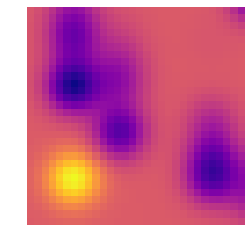

In [308]:
inverse_image = np.copy(lr.coef_).reshape((30,30))
pim.show(inverse_image)